Patch Daddy: 

JJB

    outlier checks pre stats (AP width terrible) - violin plotting fuck histograms
    tau and sage normalised by V dif for analysis
    finish meta loop for APP visuilisation
    handel if drug in/out is not specificed in APP file ... e.g control / put other data_type pAD to analise pAD from -100mV 
    change AP where it means Application to APP also in excel file !

    Fringe cases: pAD: TLX221229a, TLX230416b, TLX230511b, TLX230530b
    Clear cases: TLX221230a, TLX230411a, TLX230416c, TLX230524b, TLX230524c, TLX230622a
    BAD DETECTION-No pAD: TLX230511a, 
DJ
 
   0. add PC to AP_PCA, debug AP_Mean (remove prints), organise histogram count/width + x-axis for AP heights/latency wrong, add mean to phase plotting like AP_Mean, ADD to all handel if AP_count = 0 #notworking No APs in trace for TLX221230b, TLX230622b and TLX230416a both have 1 AP (i would like to see it plotted alone as Somatic/unknown) ... odd case: TLX210603a histogram has count2 + no pAD (bad detection), TLX230518b/c/d has large artifacts that need to be handeled, 

   1. APP files compare V trace in PRE / APP / WASH with APs removed and if >2SD the report:
                                CLASIFY CELL RESPONCE (depol - hyperpol - no change) 
                                TIMESCALE OF RESPONCE  ()

   2. pAD_detector : add if V_threshold<=-60mV == pAD , no pAD in ANY SIM CELLS: use as failed cases for pAD detection (example loss of access=SIM230225b) good detection of pAD = 
    
   3. add compare PRE and DRUG tau and sag [value, V_steady_state, I_injected, resting_membrant_potential] normalised for a similar defelction in V or comparable V value i.e. -100

   4. AP width correction : " AP width calculation not accurate!! "

   5. build IV curves for pre and post drug aplication compare liniar slope




In [87]:
#imports, load feature df, set directory and colours

%load_ext autoreload
%autoreload 2


from utils.metabuild_functions import expandFeatureDF, loopCombinations_stats
from utils.plotter import getorbuildApplicationFig, loopbuildAplicationFigs, getorbuildAP_MeanFig, getorbuildAP_HistogramFig, getorbuildAP_PhasePlotFig, getorbuildAP_PCAFig 
from utils.base_utils import *
import openpyxl
import pandas as pd
import numpy as np
import os
import warnings

#CONSTANTS
ROOT = os.getcwd() #This gives terminal location (terminal working dir)
INPUT_DIR = f'{ROOT}/input'
OUTPUT_DIR = f'{ROOT}/output'
CACHE_DIR = f'{ROOT}/cache'

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/cache/feature_df_py SUBCACHE


In [85]:

expanded_df = getorbuildExpandedDF(filename, 'feature_df_expanded', expandFeatureDF, from_scratch=False)

cell_df = getCellDF(expanded_df, 'SIM230713a', data_type='AP')
cell_df
# # subset df: 
# L5a_TLX_df = expanded_df.loc[(expanded_df['cell_type']=='L5a_TLX')& (expanded_df['data_type']=='AP')]
# L5a_TLX_df

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


folder_file     cell_ID data_type     drug  replication_no  \
1109   JJB230713/t7  SIM230713a        AP  CONTROL               1   
1113  JJB230713/t11  SIM230713a        AP     TCB2               1   

      application_order  drug_in  drug_out       I_set  R_series  ...  \
1109                  1     11.0      24.0  short step      25.0  ...   
1113                  2     13.0      29.0  short step       NaN  ...   

      WASH_pAD_AP_locs rheobased_threshold FI_slope AP_slope  AP_latency  \
1109               NaN                 NaN      NaN      NaN         NaN   
1113                []                 NaN      NaN      NaN         NaN   

      mouseline  PRE_pAD_AP_locs tau_rc WASH_Somatic_AP_locs AP_height  
1109        SIM              NaN    NaN                  NaN       NaN  
1113        SIM               []    NaN                   []       NaN  

[2 rows x 36 columns]

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE
BUILDING "CTG210406a Application 1 Figure"


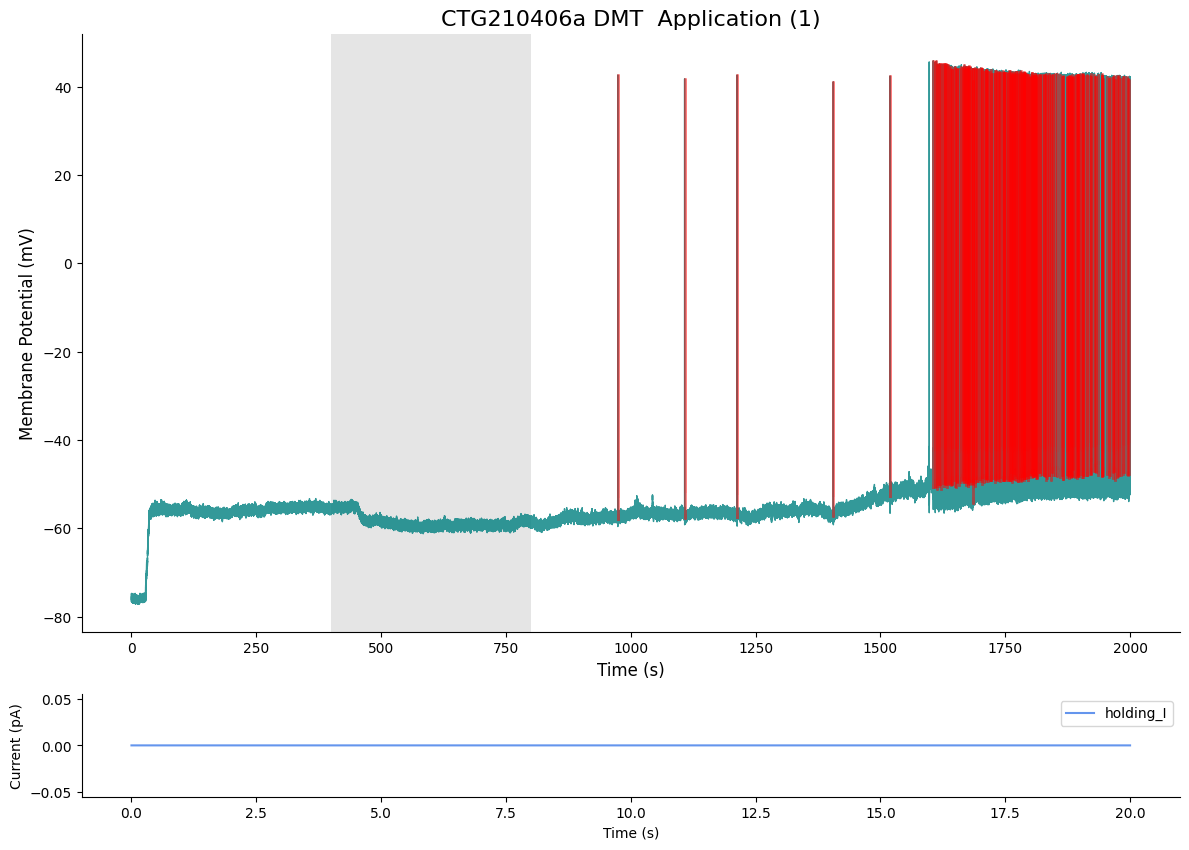

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210406a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210406a_application_1.png
BUILDING "CTG210427a Application 1 Figure"


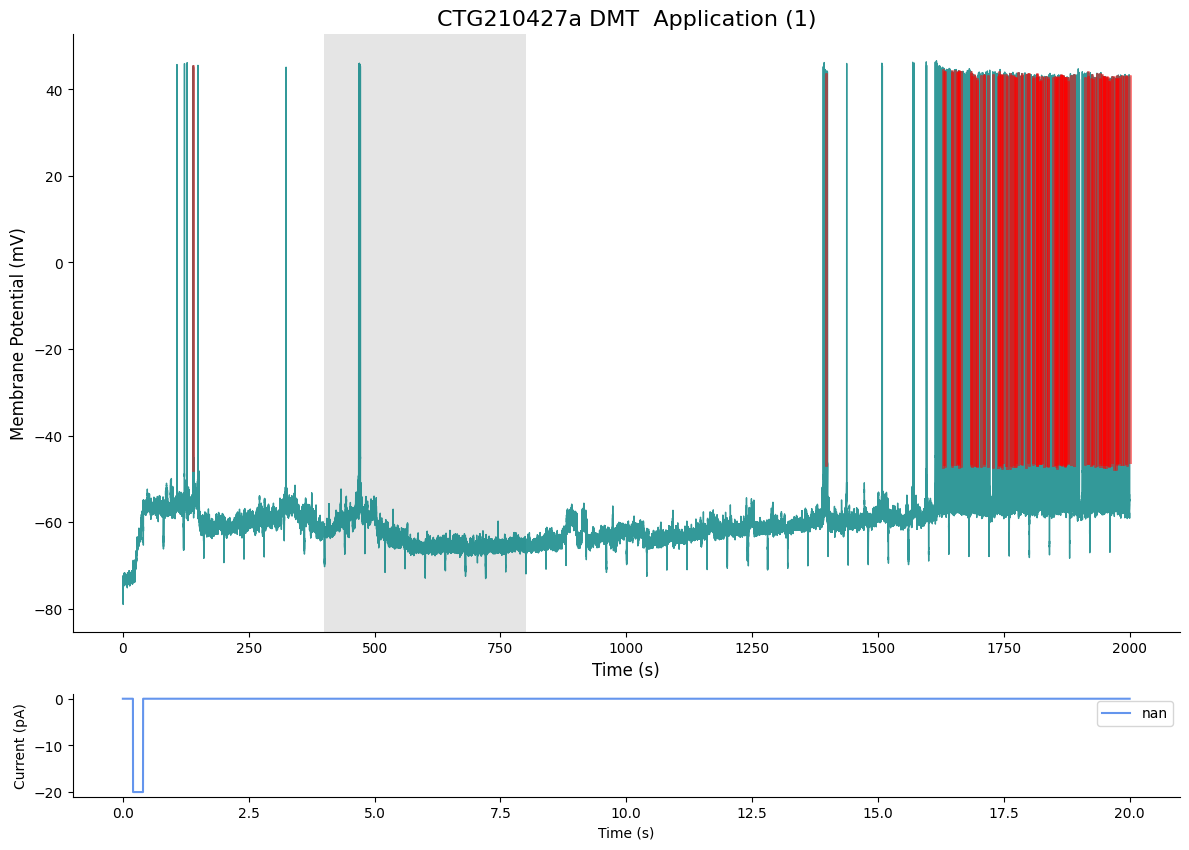

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210427a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210427a_application_1.png
BUILDING "CTG210429a Application 1 Figure"


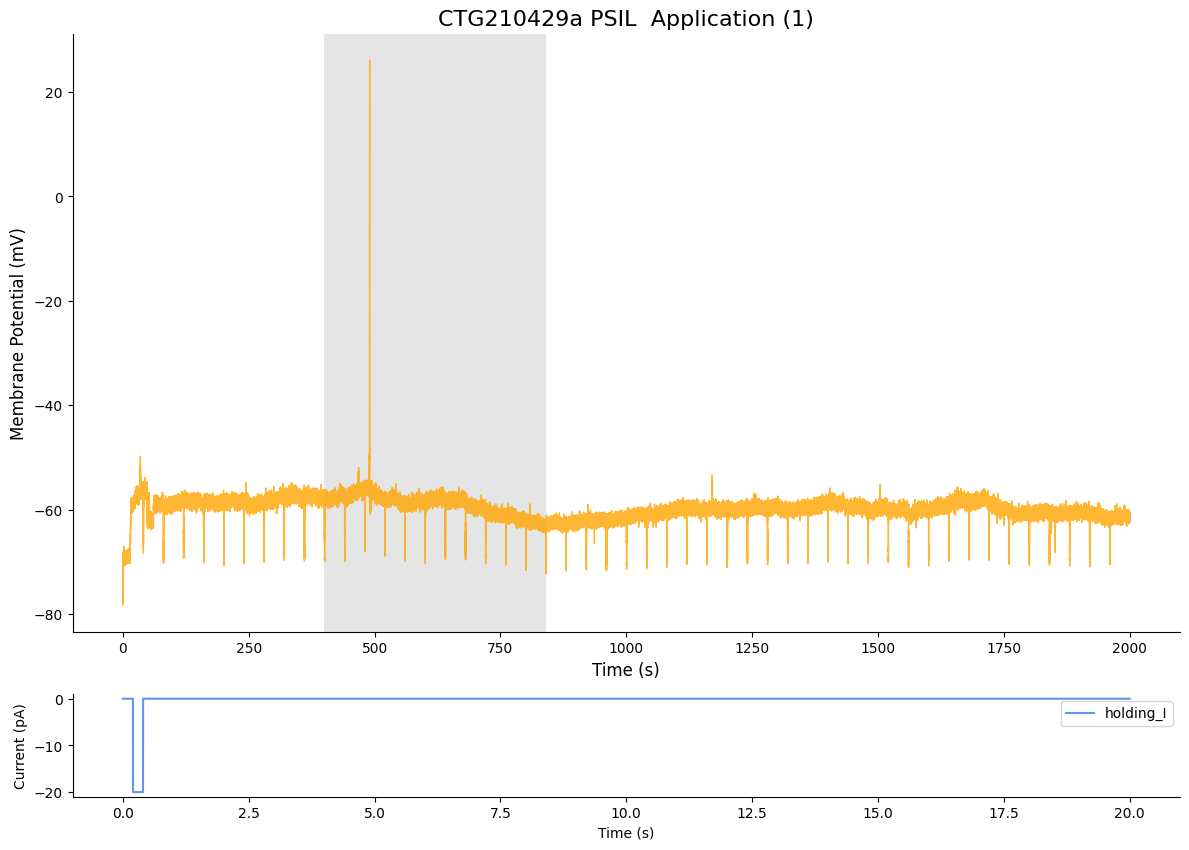

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210429a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210429a_application_1.png
BUILDING "CTG210507a Application 1 Figure"


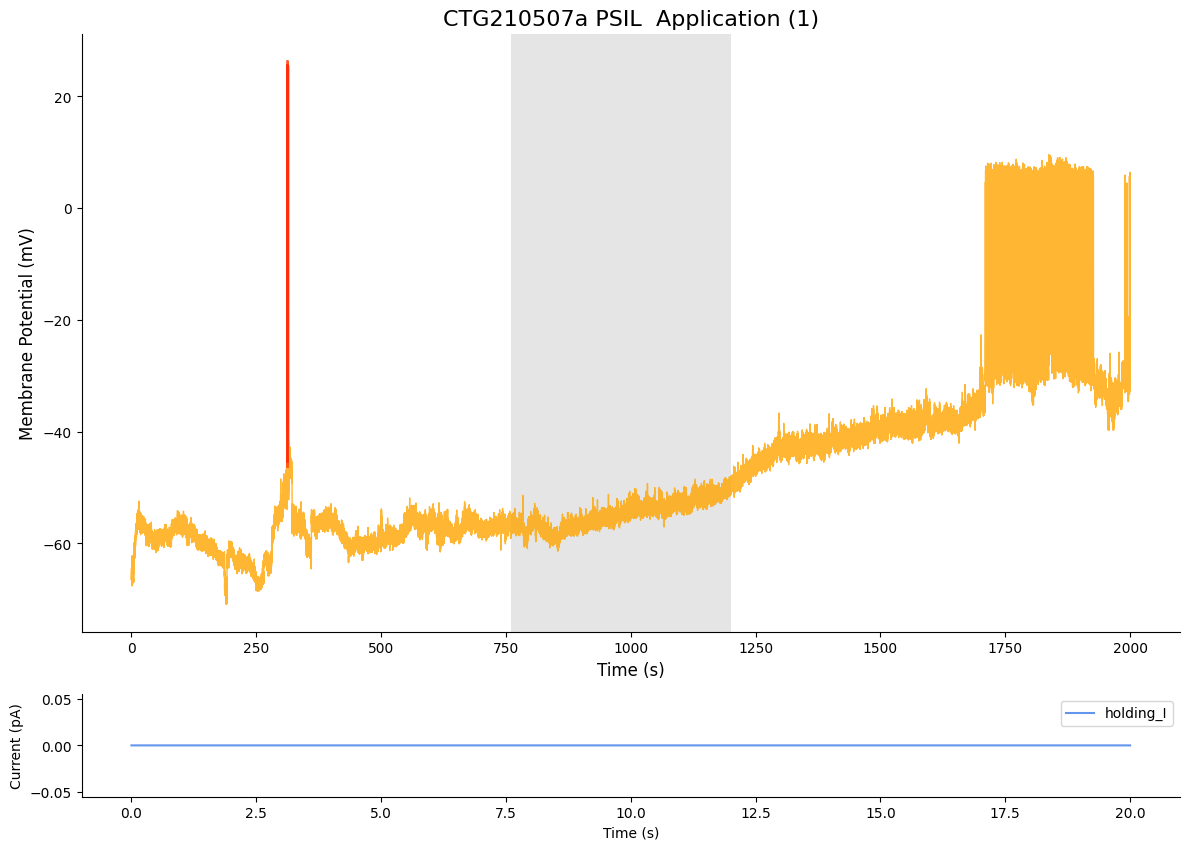

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210507a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210507a_application_1.png
BUILDING "CTG210507b Application 1 Figure"


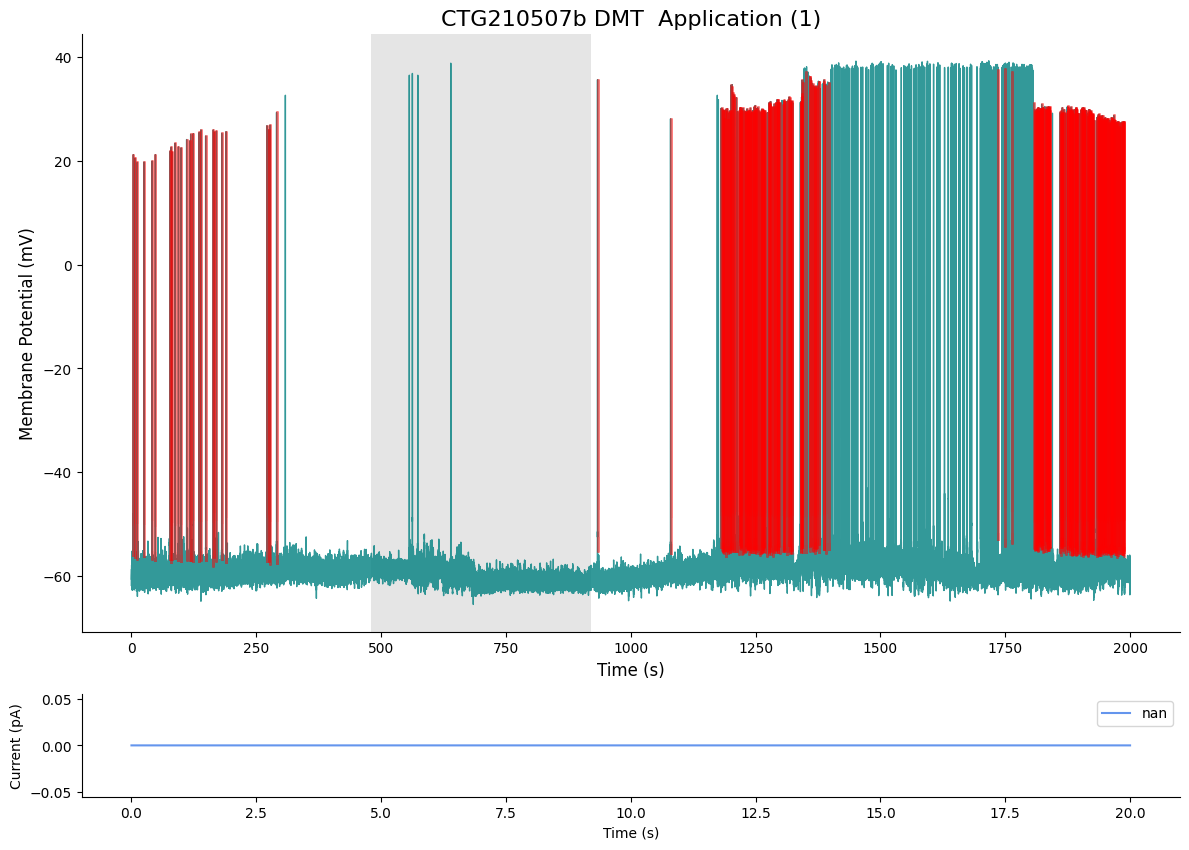

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210507b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210507b_application_1.png
BUILDING "CTG210513a Application 1 Figure"


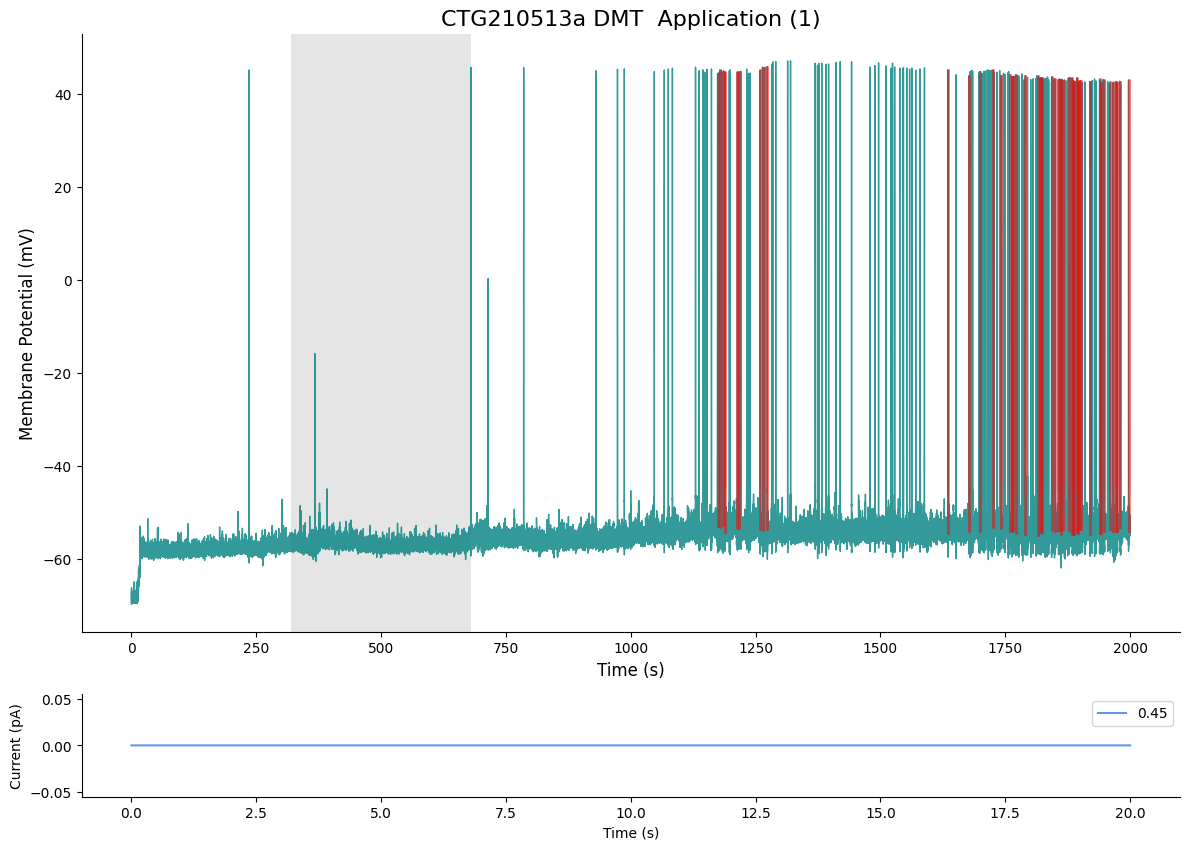

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210513a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210513a_application_1.png
BUILDING "CTG210516a Application 1 Figure"


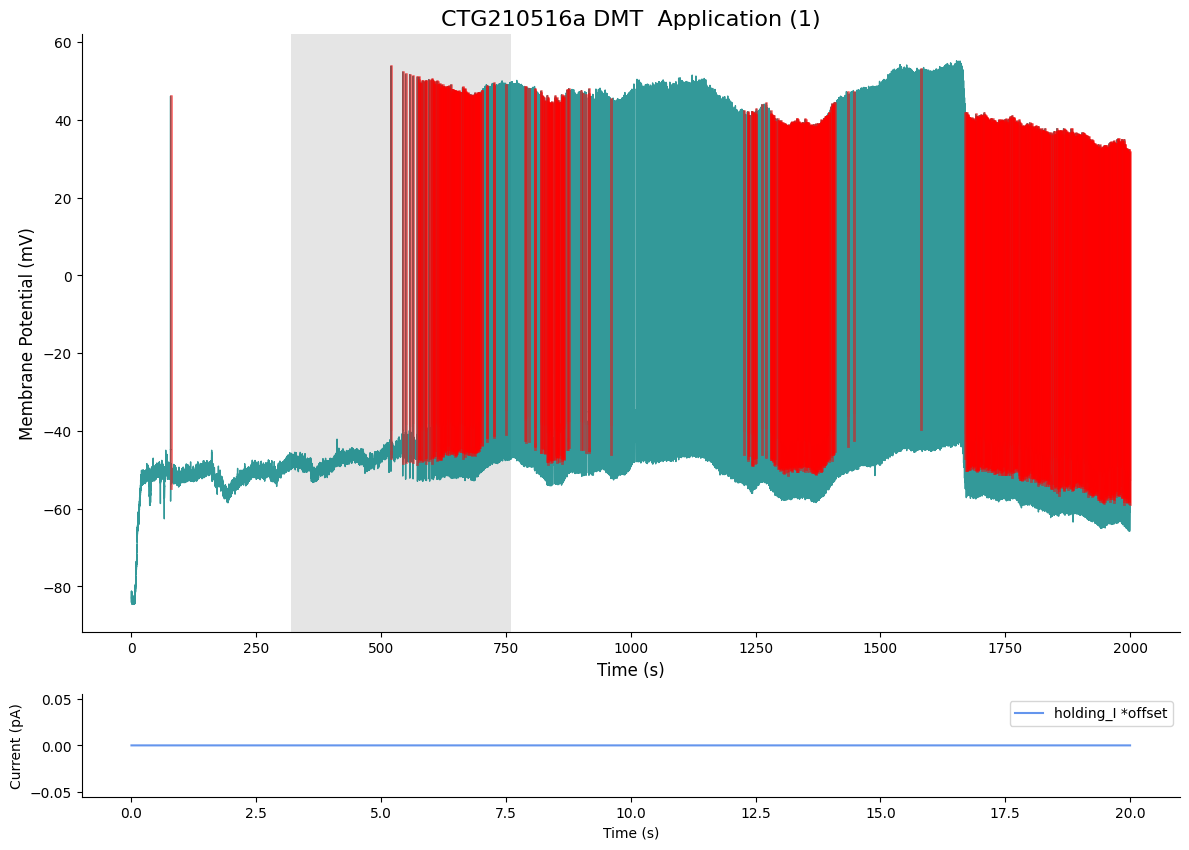

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210516a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210516a_application_1.png
BUILDING "CTG210517a Application 1 Figure"


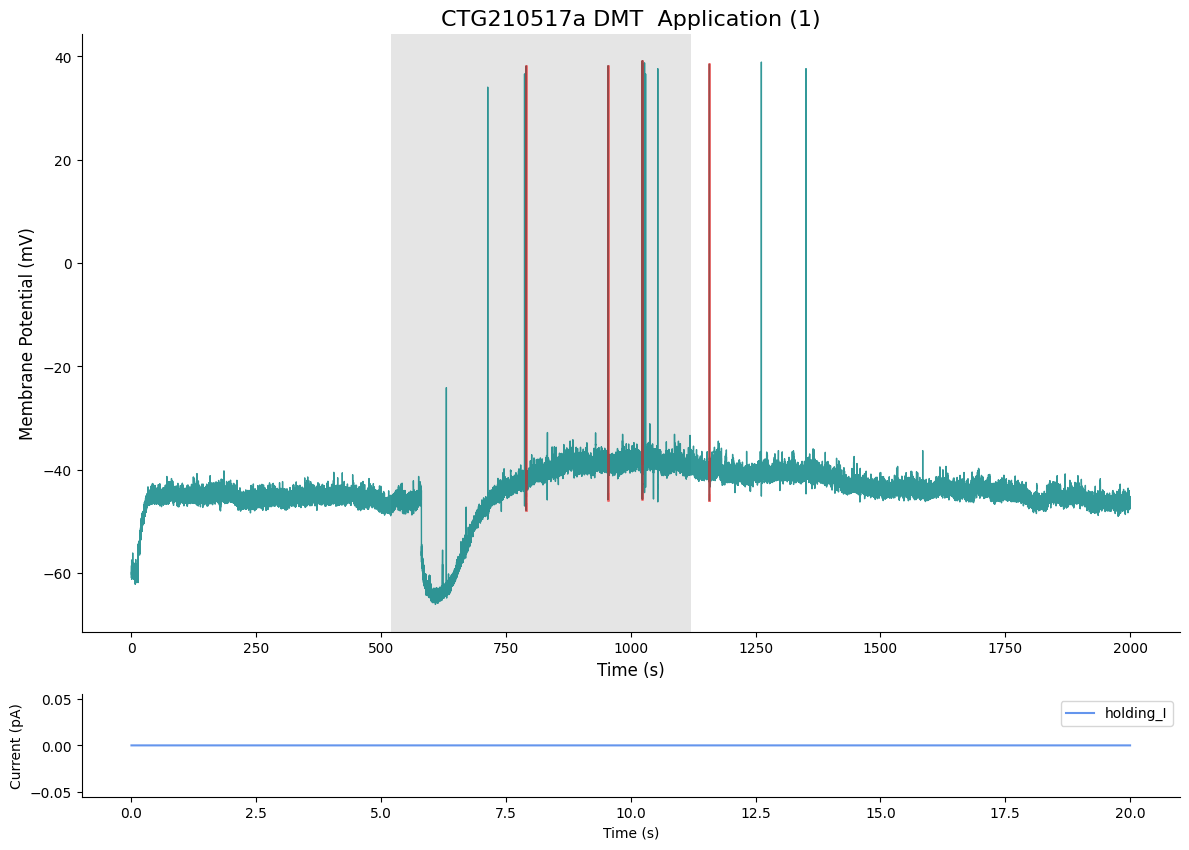

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517a_application_1.png
BUILDING "CTG210517b Application 1 Figure"


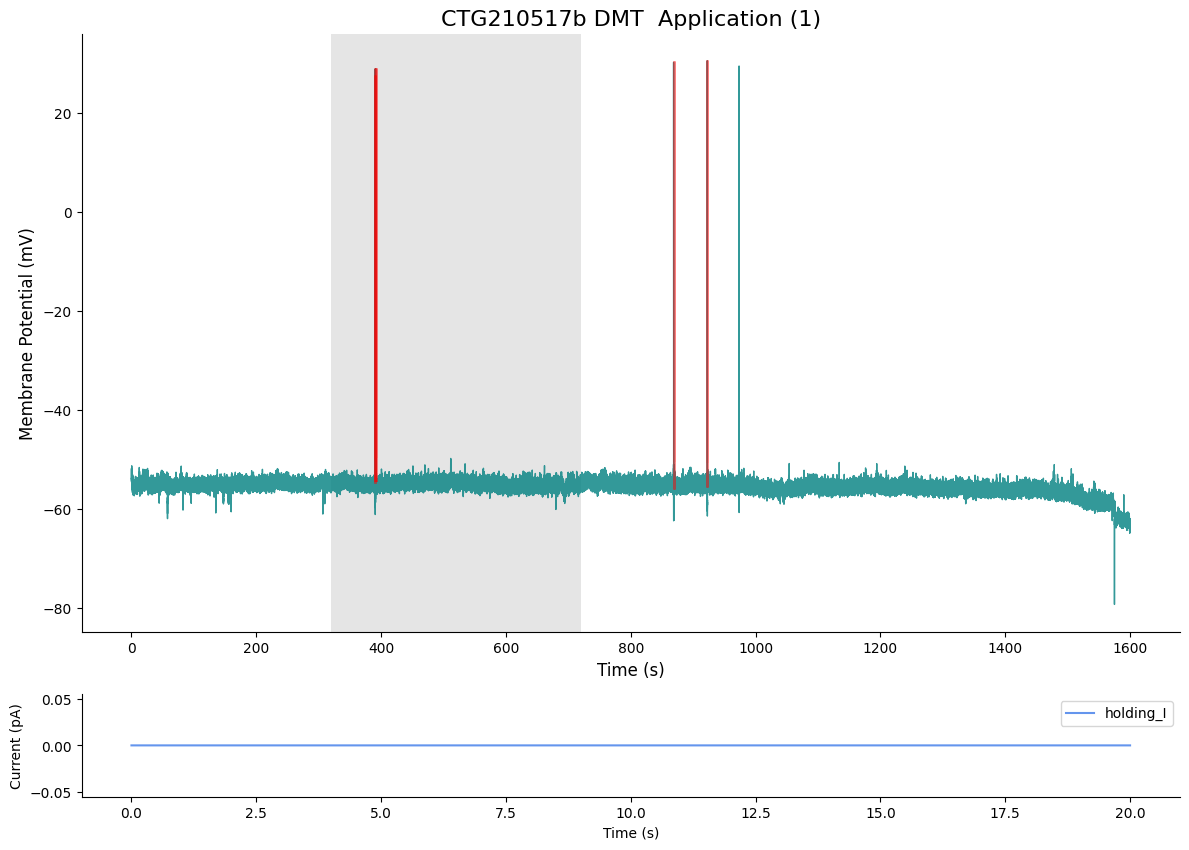

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517b_application_1.png
BUILDING "CTG210517c Application 1 Figure"


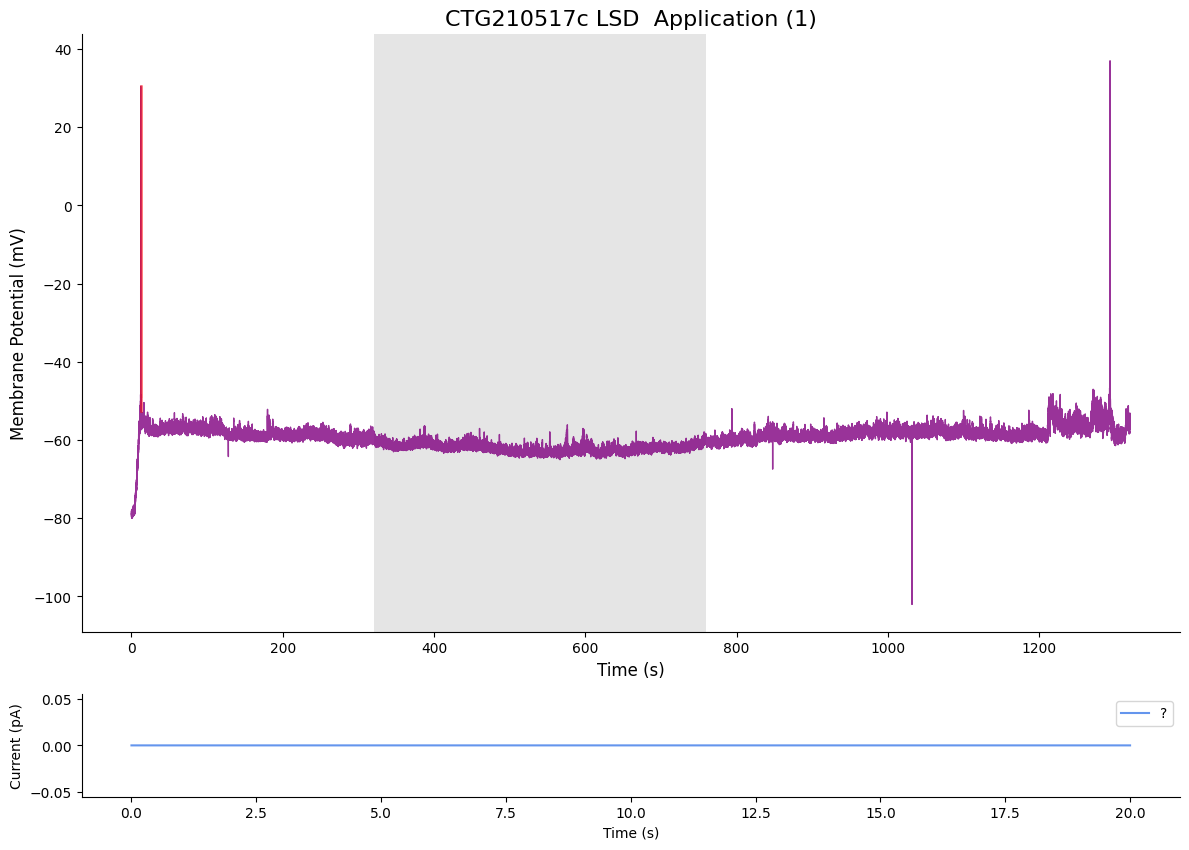

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210517c_application_1.png
BUILDING "CTG210607c Application 1 Figure"


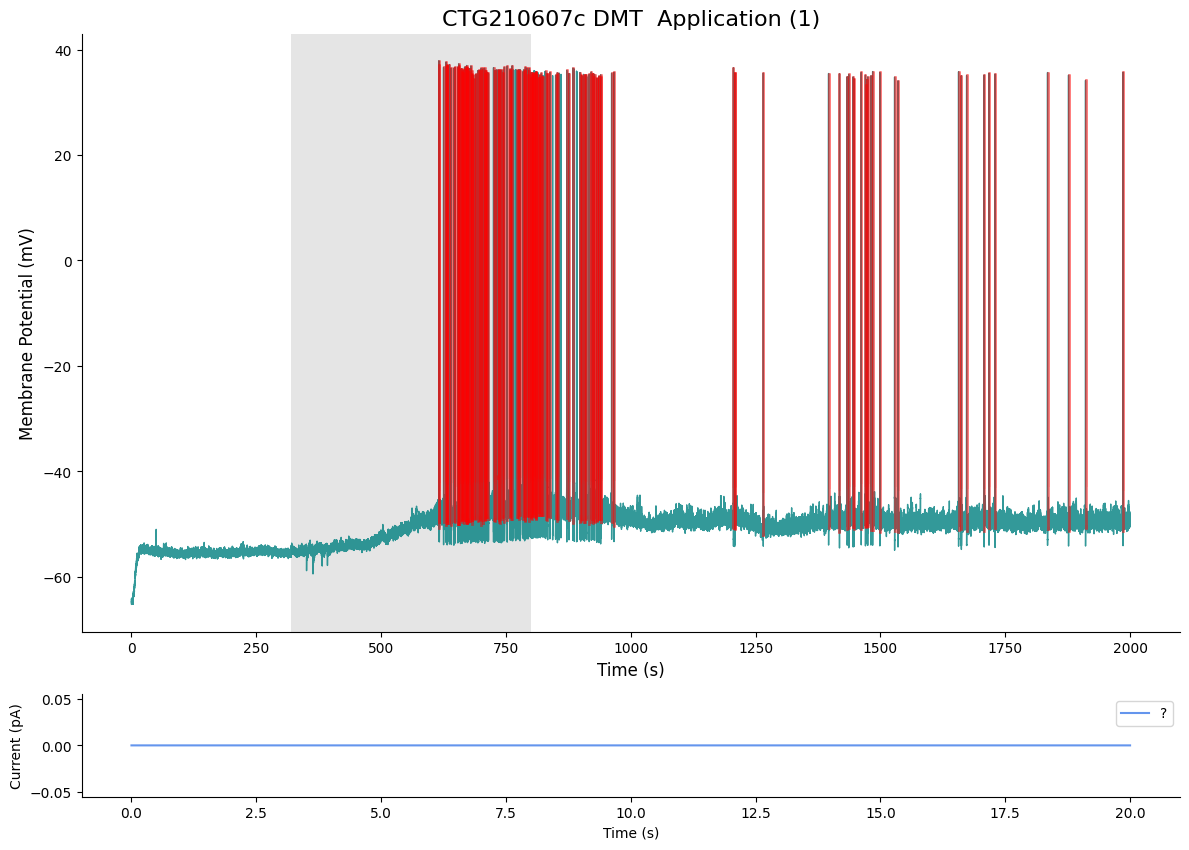

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210607c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210607c_application_1.png
BUILDING "CTG210608a Application 1 Figure"


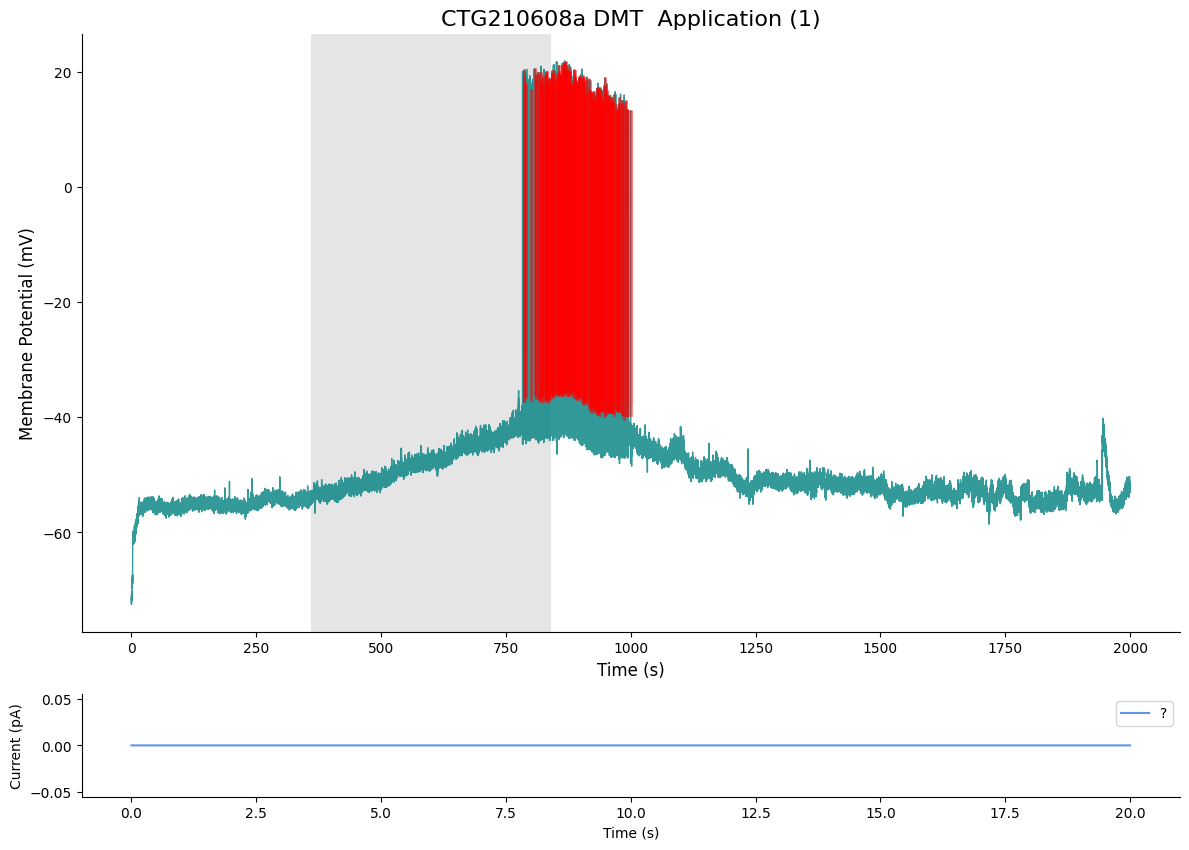

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608a_application_1.png
BUILDING "CTG210608b Application 1 Figure"


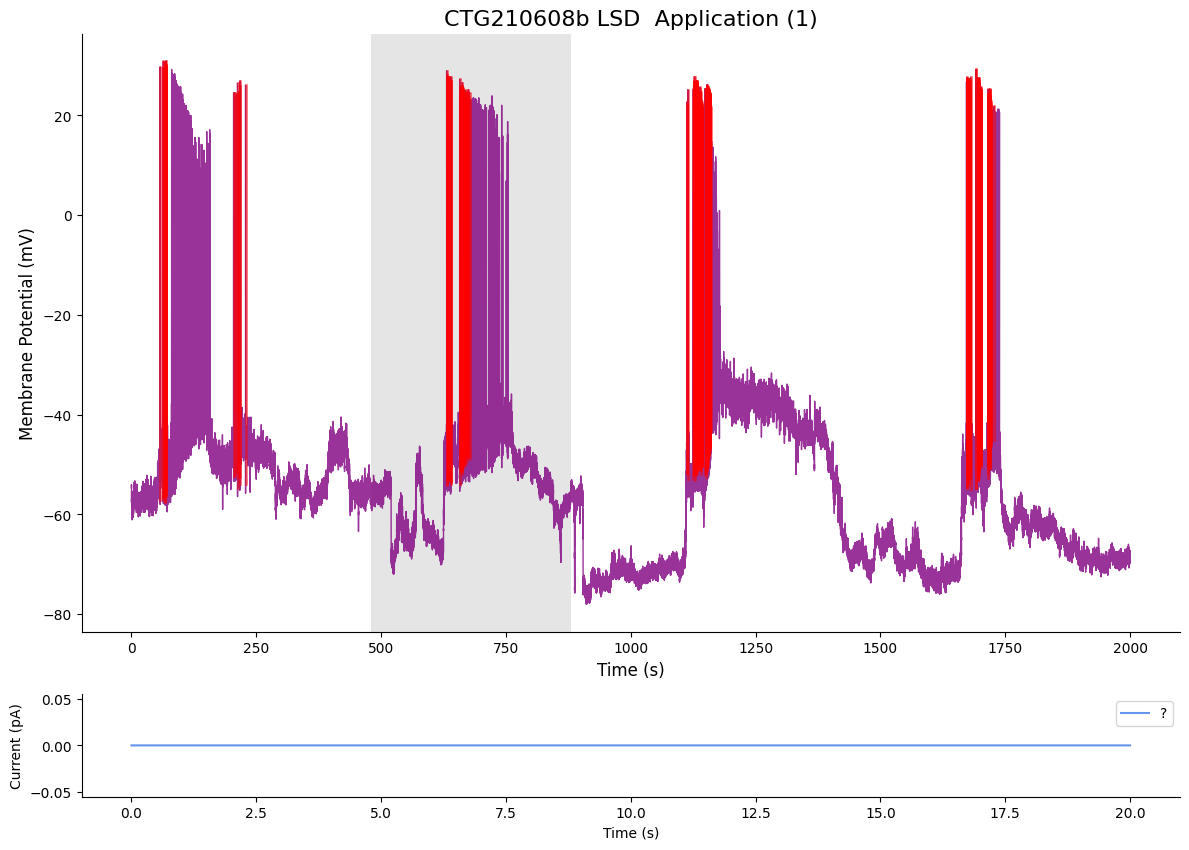

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608b_application_1.png
BUILDING "CTG210608c Application 1 Figure"


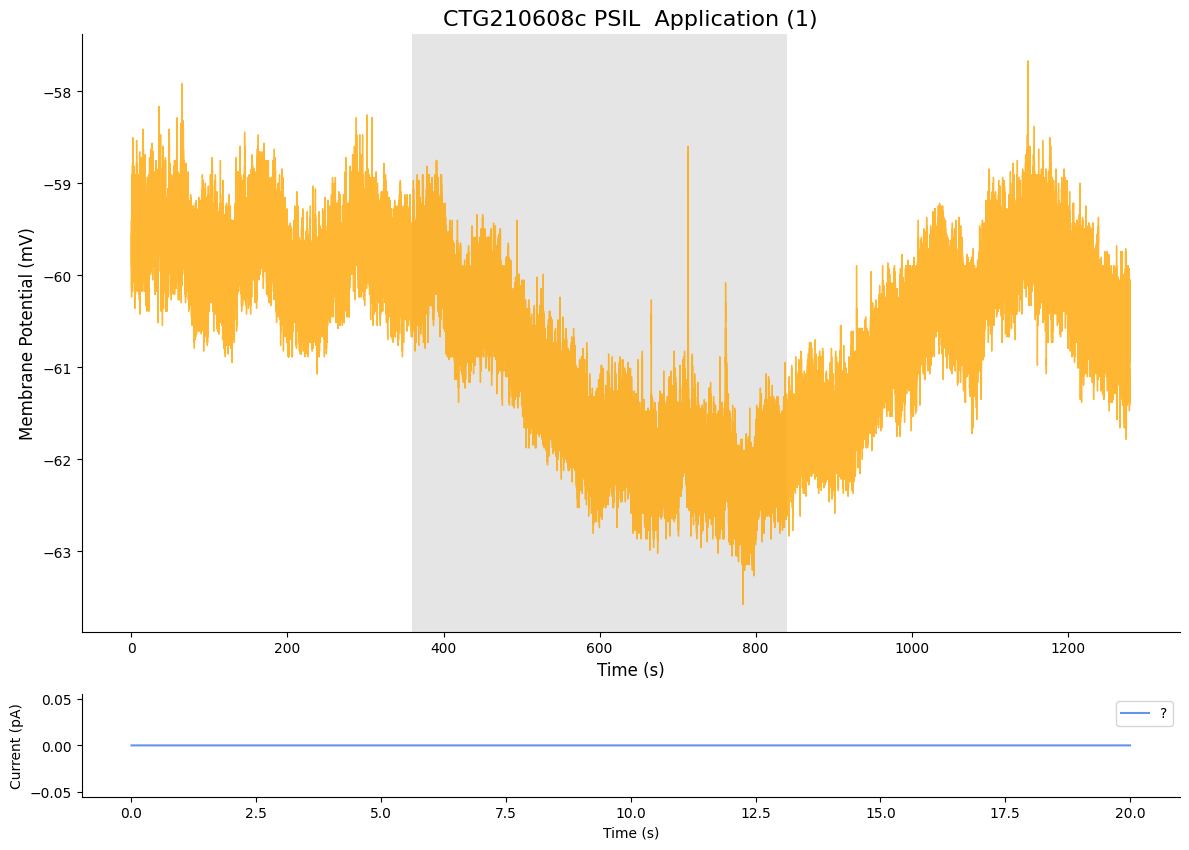

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608c_application_1.png
BUILDING "CTG210608d Application 1 Figure"


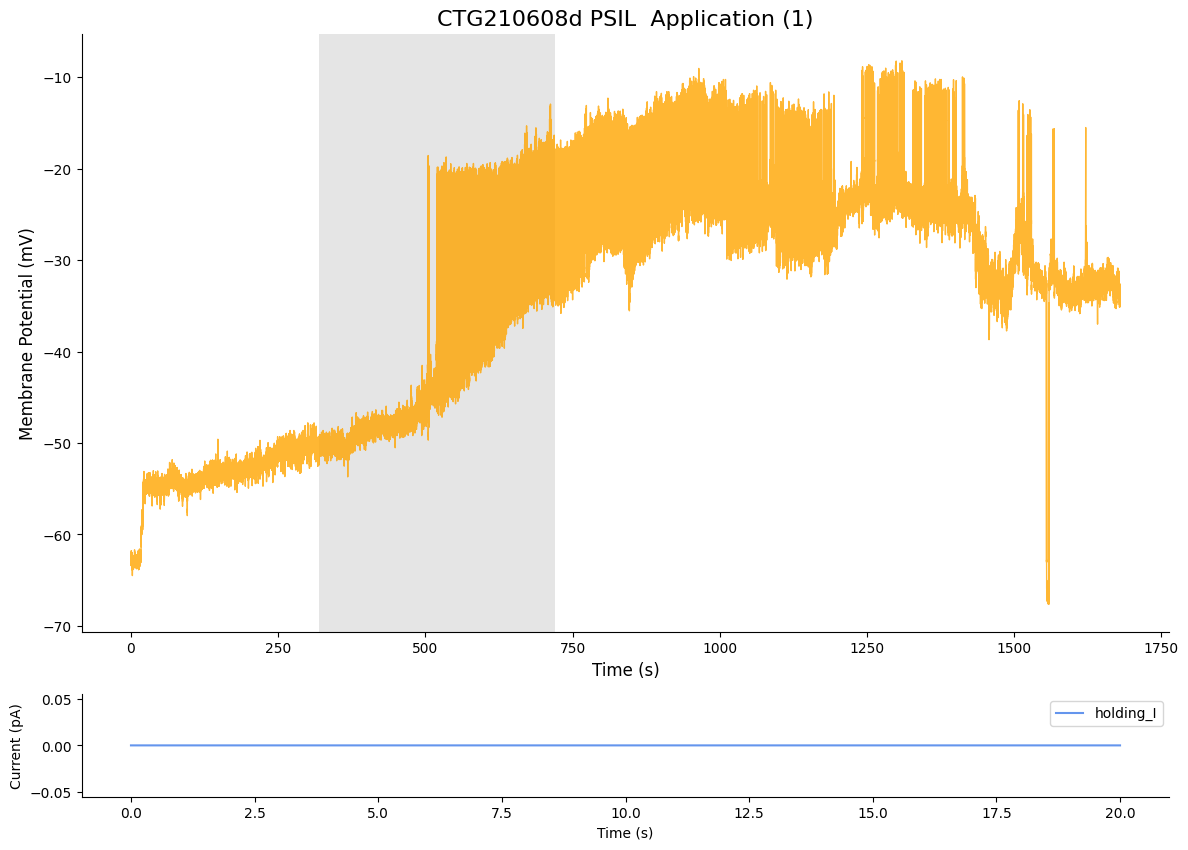

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608d_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/CTG210608d_application_1.png
BUILDING "SIM210424a Application 1 Figure"


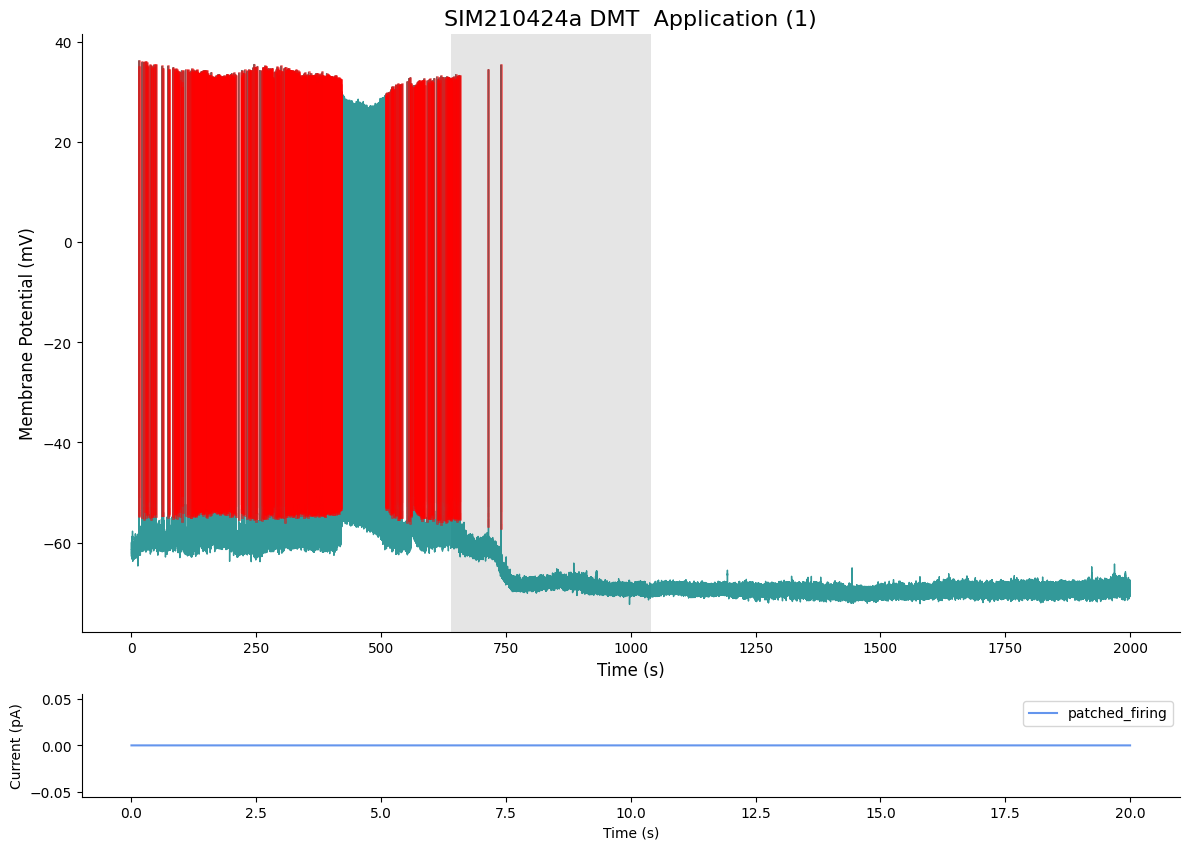

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210424a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210424a_application_1.png
BUILDING "SIM210518a Application 1 Figure"


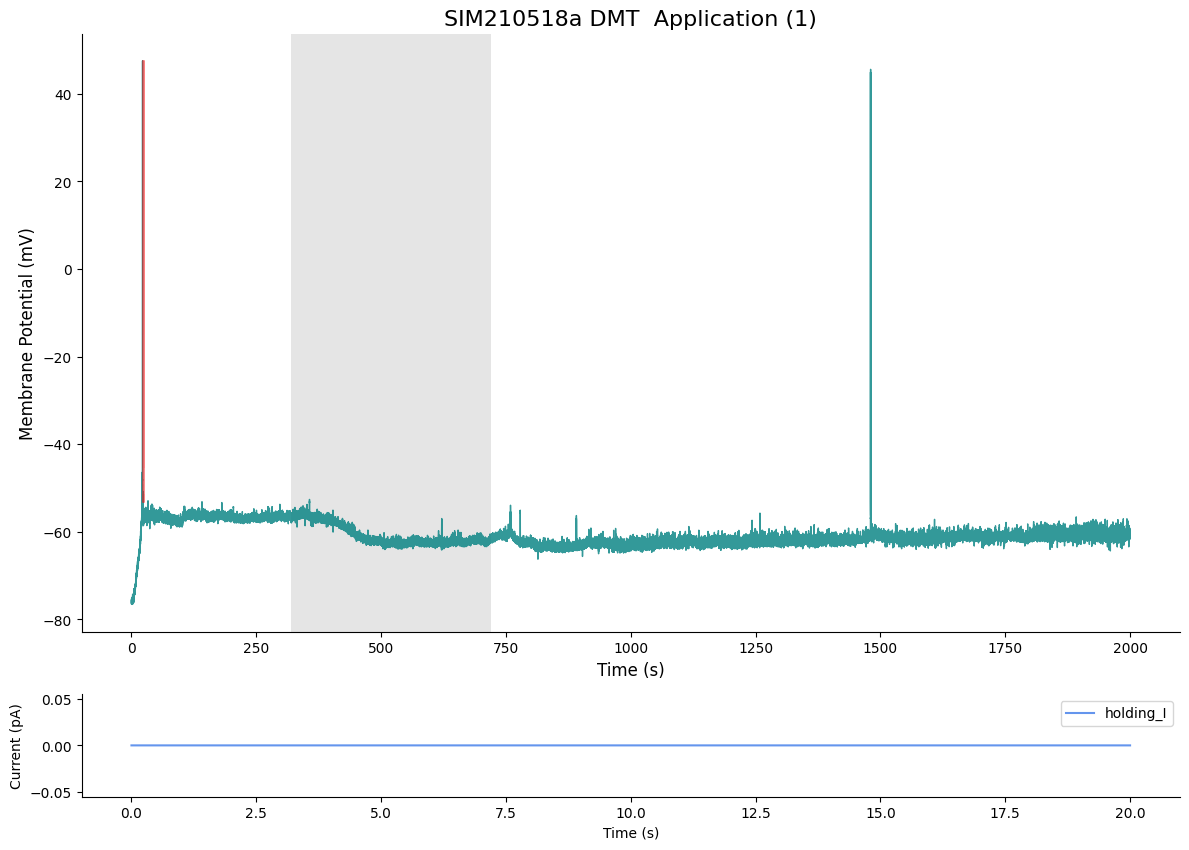

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210518a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210518a_application_1.png
BUILDING "SIM210518b Application 1 Figure"


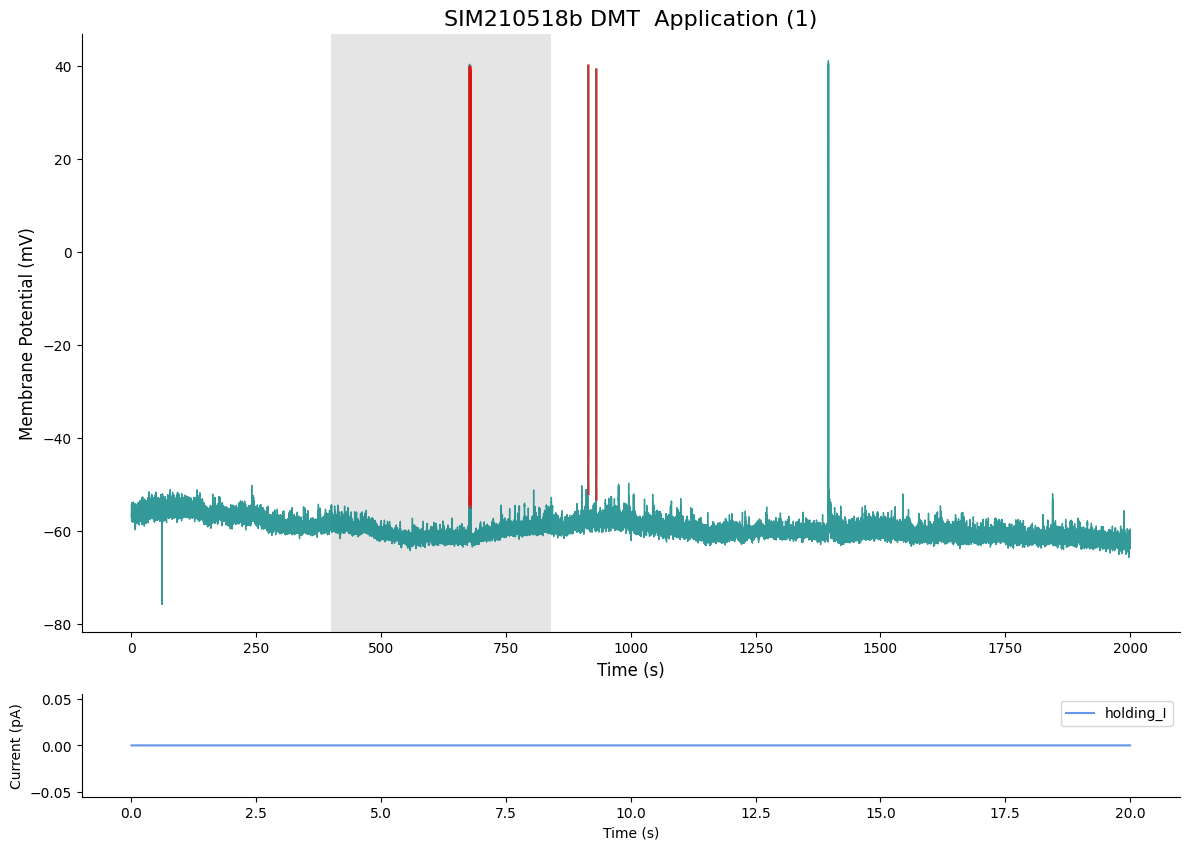

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210518b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210518b_application_1.png
BUILDING "SIM210730a Application 1 Figure"


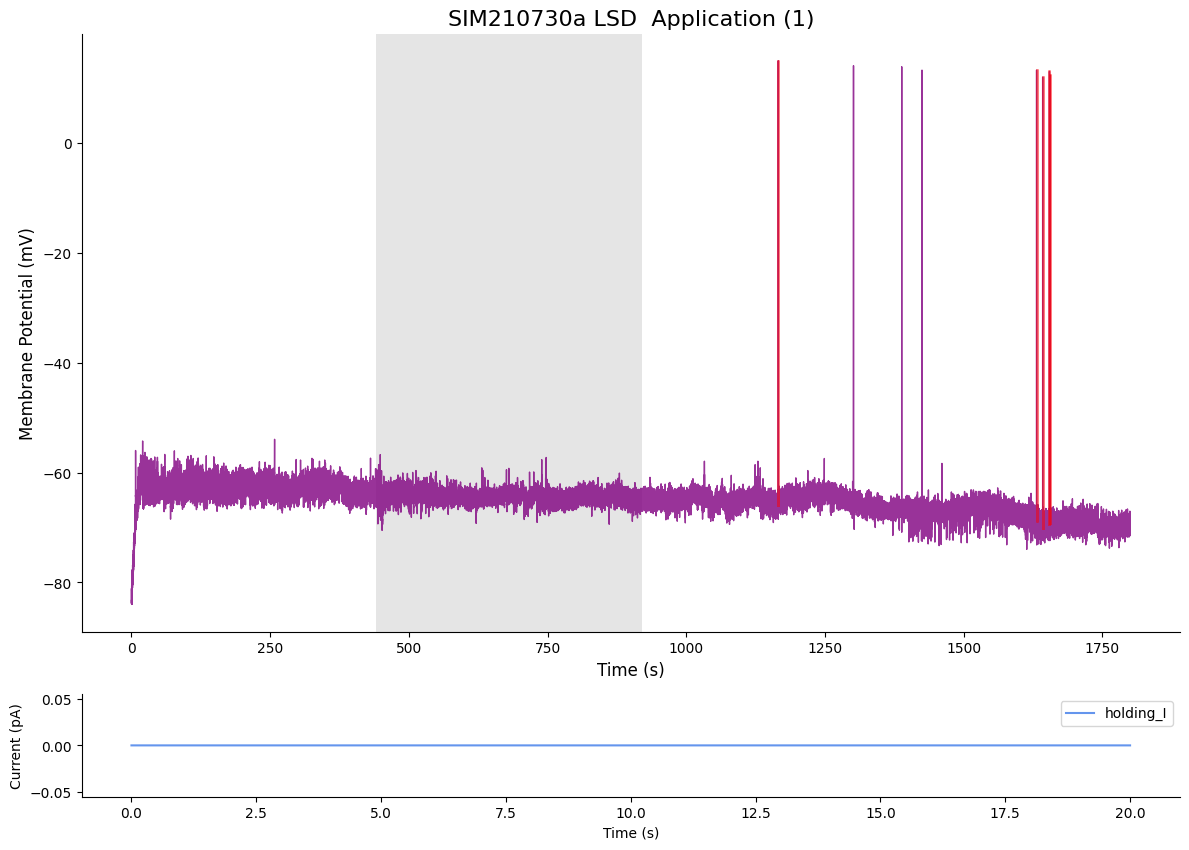

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730a_application_1.png
BUILDING "SIM210730b Application 1 Figure"


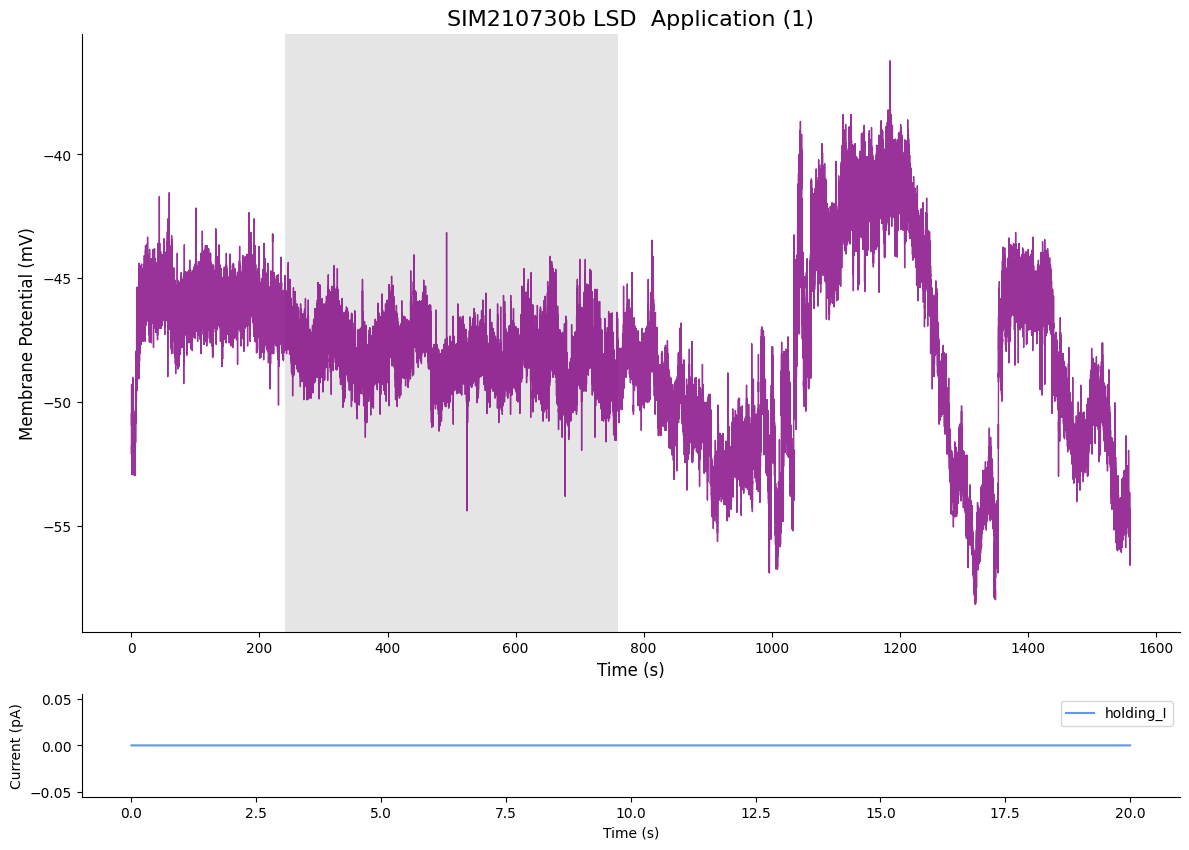

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730b_application_1.png
BUILDING "SIM210730c Application 1 Figure"


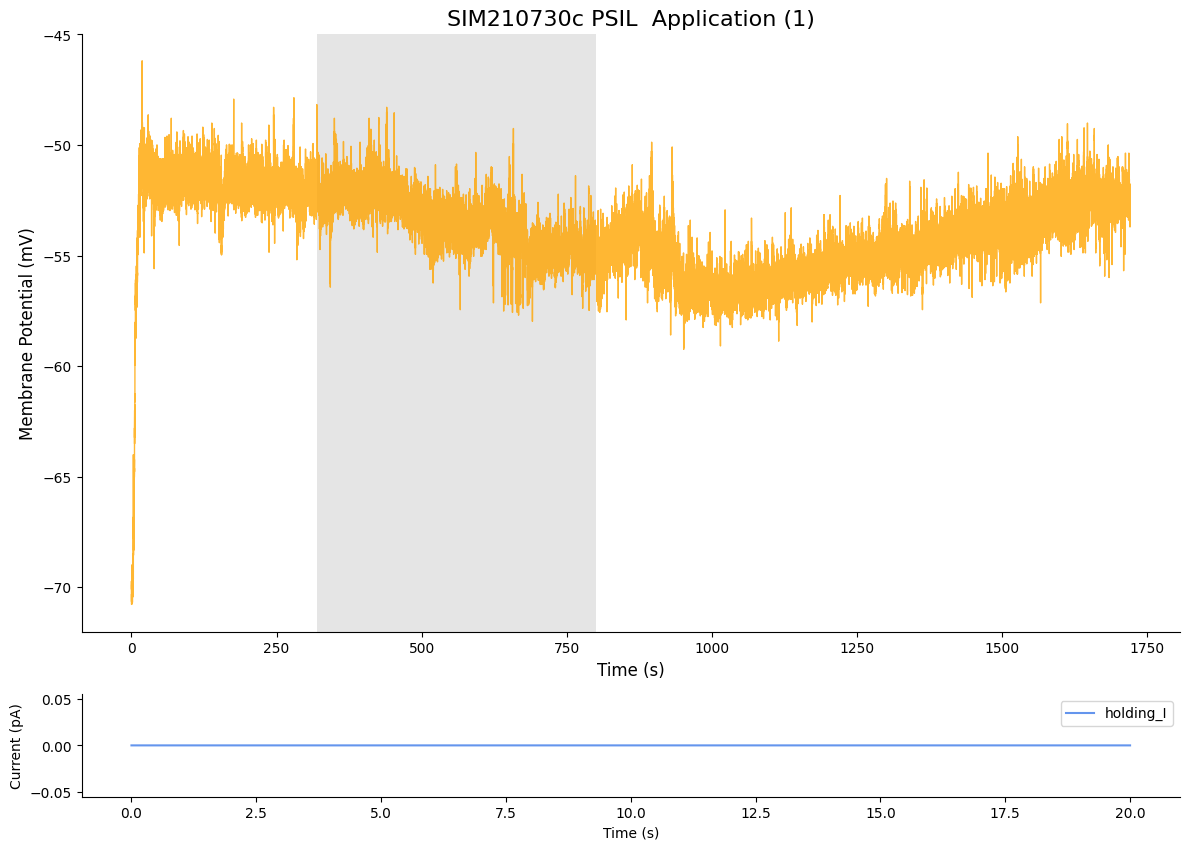

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210730c_application_1.png
BUILDING "SIM210801a Application 1 Figure"


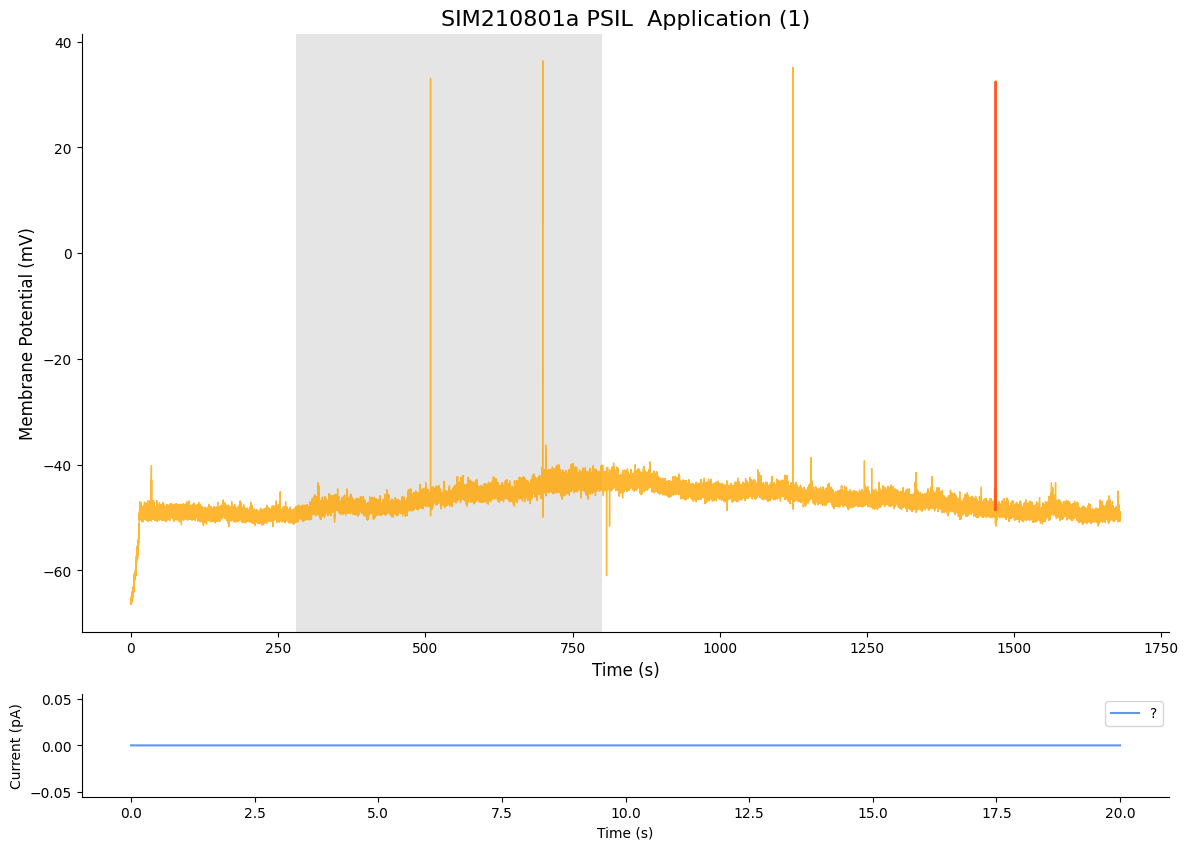

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210801a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210801a_application_1.png
BUILDING "SIM210801b Application 1 Figure"


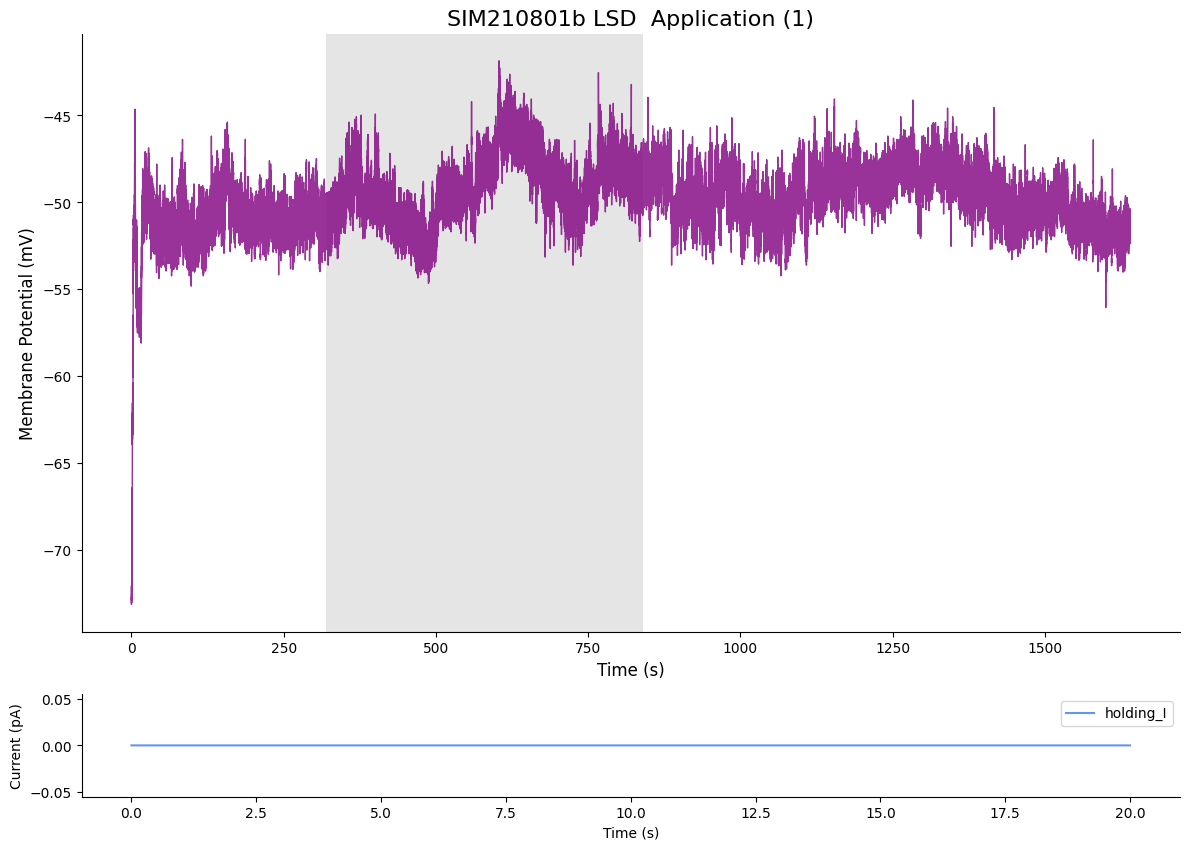

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210801b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/SIM210801b_application_1.png
BUILDING "TLX210209a Application 1 Figure"


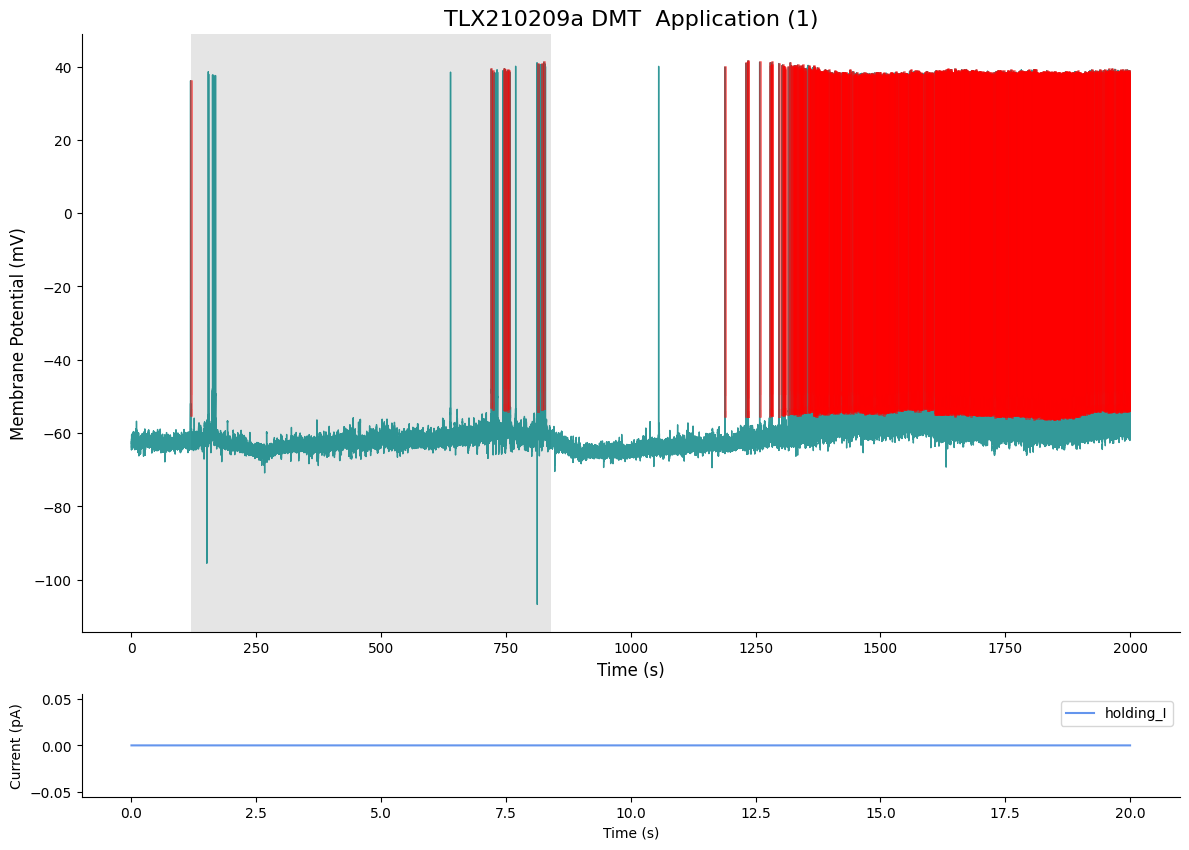

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210209a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210209a_application_1.png
BUILDING "TLX210209b Application 1 Figure"


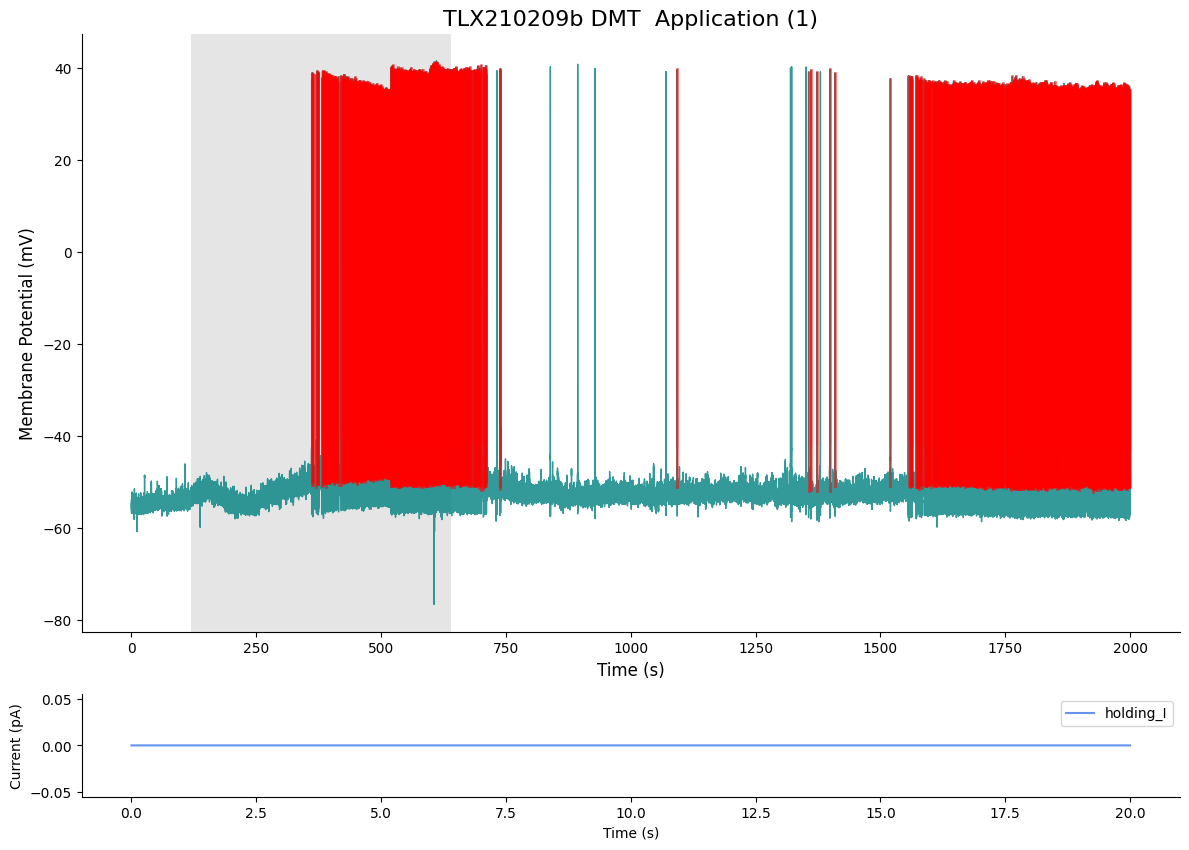

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210209b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210209b_application_1.png
BUILDING "TLX210325a Application 1 Figure"


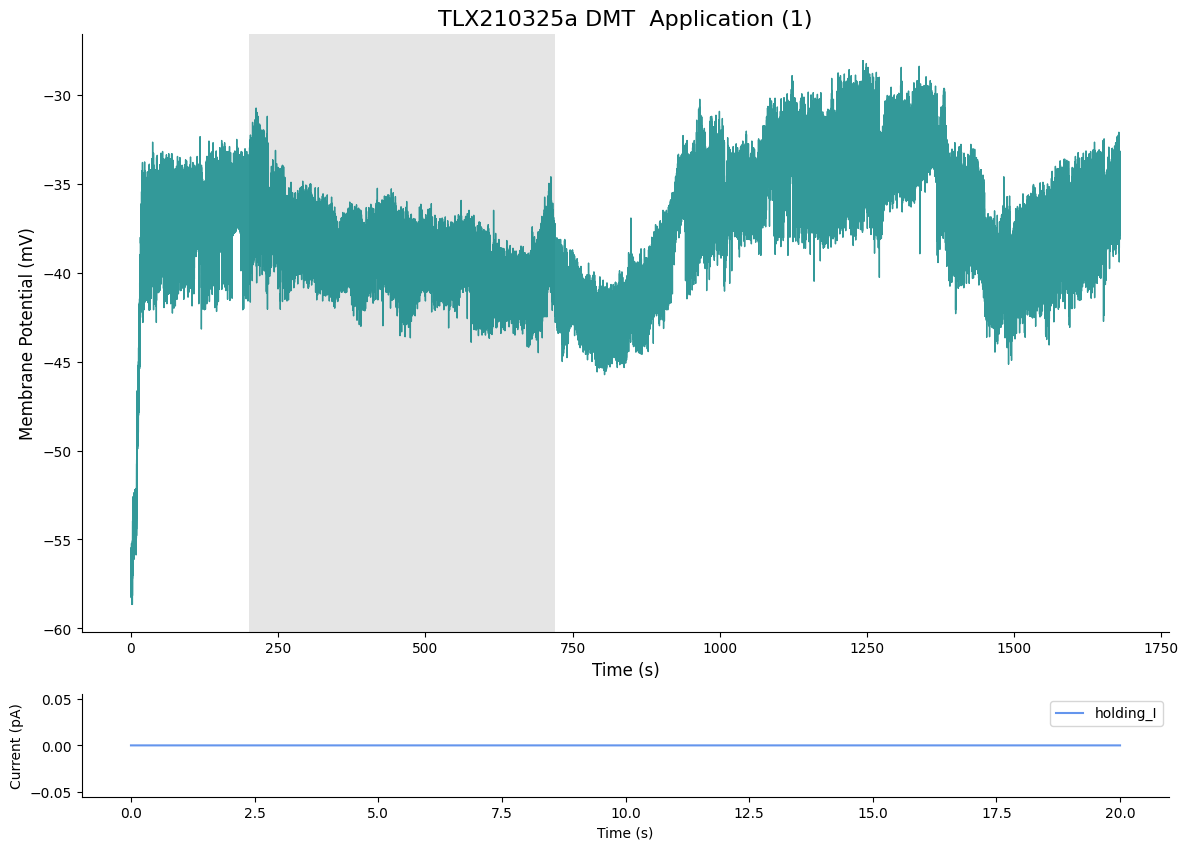

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210325a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210325a_application_1.png
BUILDING "TLX210325a Application 2 Figure"


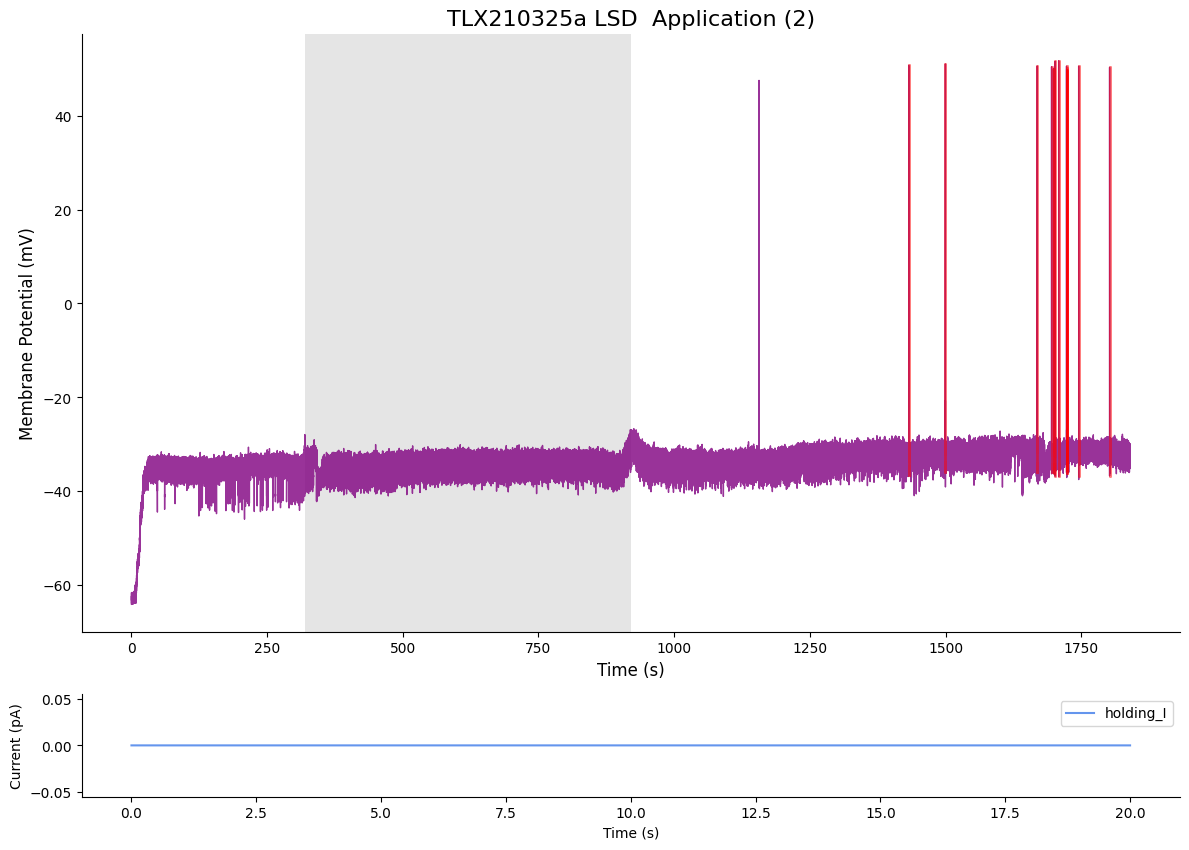

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210325a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210325a_application_2.png
BUILDING "TLX210328a Application 1 Figure"


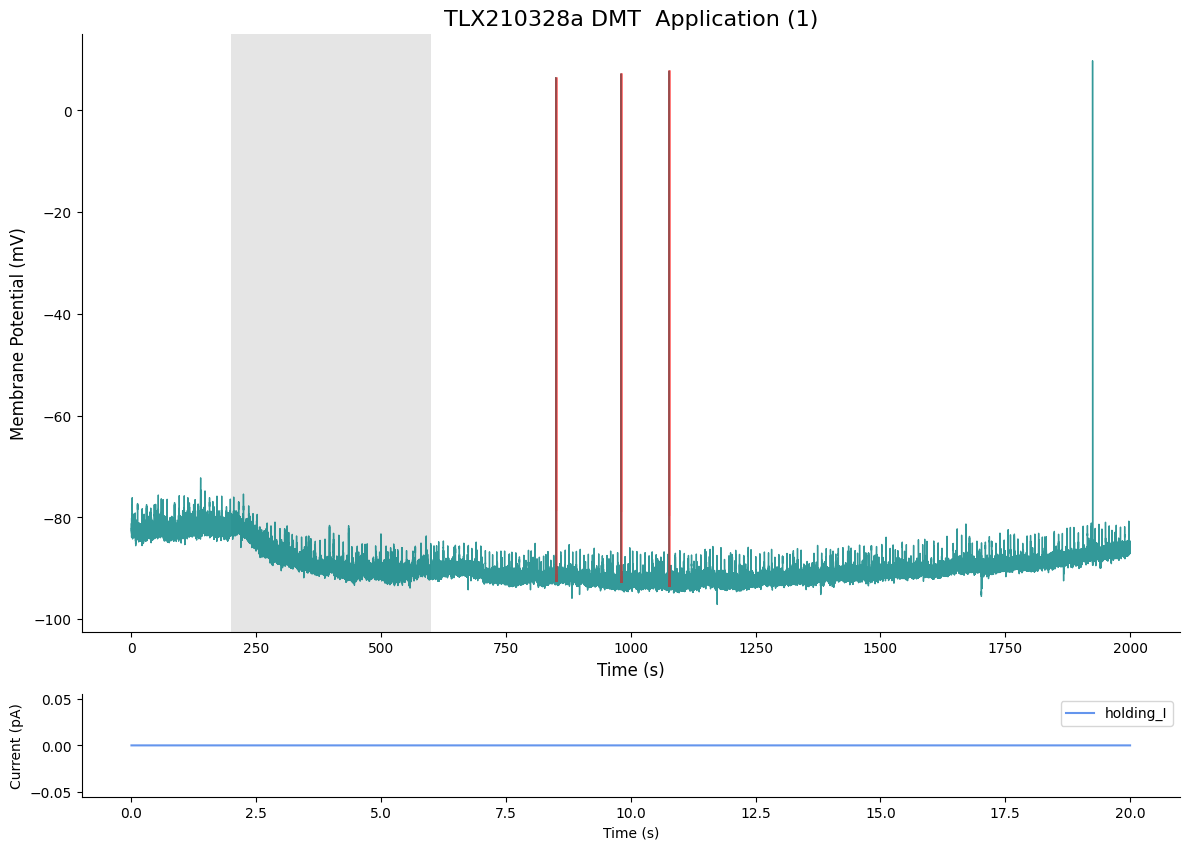

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328a_application_1.png
BUILDING "TLX210328b Application 1 Figure"


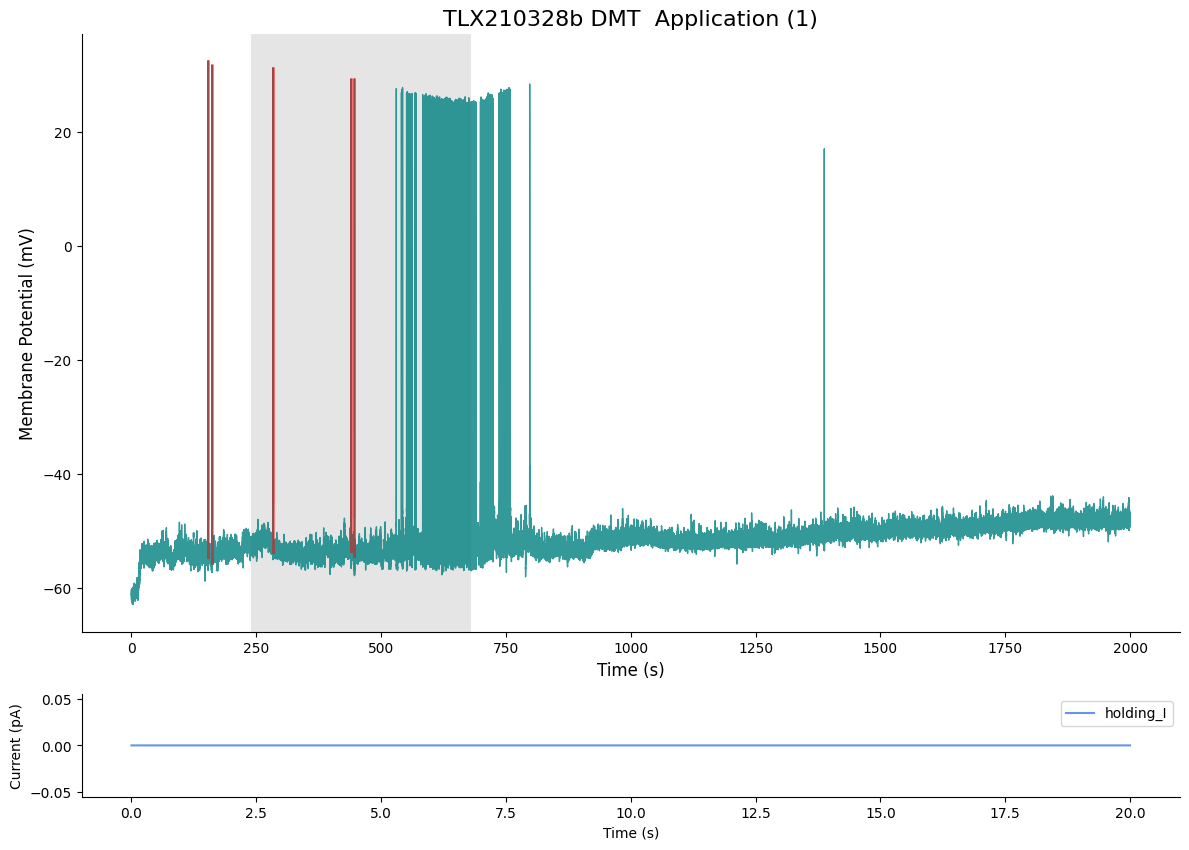

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328b_application_1.png
BUILDING "TLX210328c Application 1 Figure"


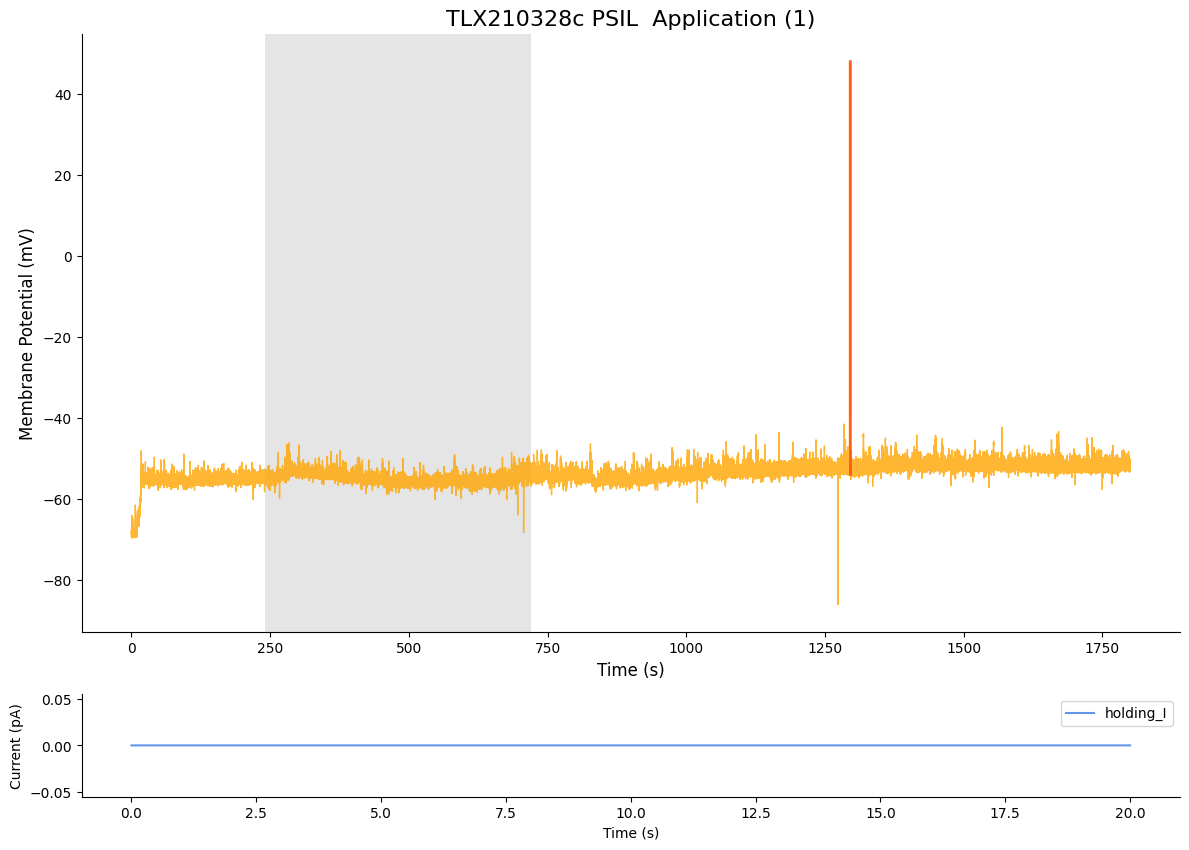

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328c_application_1.png
BUILDING "TLX210401a Application 1 Figure"


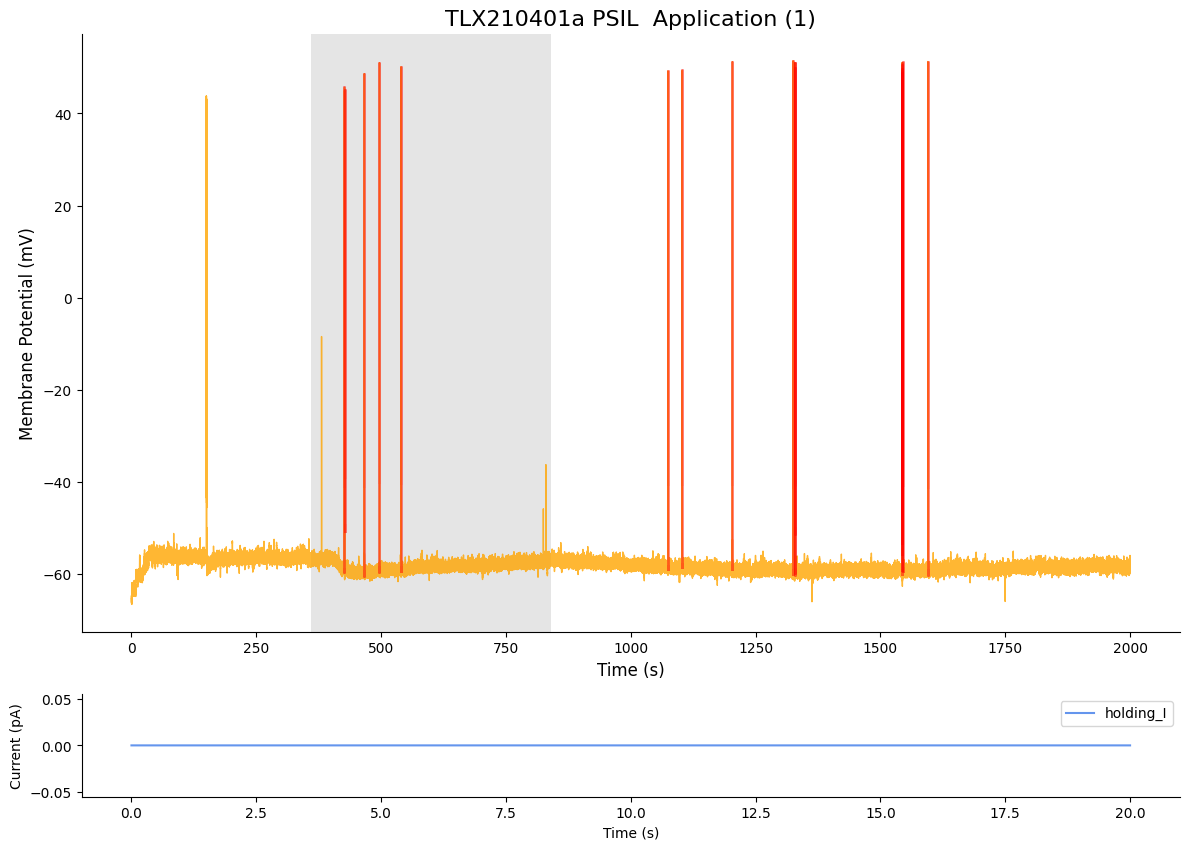

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210401a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210401a_application_1.png
BUILDING "TLX210401a Application 2 Figure"


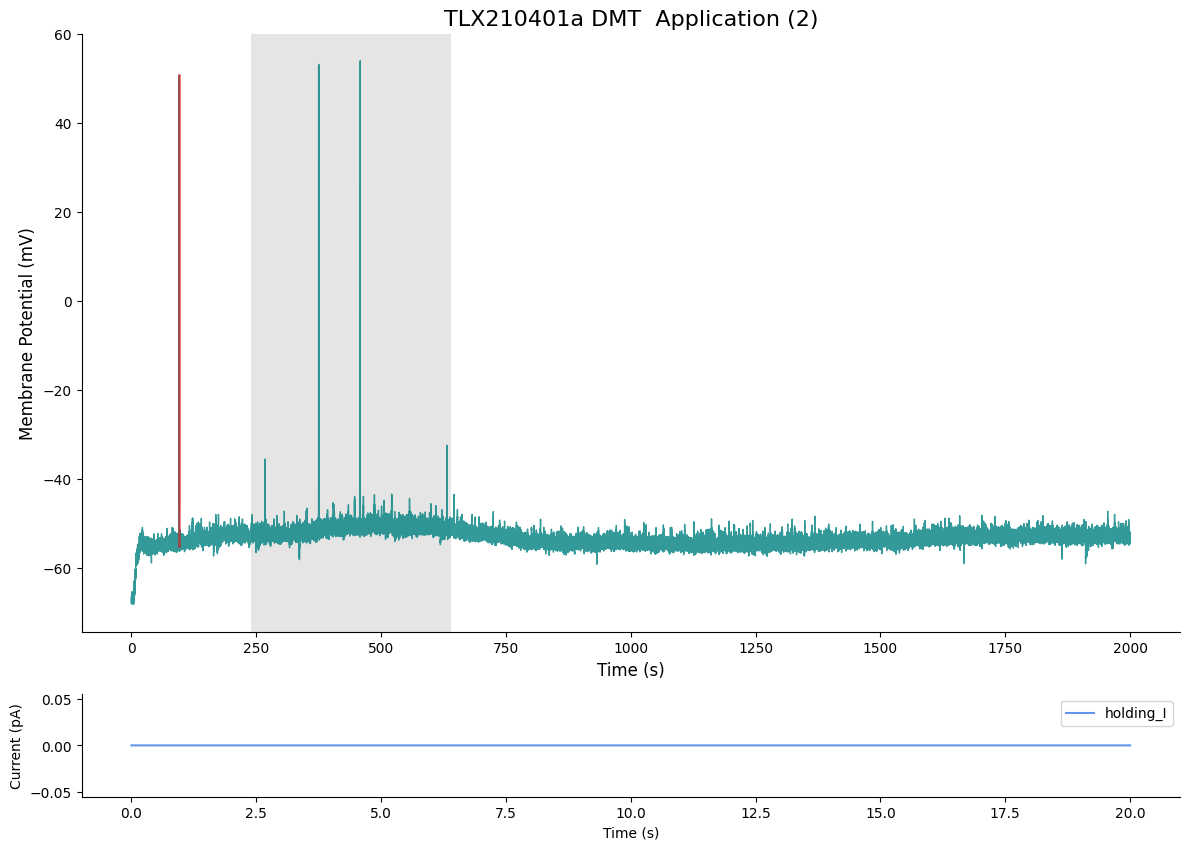

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210401a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210401a_application_2.png
BUILDING "TLX210421a Application 1 Figure"


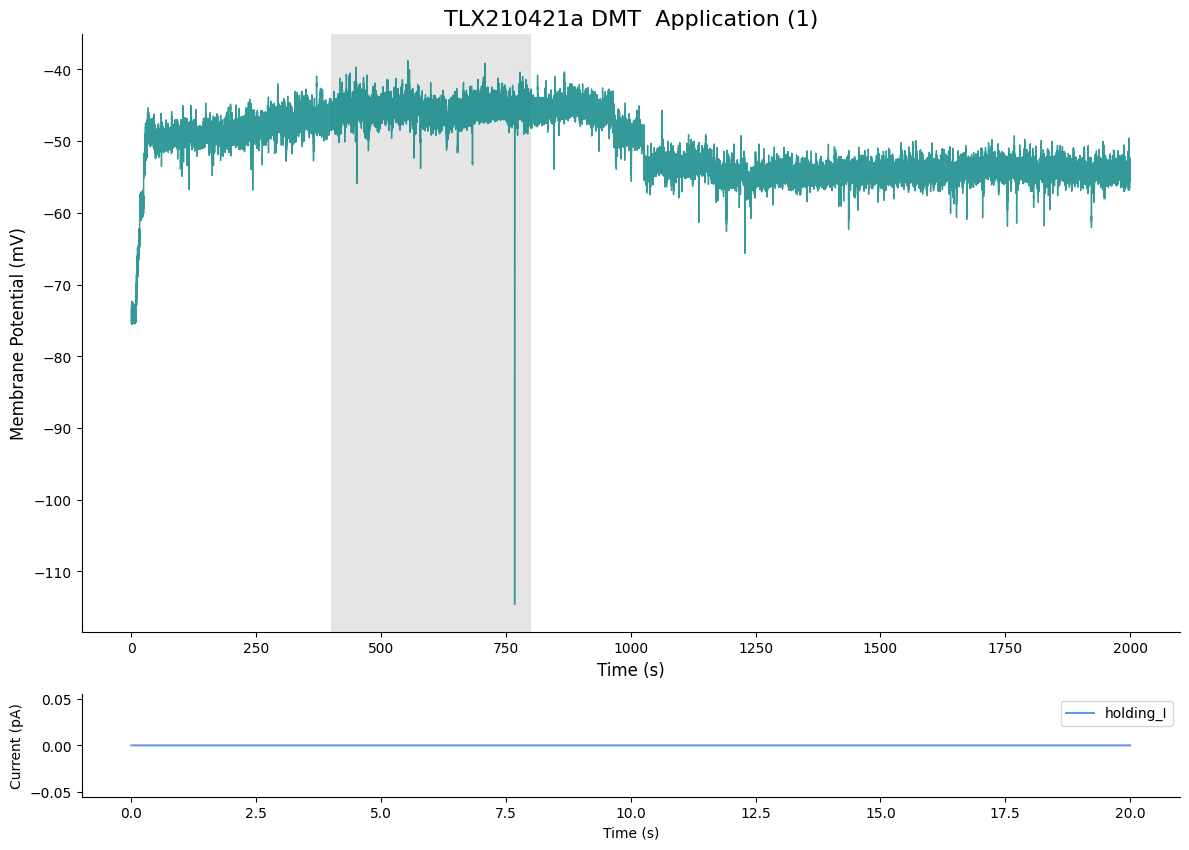

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210421a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210421a_application_1.png
BUILDING "TLX210421a Application 2 Figure"


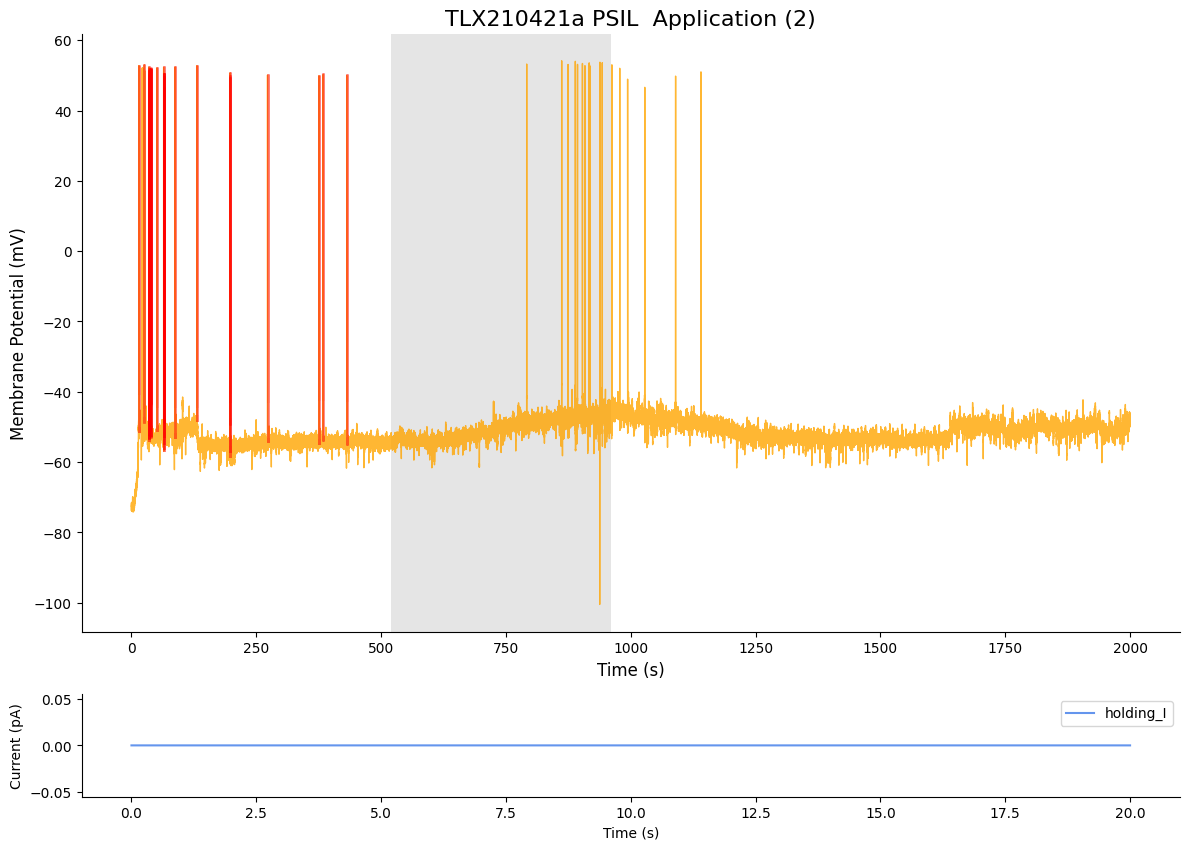

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210421a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210421a_application_2.png
BUILDING "TLX210422a Application 1 Figure"


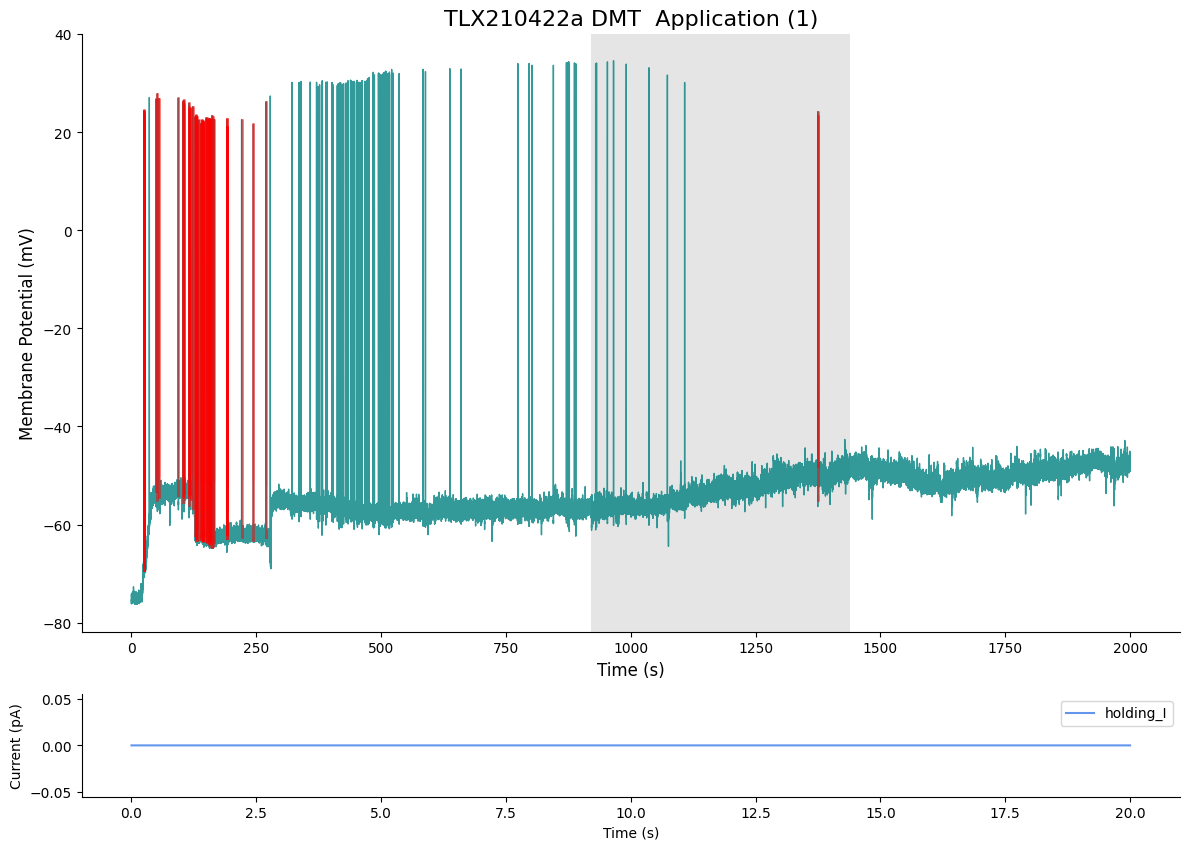

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422a_application_1.png
BUILDING "TLX210422b Application 1 Figure"


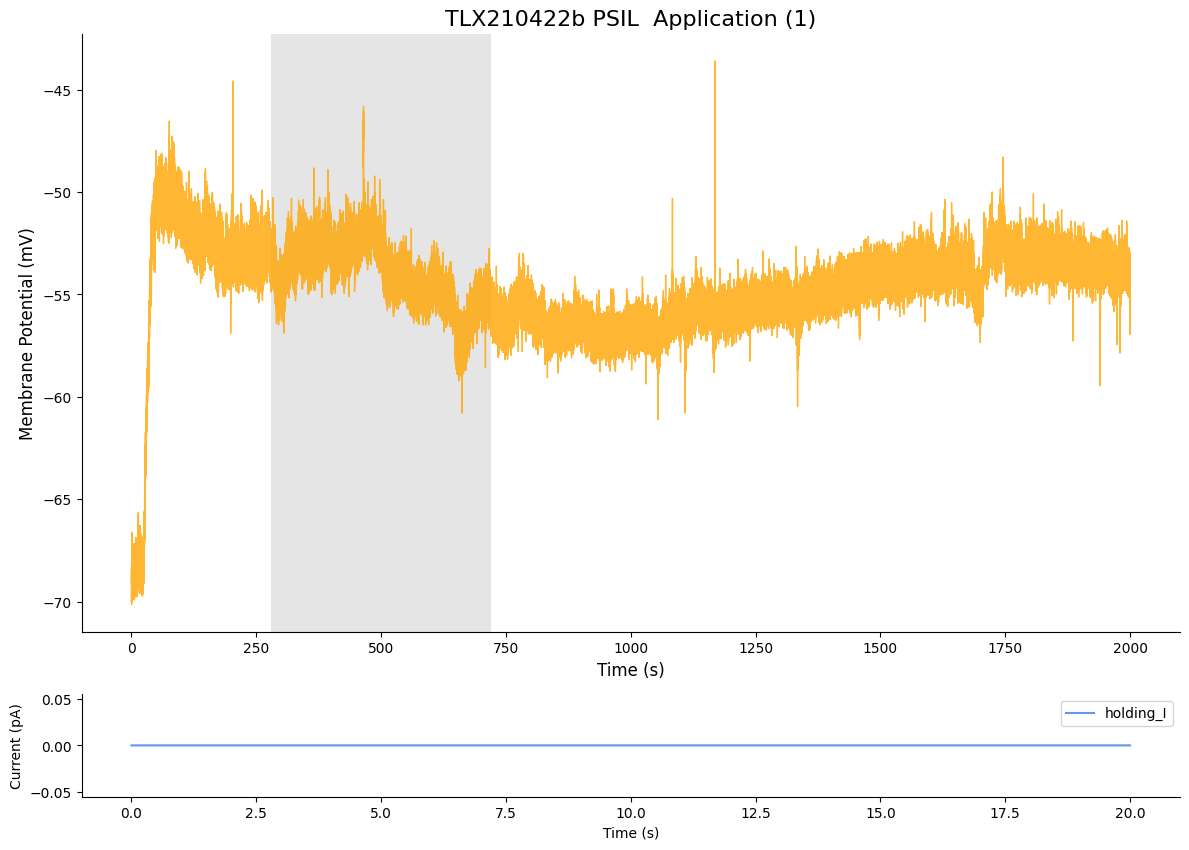

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422b_application_1.png
BUILDING "TLX210422b Application 2 Figure"


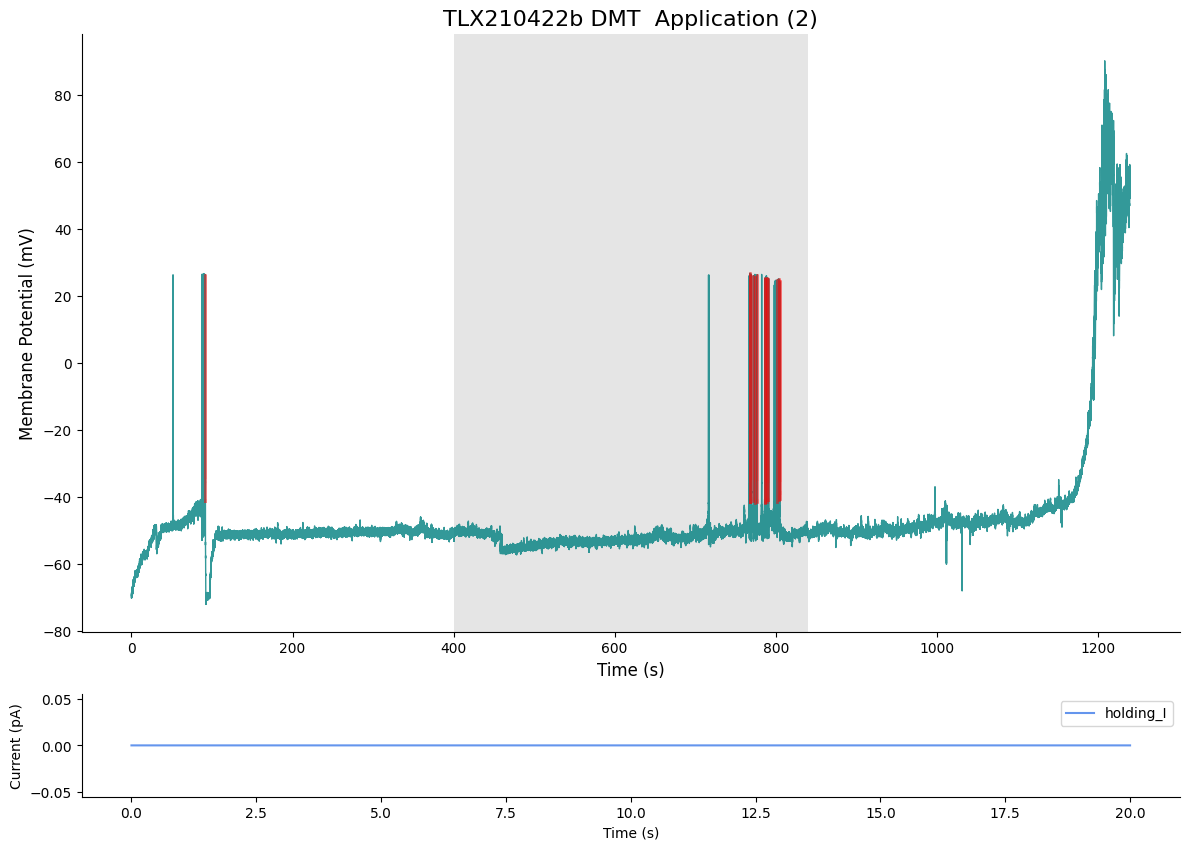

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422b_application_2.png
BUILDING "TLX210422c Application 1 Figure"


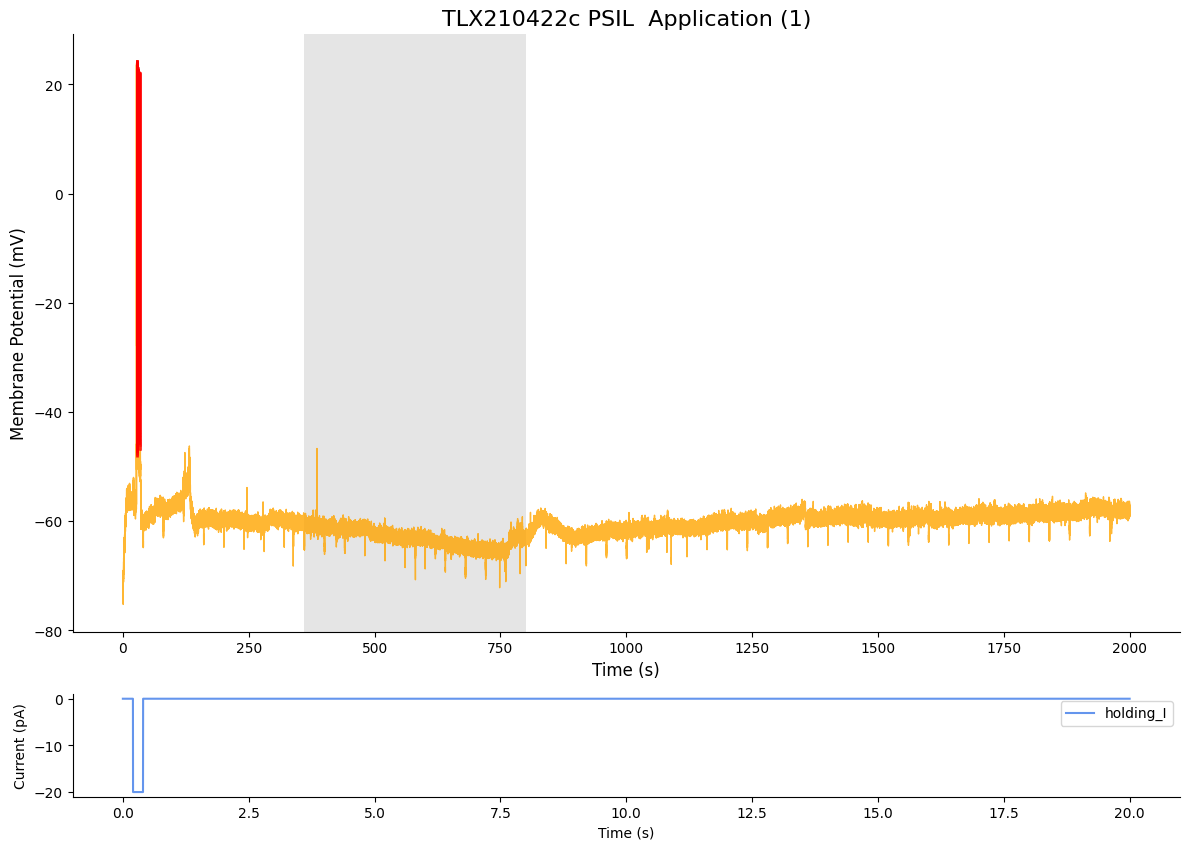

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422c_application_1.png
BUILDING "TLX210422c Application 2 Figure"


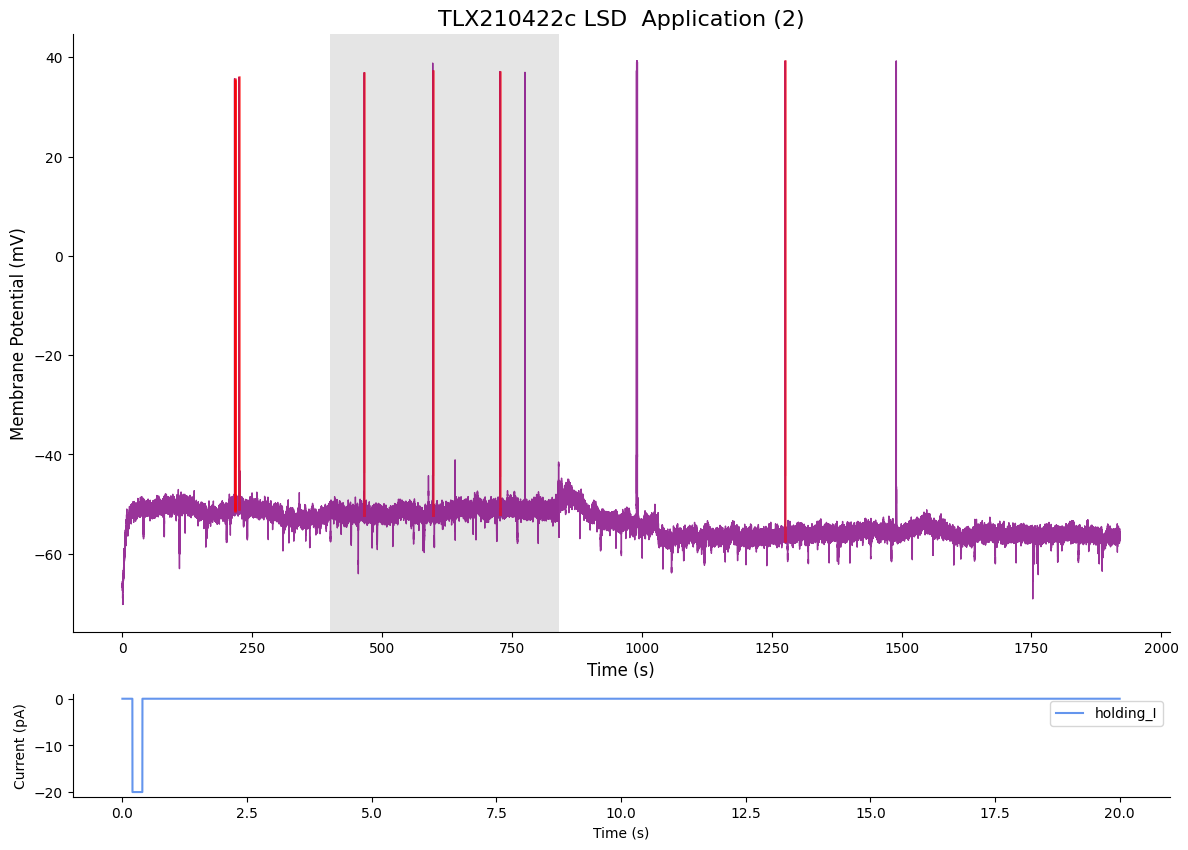

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422c_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210422c_application_2.png
BUILDING "TLX210603a Application 1 Figure"


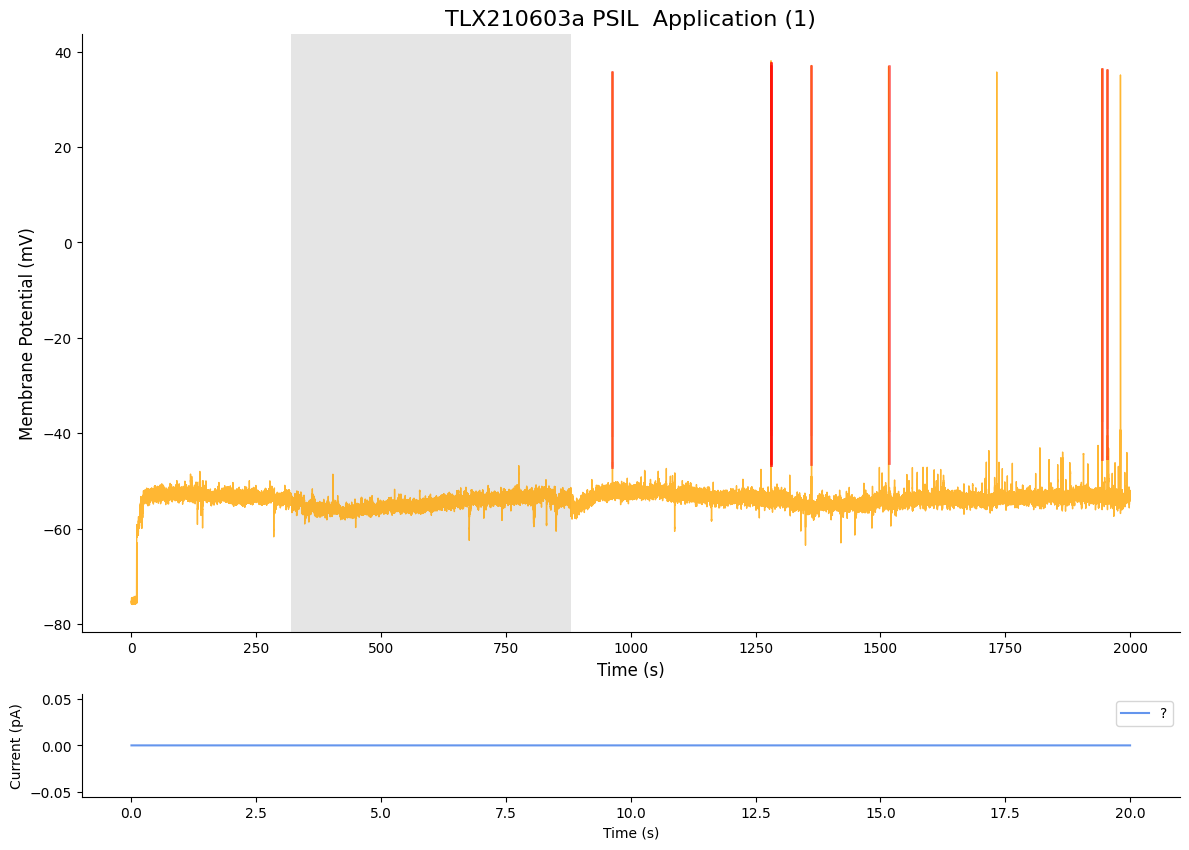

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603a_application_1.png
BUILDING "TLX210603a Application 2 Figure"


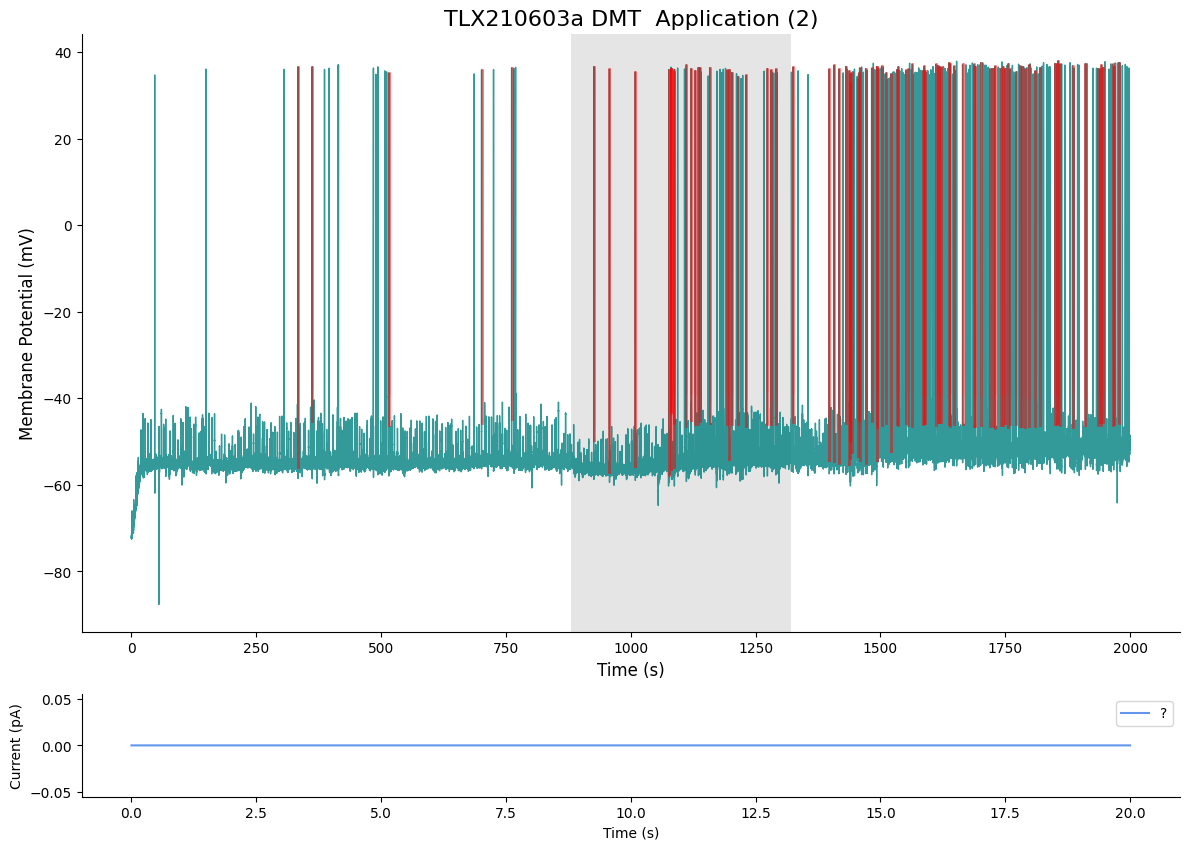

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603a_application_2.png
BUILDING "TLX210603b Application 1 Figure"


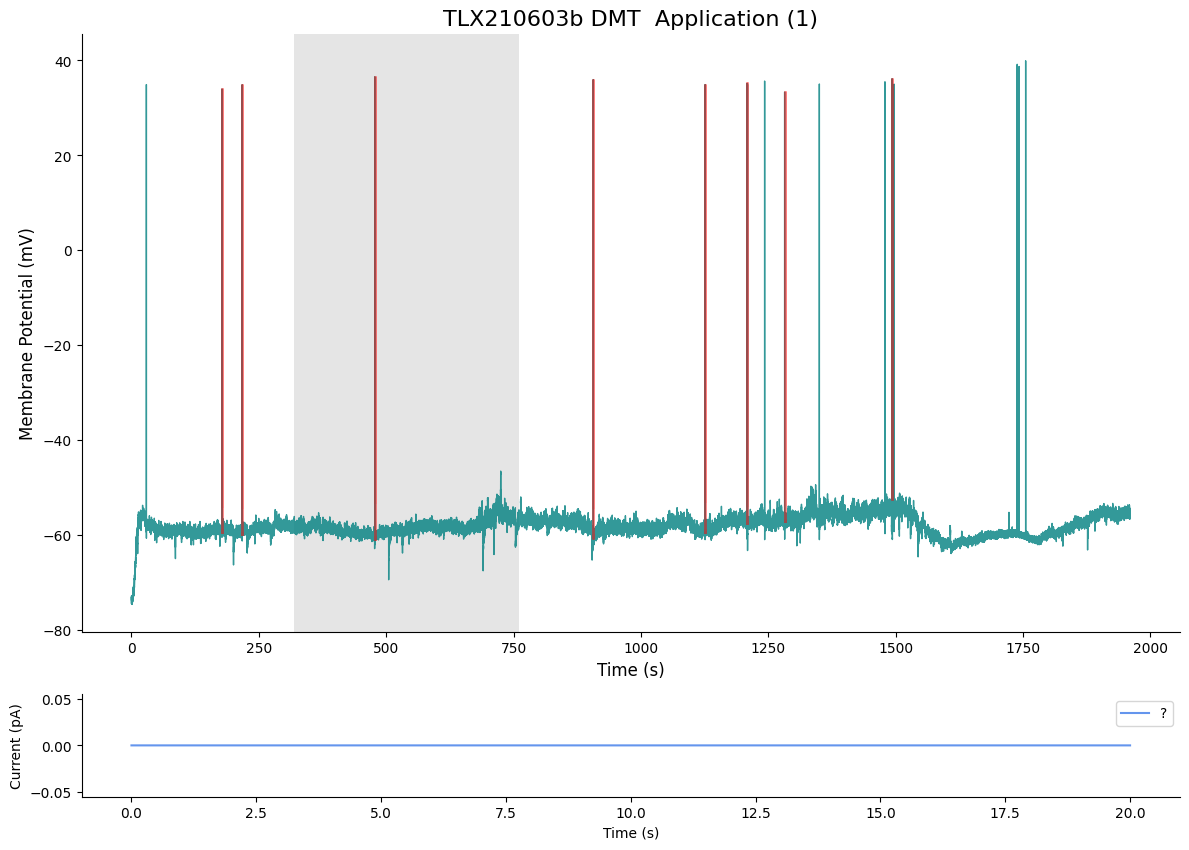

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603b_application_1.png
BUILDING "TLX210603b Application 2 Figure"


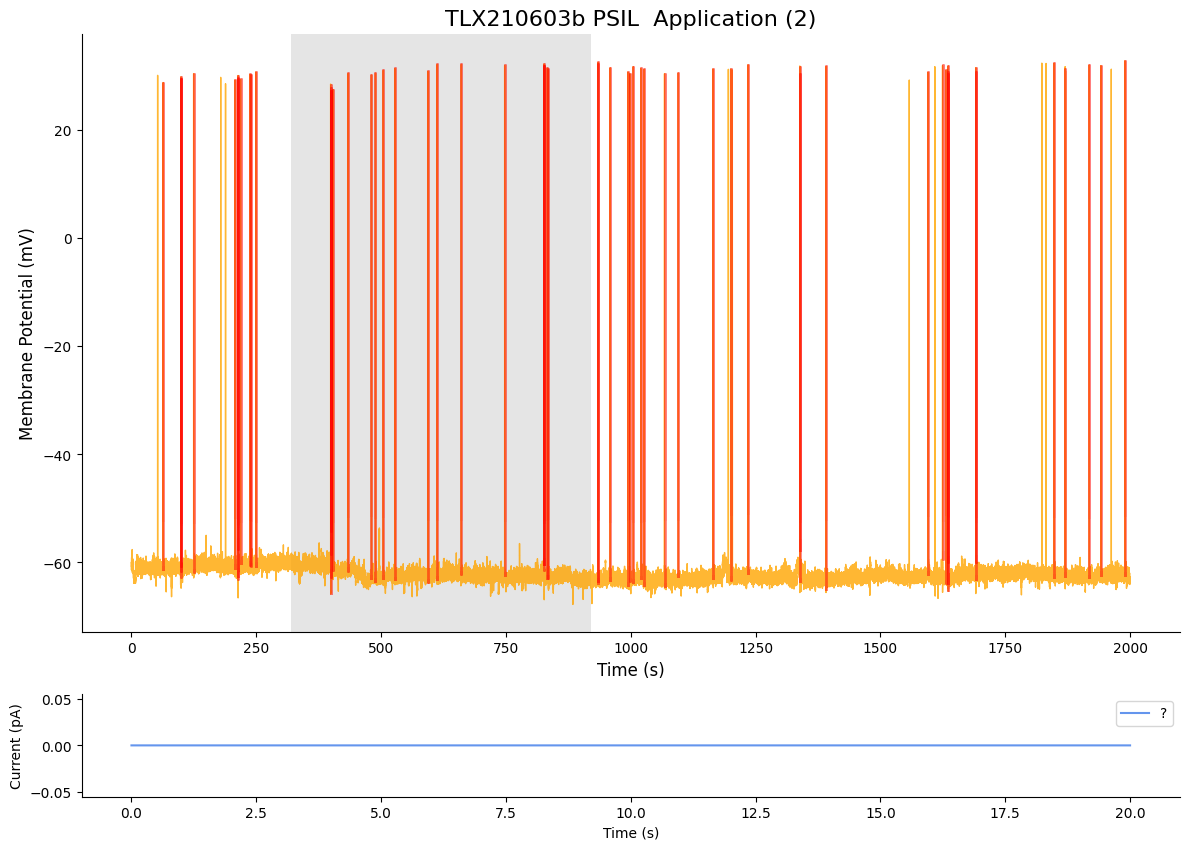

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210603b_application_2.png
BUILDING "DRD210225a Application 1 Figure"


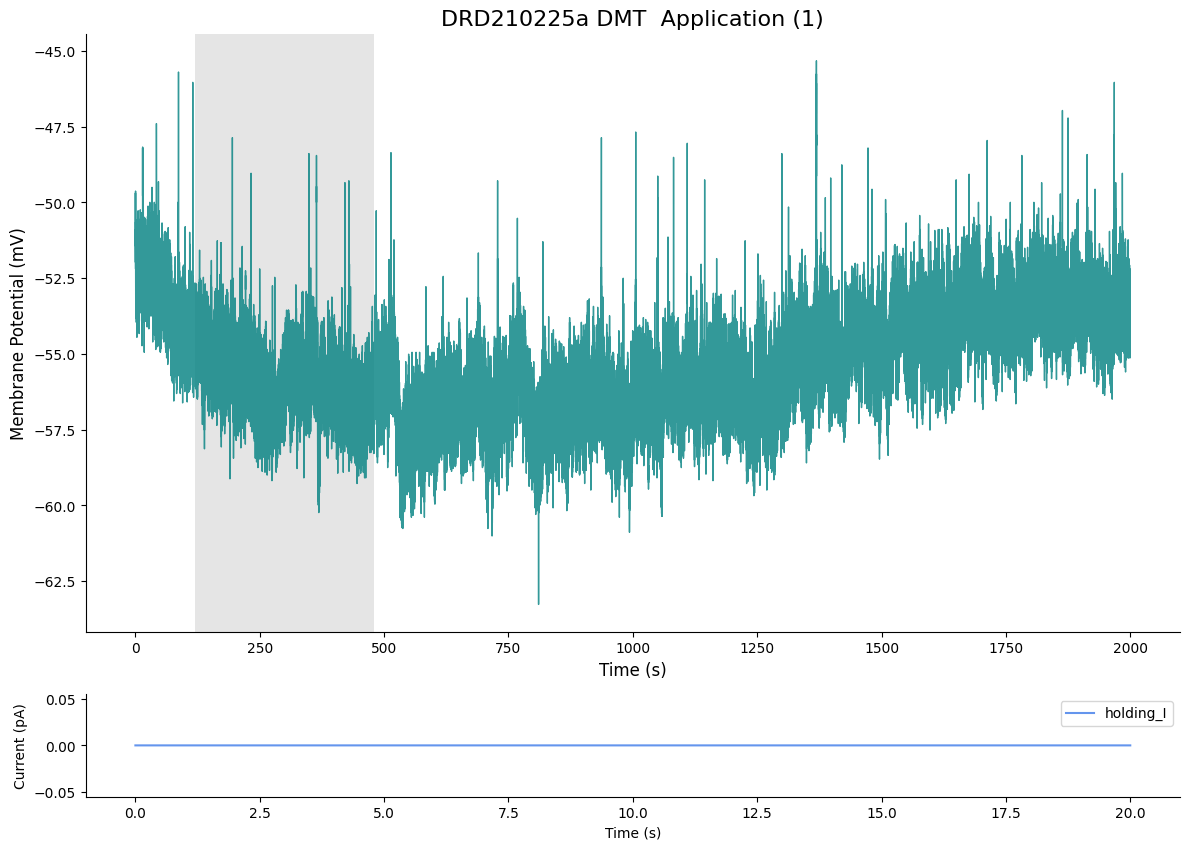

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225a_application_1.png
BUILDING "DRD210225b Application 1 Figure"


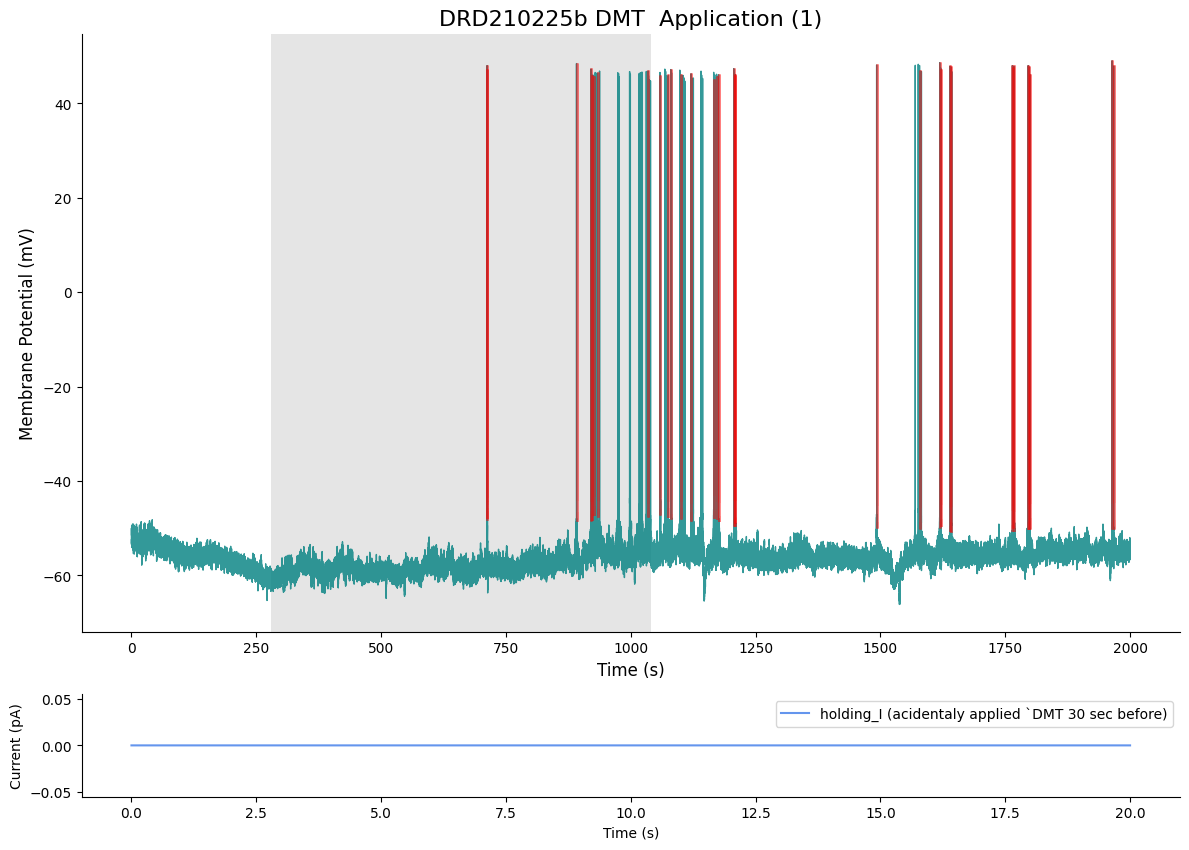

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225b_application_1.png
BUILDING "DRD210225c Application 1 Figure"


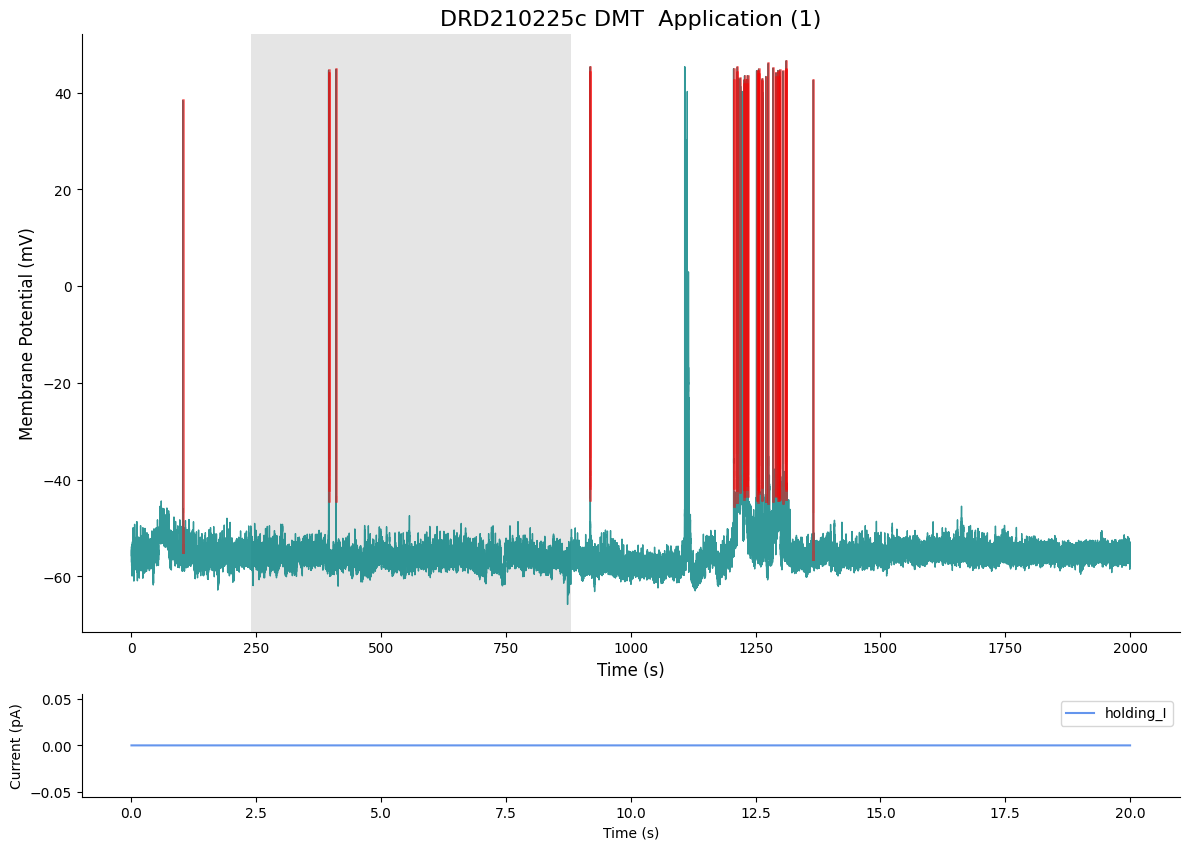

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210225c_application_1.png
BUILDING "DRD210310a Application 1 Figure"


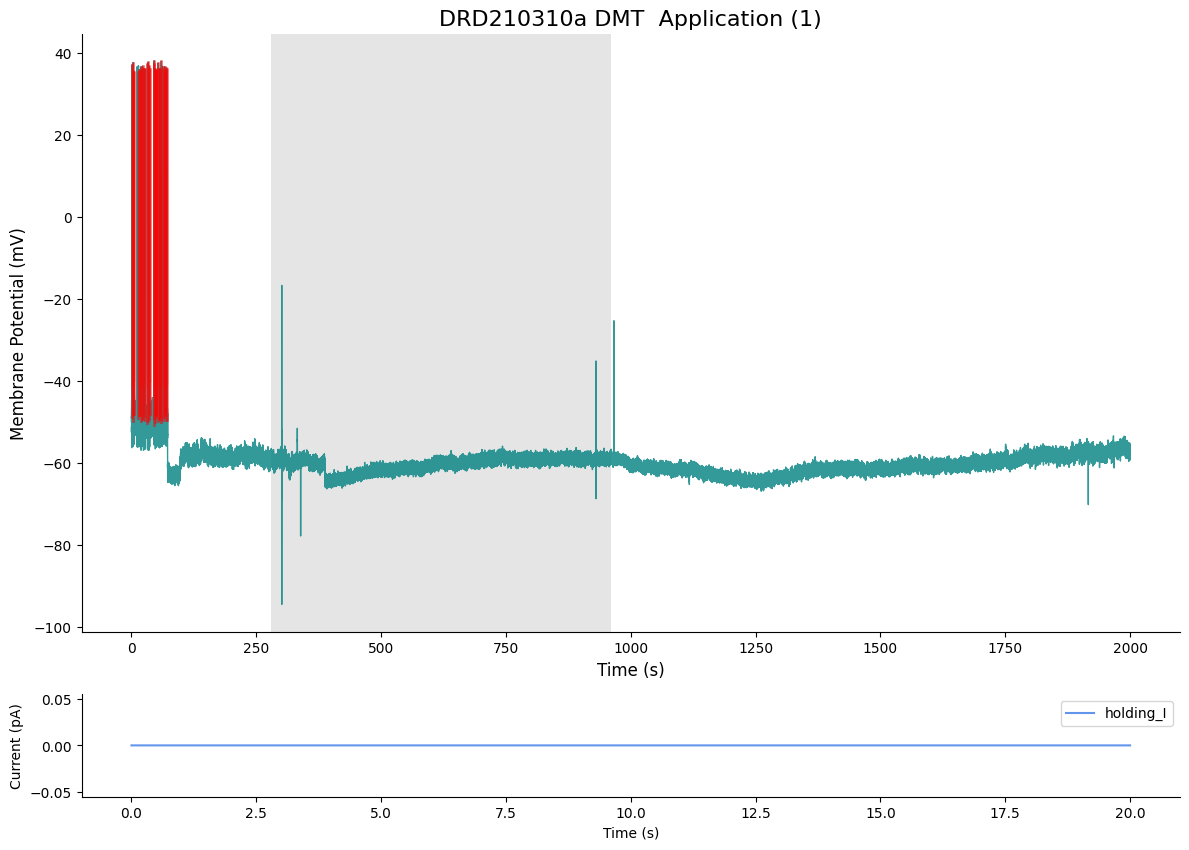

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310a_application_1.png
BUILDING "DRD210310b Application 1 Figure"
AP width calculation not accurate!!


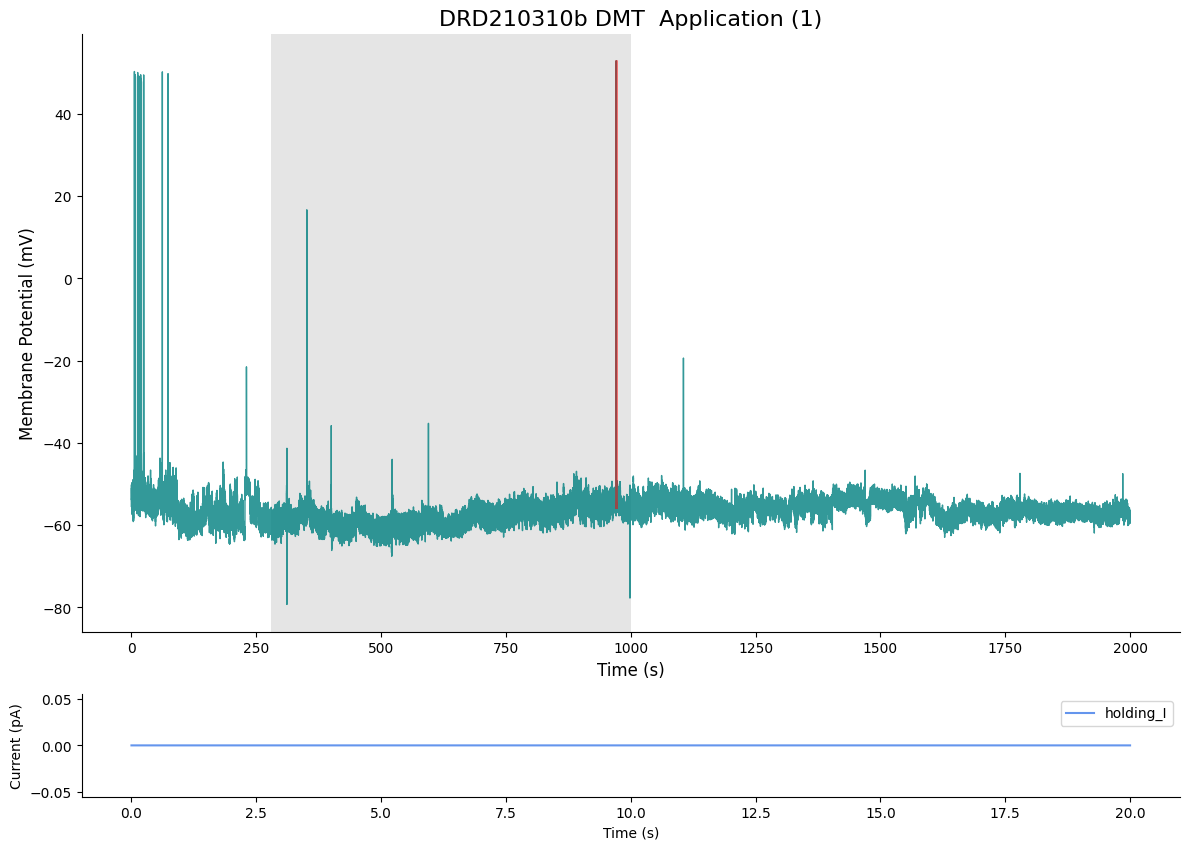

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310b_application_1.png
BUILDING "DRD210310c Application 1 Figure"
AP width calculation not accurate!!
AP width calculation not accurate!!


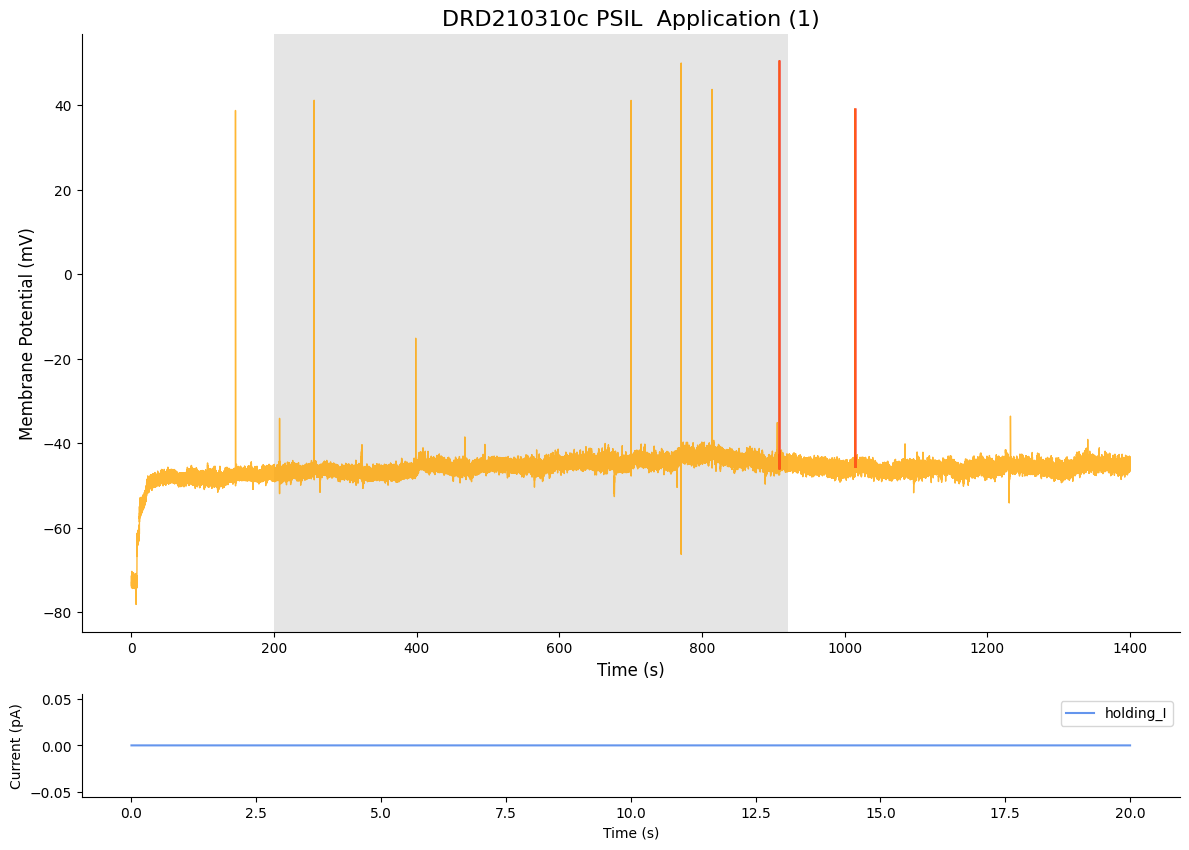

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210310c_application_1.png
BUILDING "DRD210315a Application 1 Figure"


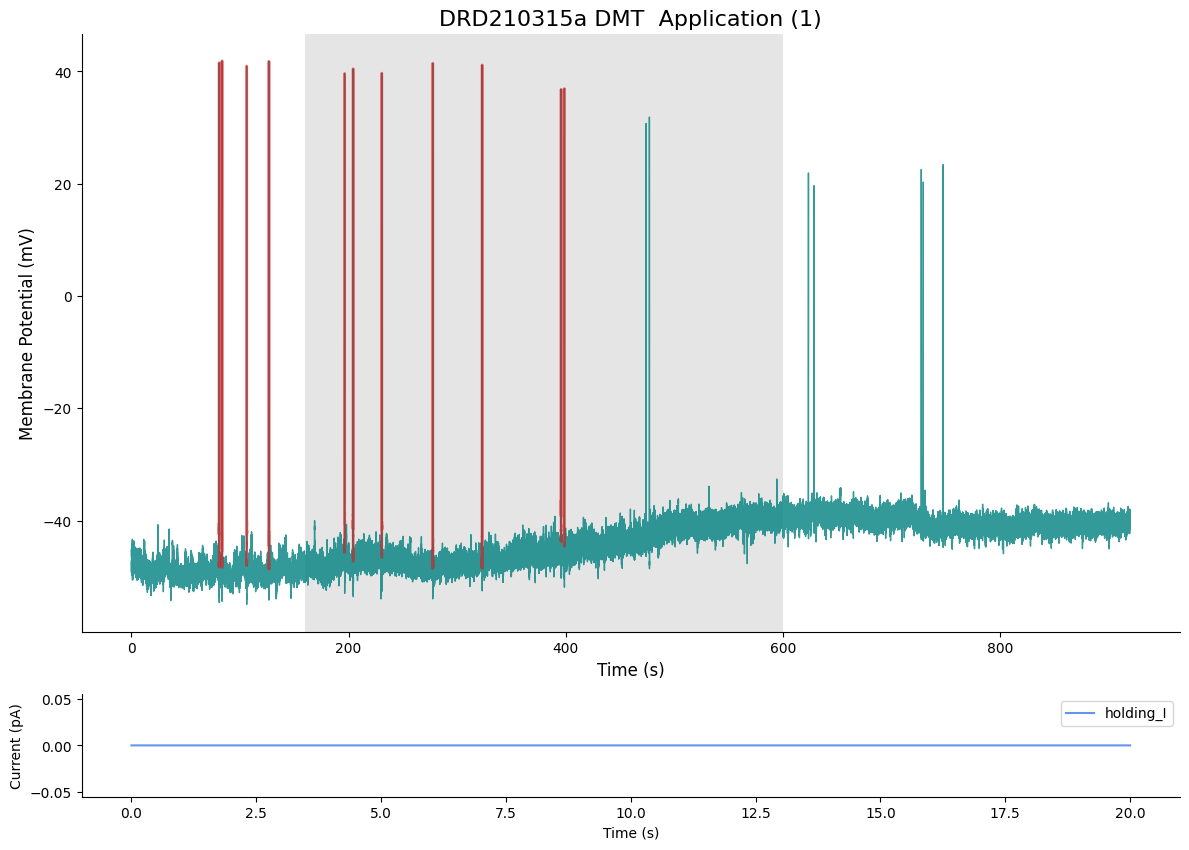

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315a_application_1.png
BUILDING "DRD210315b Application 1 Figure"


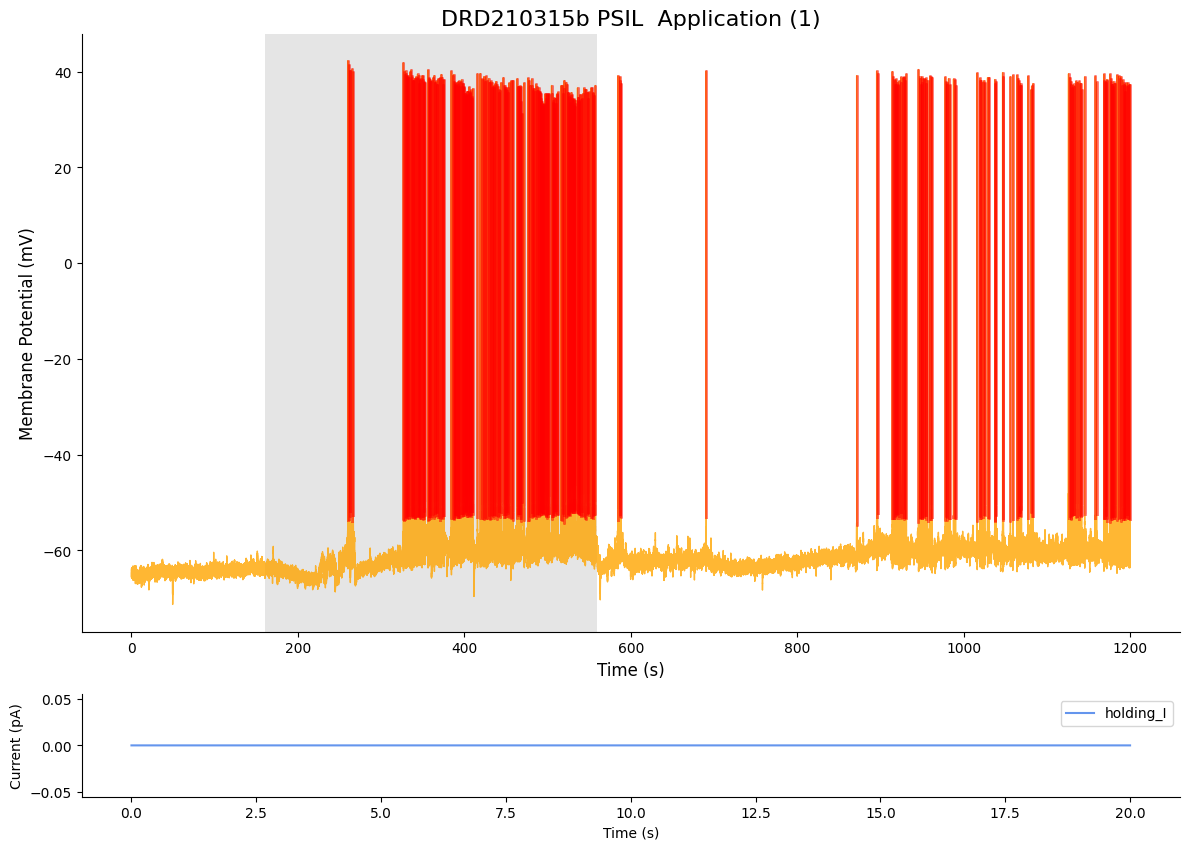

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315b_application_1.png
BUILDING "DRD210315b Application 2 Figure"


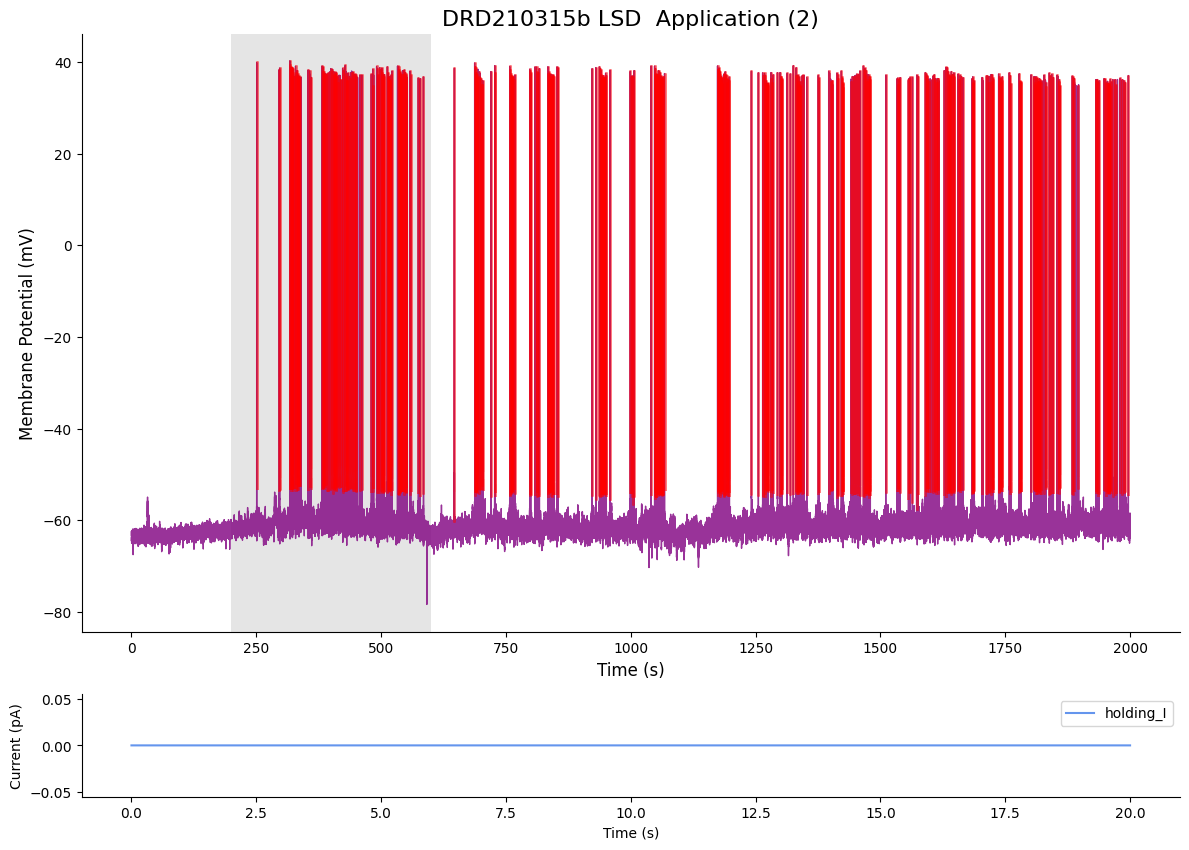

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210315b_application_2.png
BUILDING "DRD210318a Application 1 Figure"


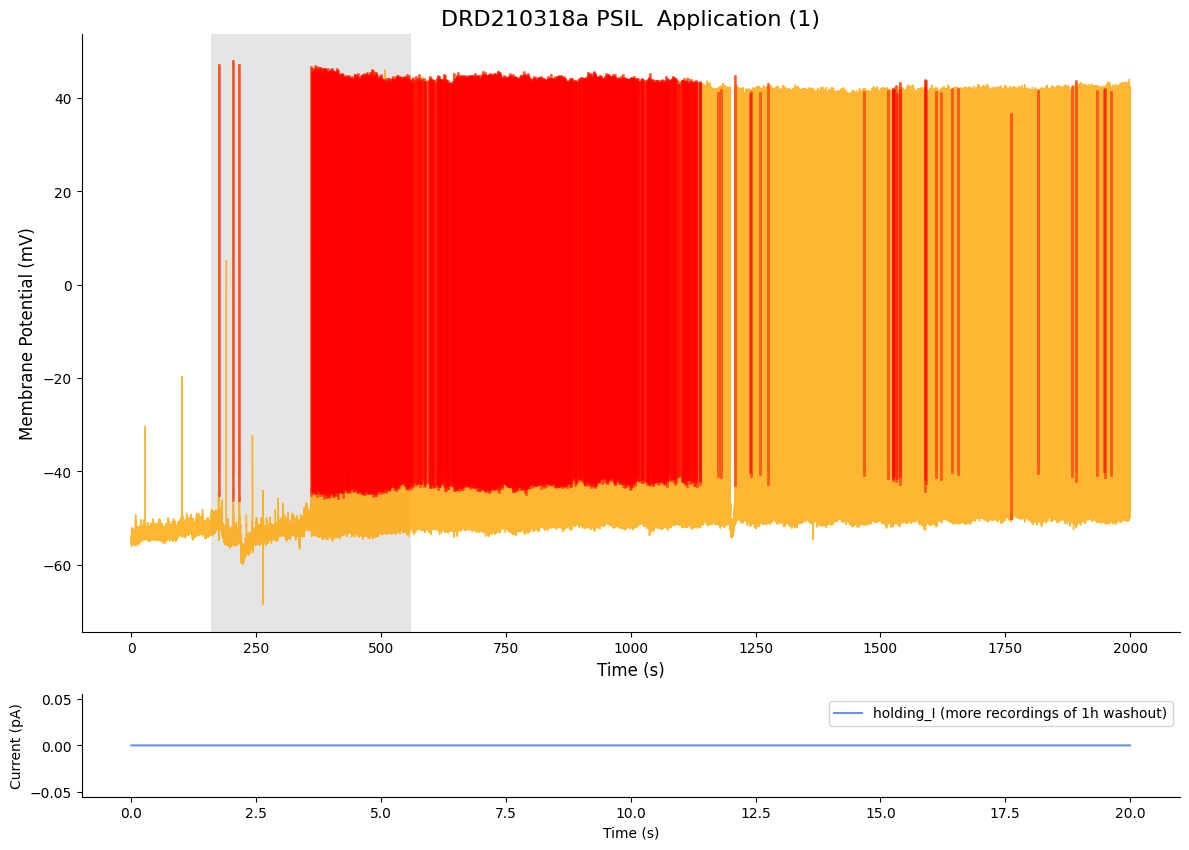

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210318a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210318a_application_1.png
BUILDING "DRD210319a Application 1 Figure"


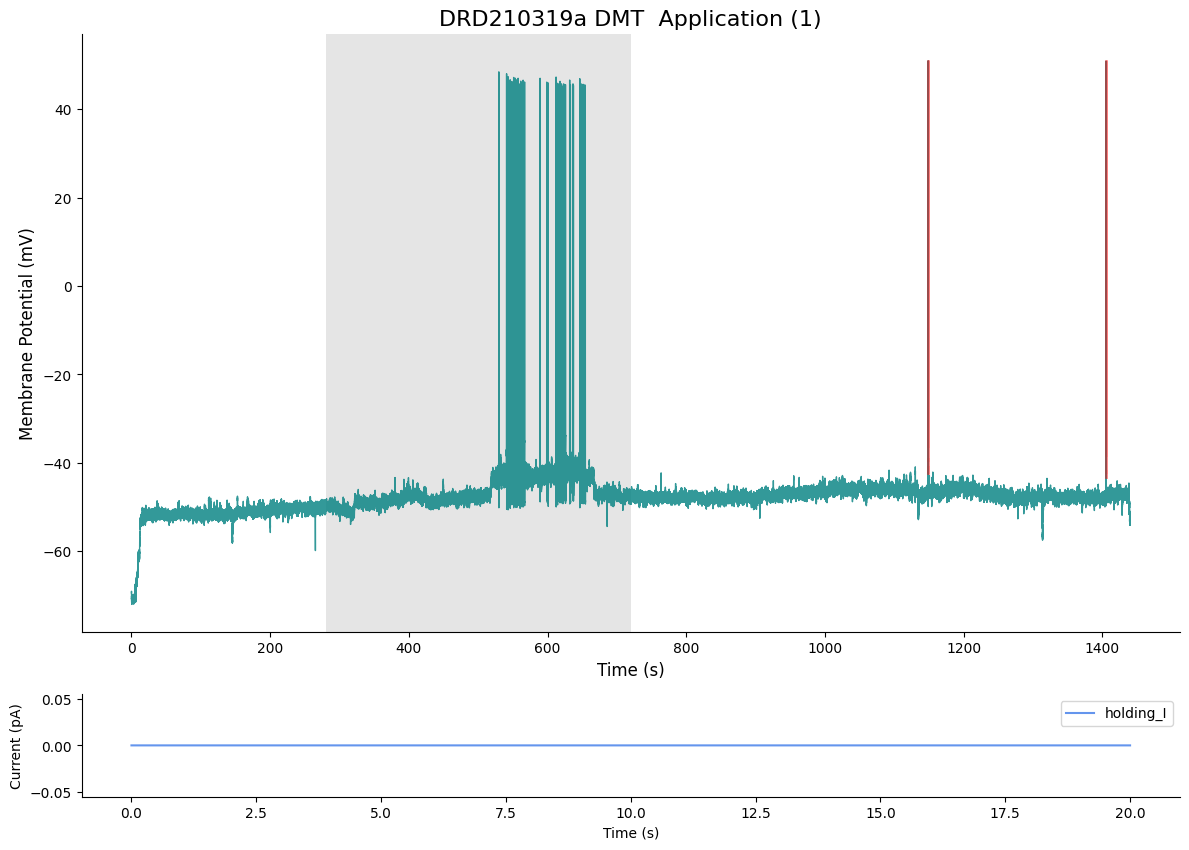

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210319a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210319a_application_1.png
BUILDING "DRD210319b Application 1 Figure"


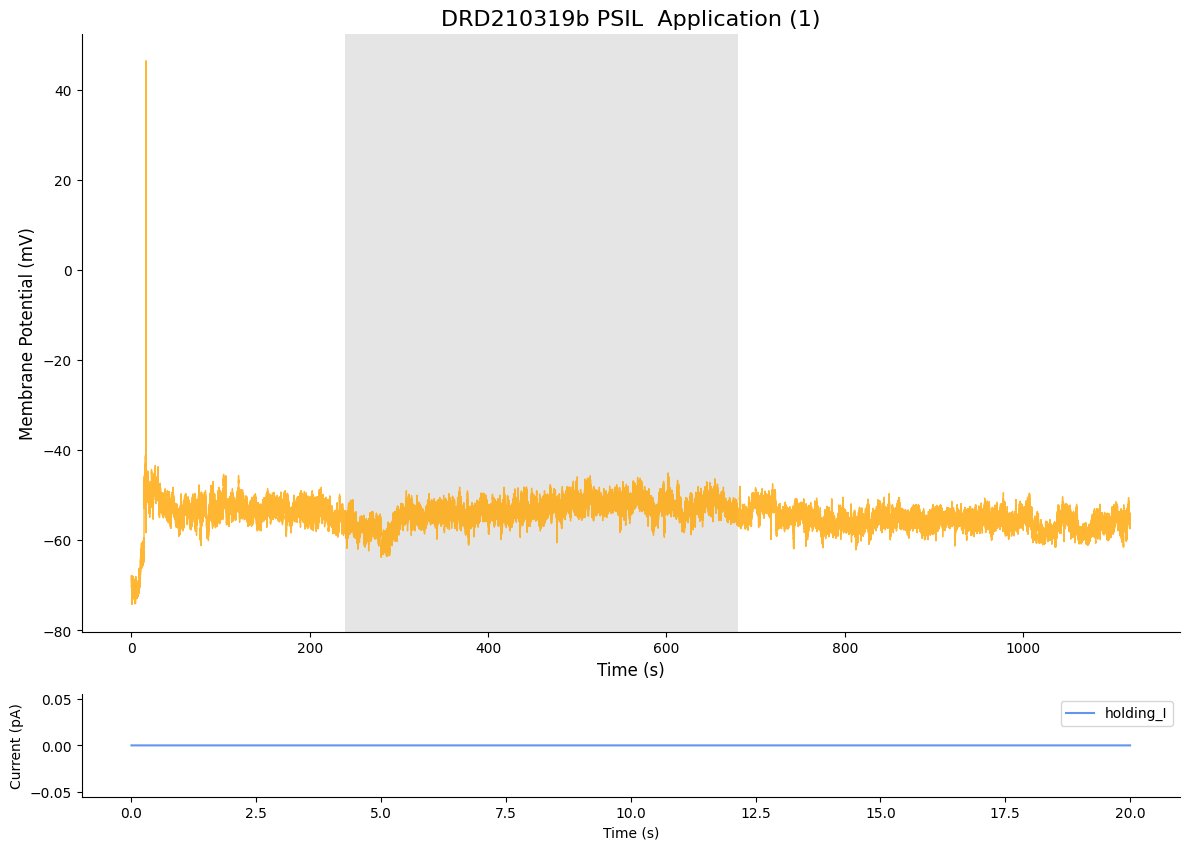

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210319b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210319b_application_1.png
BUILDING "DRD210320a Application 1 Figure"


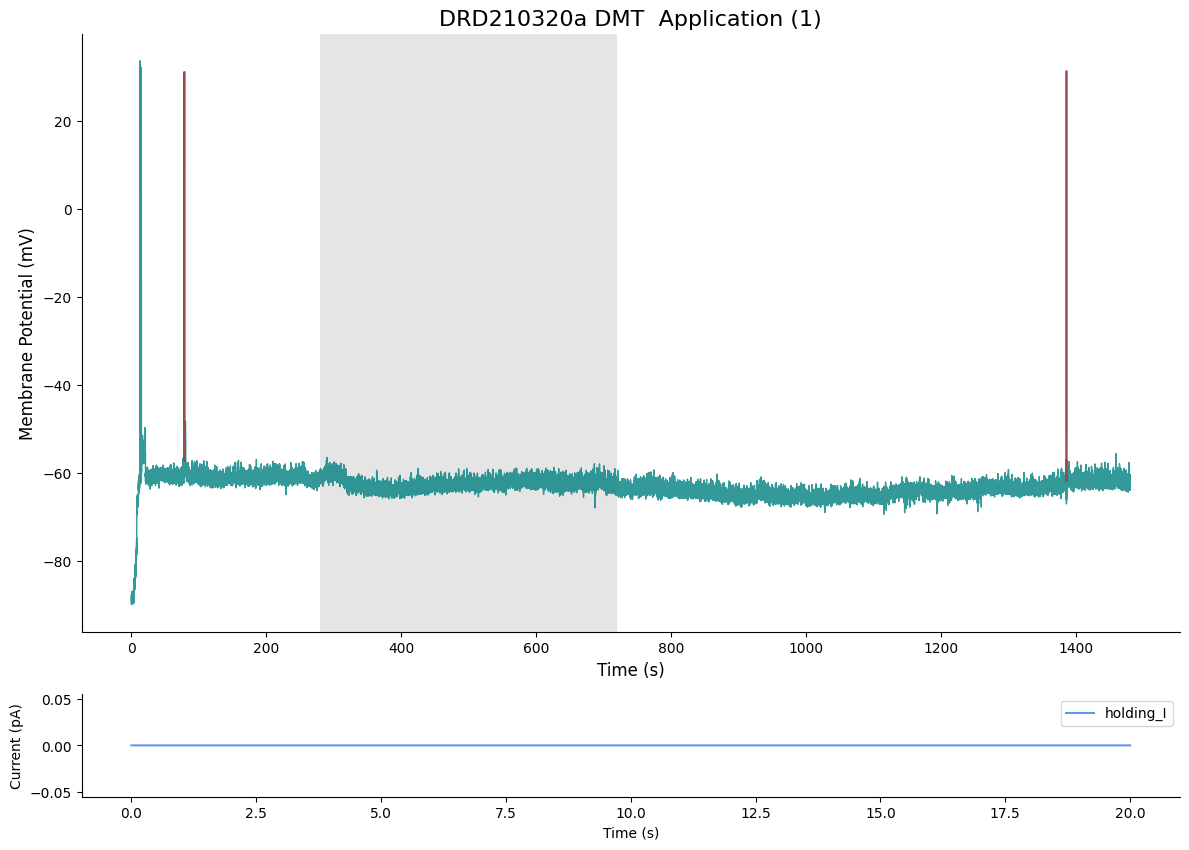

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210320a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210320a_application_1.png
BUILDING "DRD210320b Application 1 Figure"


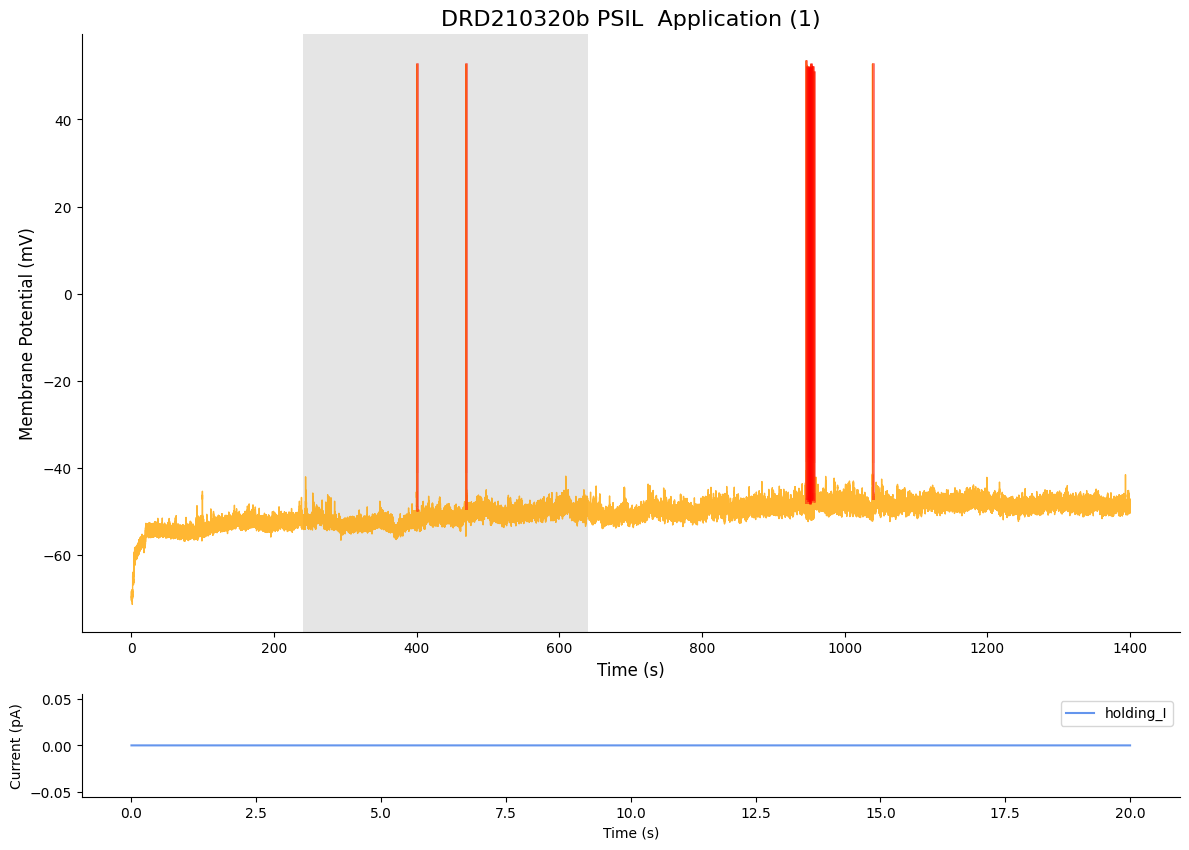

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210320b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210320b_application_1.png
BUILDING "DRD210402a Application 1 Figure"


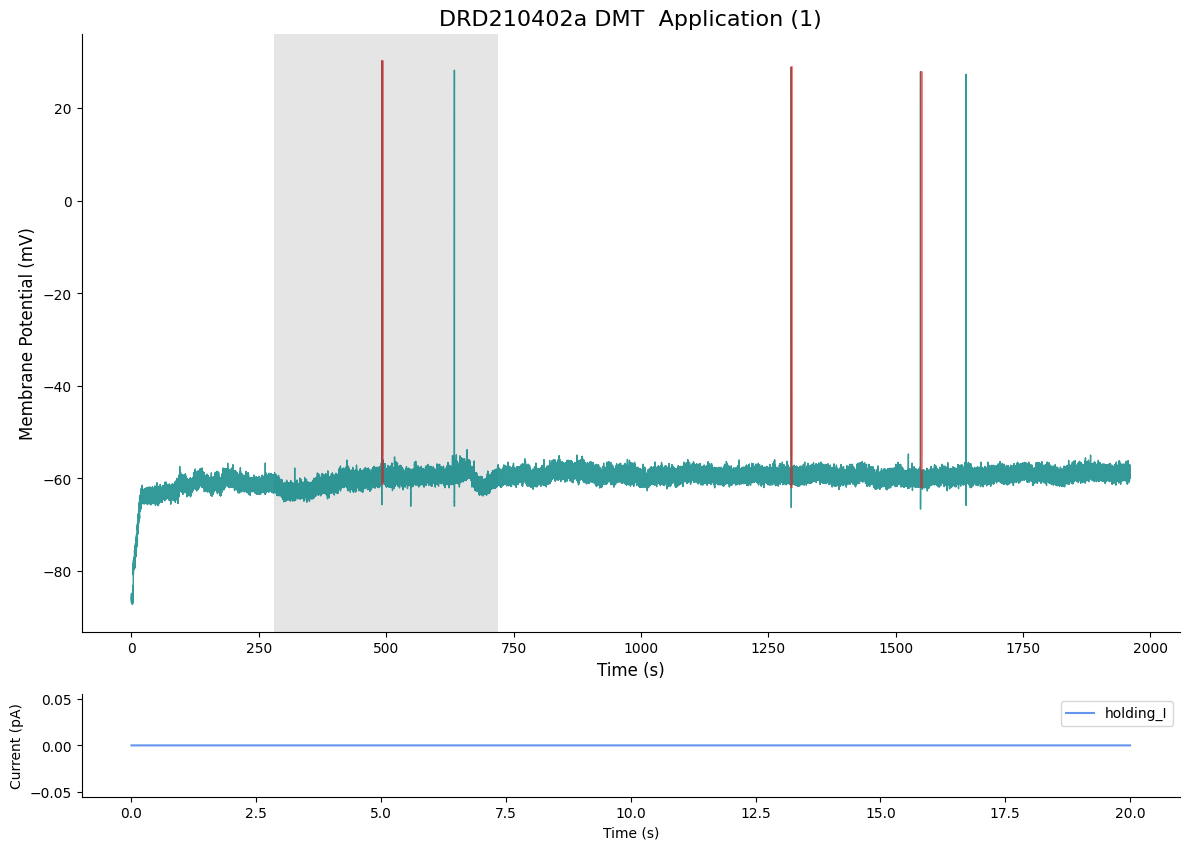

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210402a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210402a_application_1.png
BUILDING "DRD210402b Application 1 Figure"


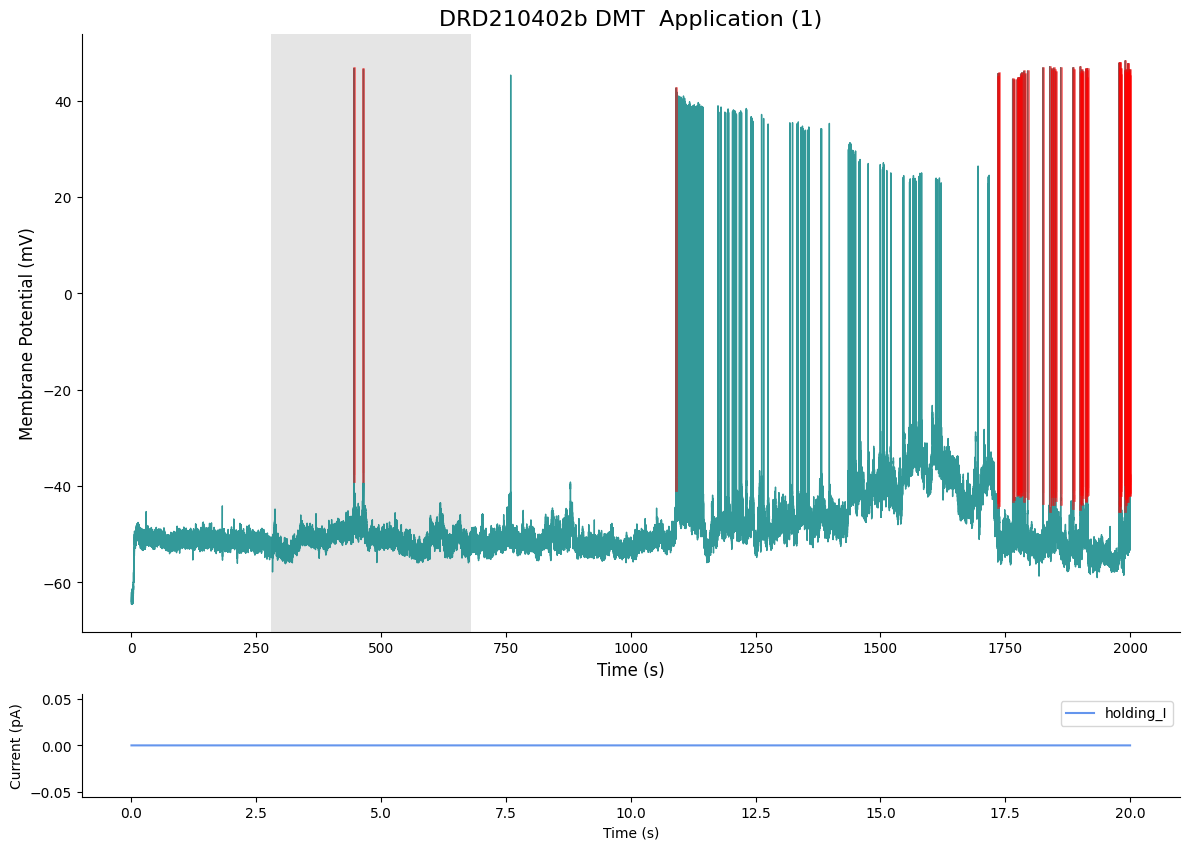

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210402b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210402b_application_1.png
BUILDING "DRD210404a Application 1 Figure"


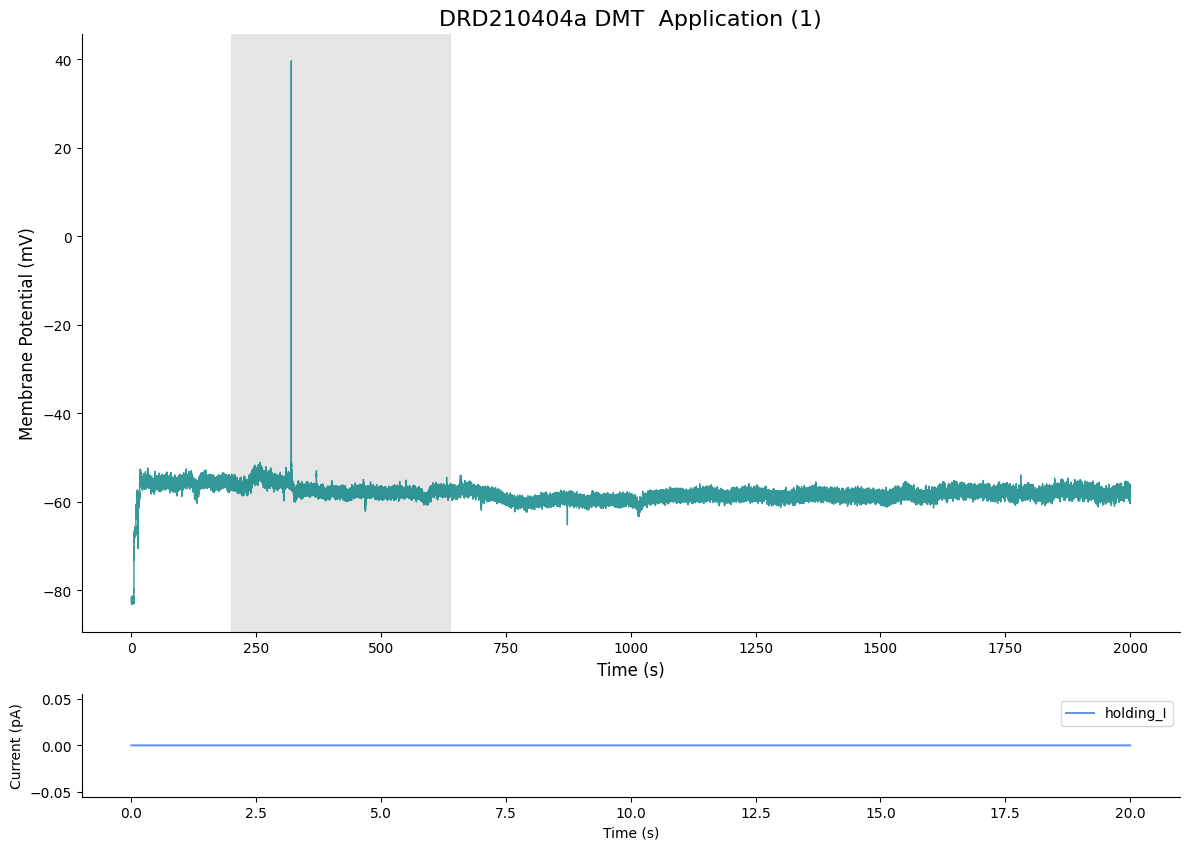

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404a_application_1.png
BUILDING "DRD210404a Application 2 Figure"


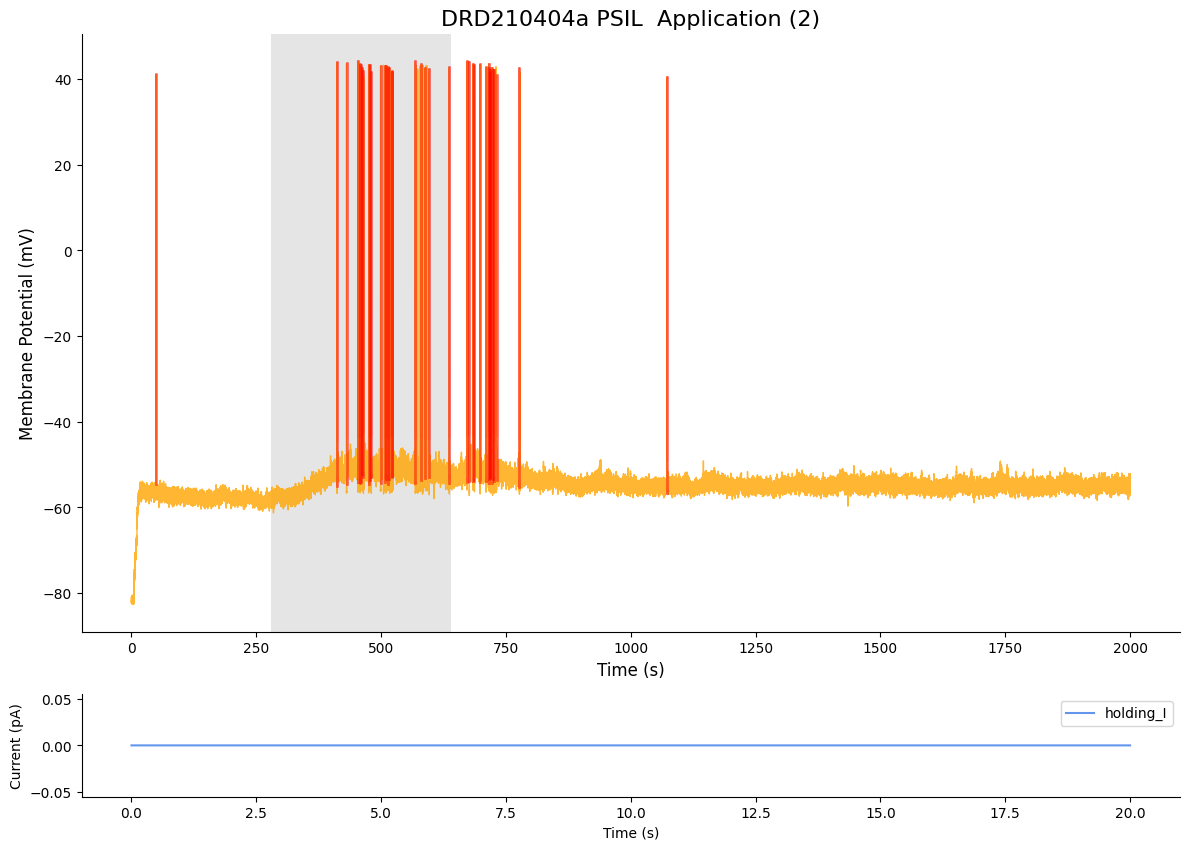

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404a_application_2.png
BUILDING "DRD210404b Application 1 Figure"


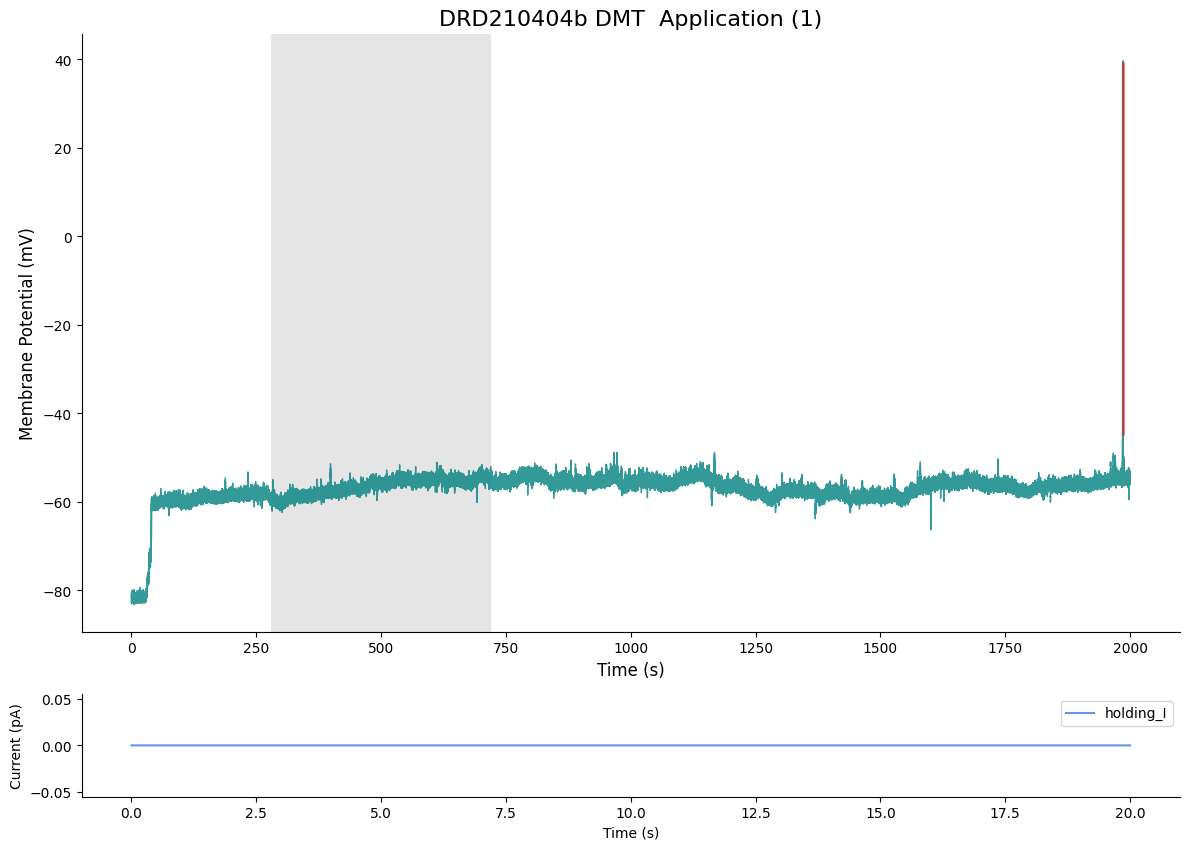

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404b_application_1.png
BUILDING "DRD210404b Application 2 Figure"


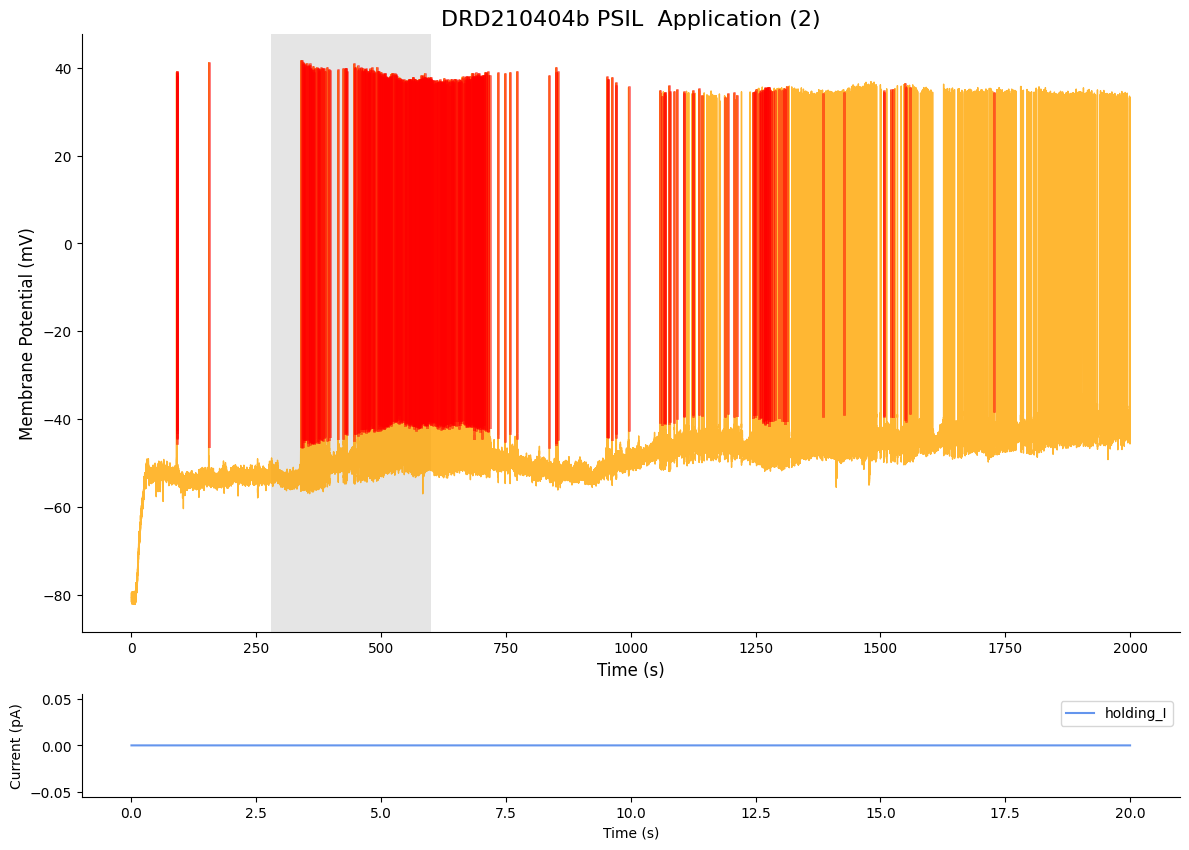

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210404b_application_2.png
BUILDING "DRD210504a Application 1 Figure"


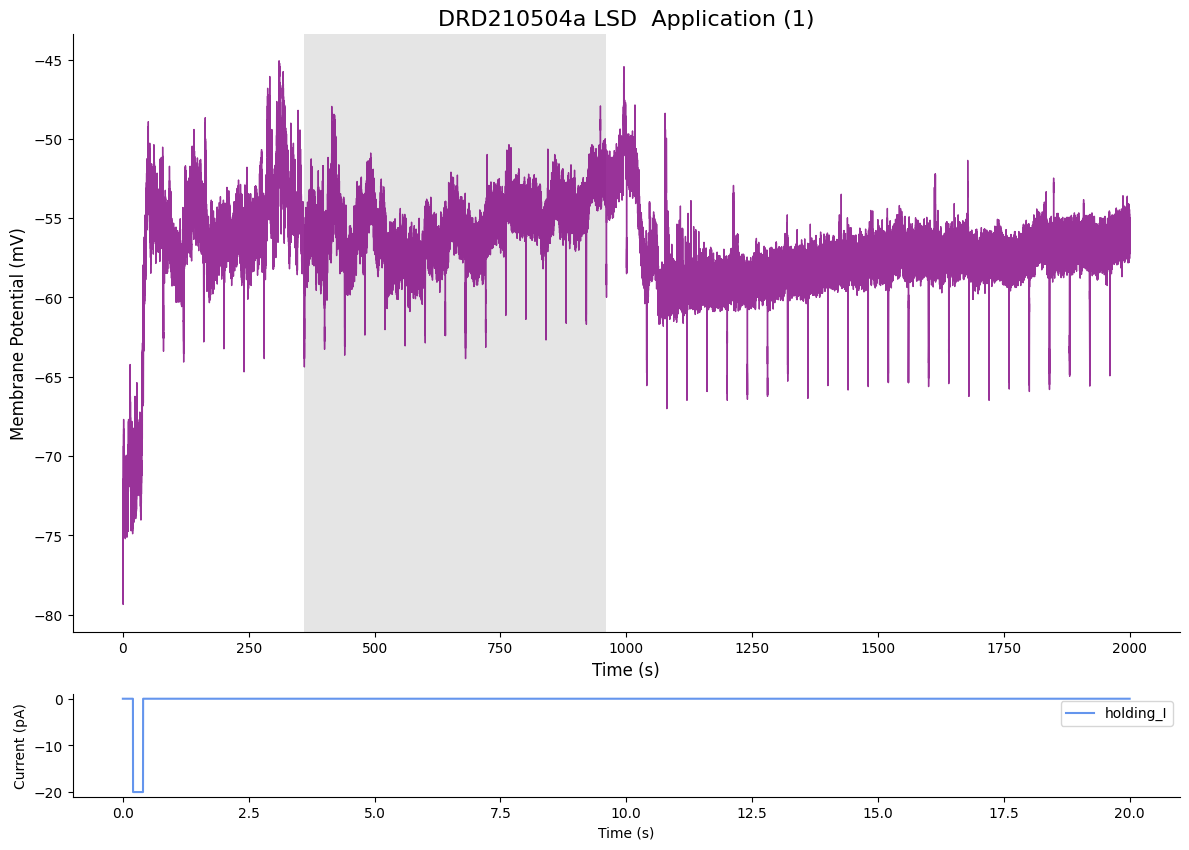

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504a_application_1.png
BUILDING "DRD210504b Application 1 Figure"


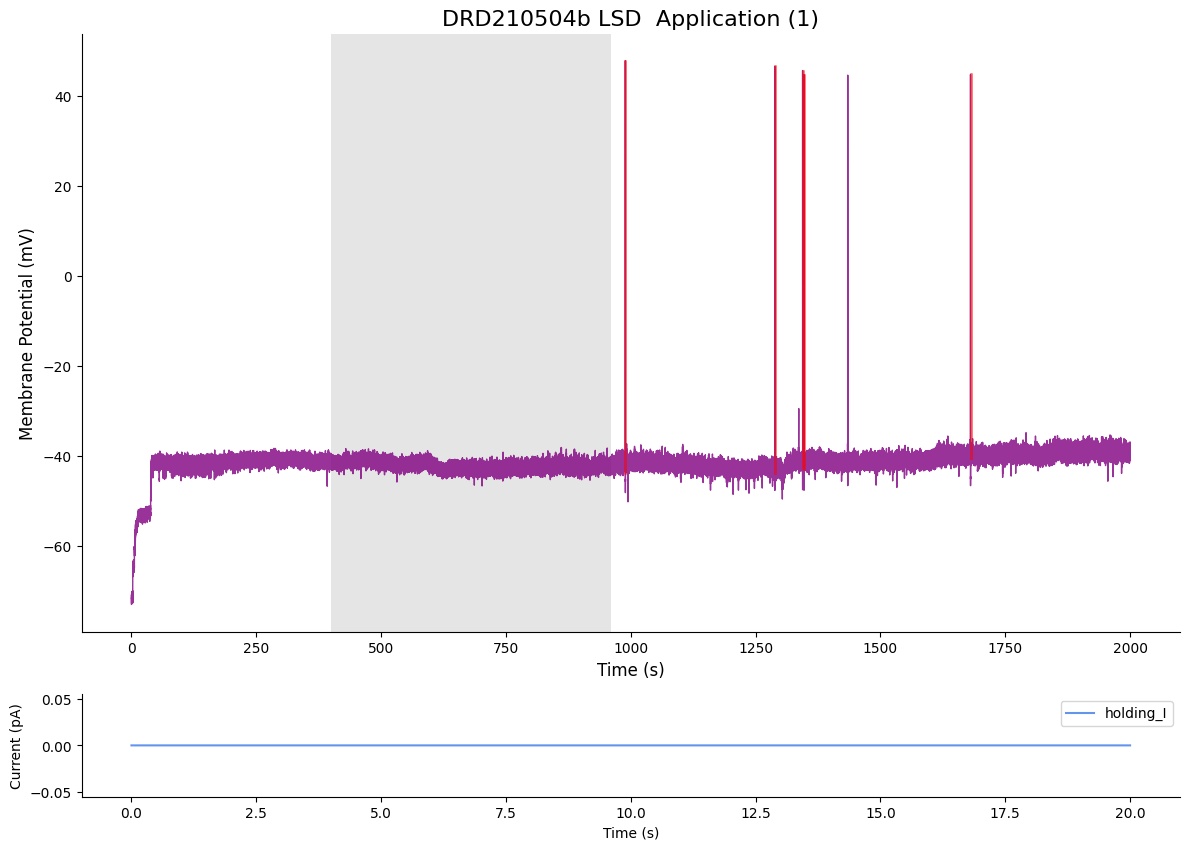

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504b_application_1.png
BUILDING "DRD210504b Application 2 Figure"


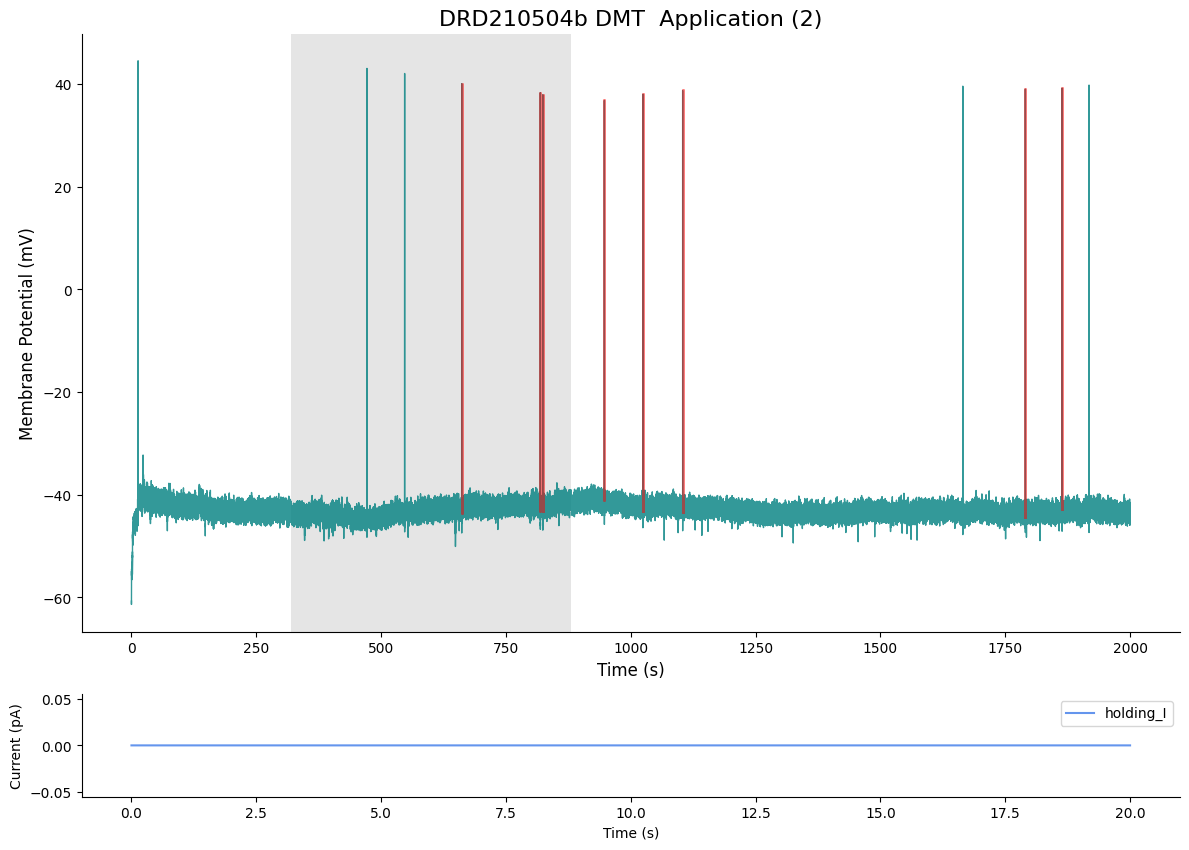

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504b_application_2.png
BUILDING "DRD210504c Application 1 Figure"


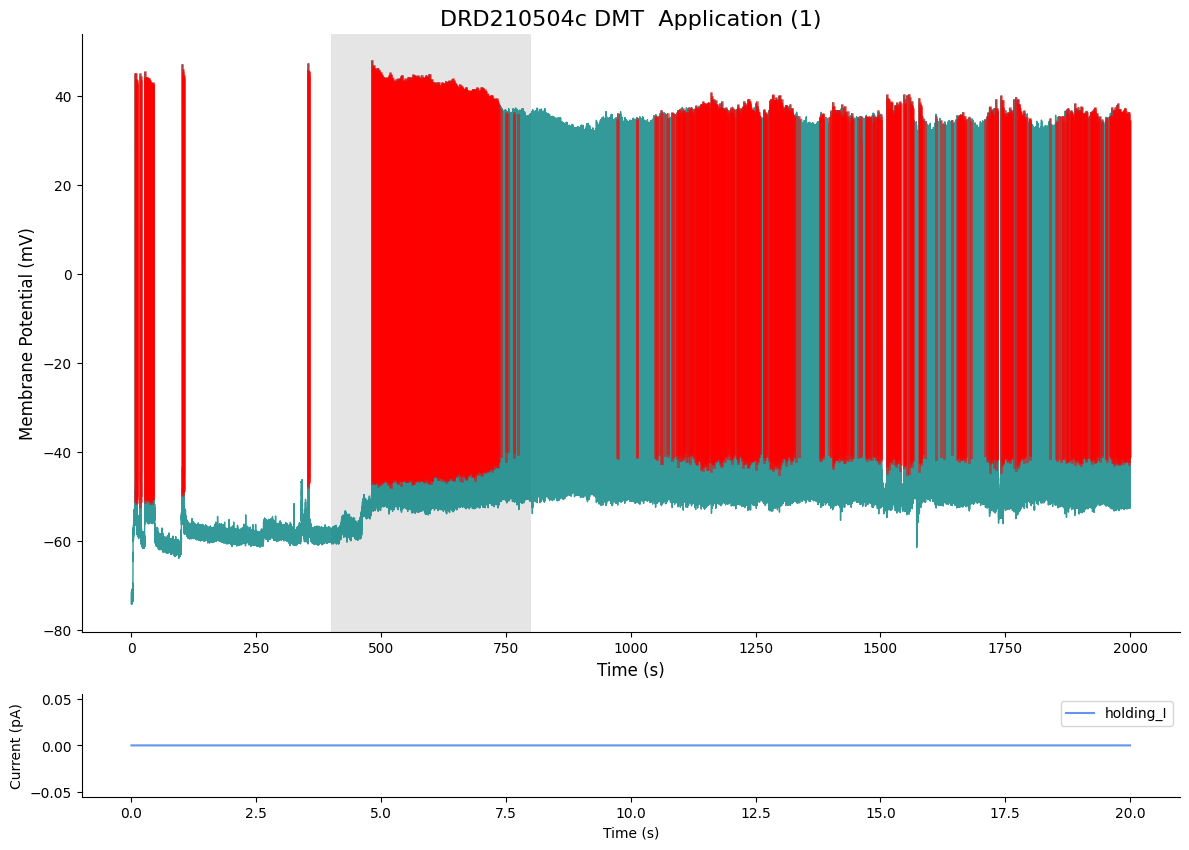

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504c_application_1.png
BUILDING "DRD210504c Application 2 Figure"


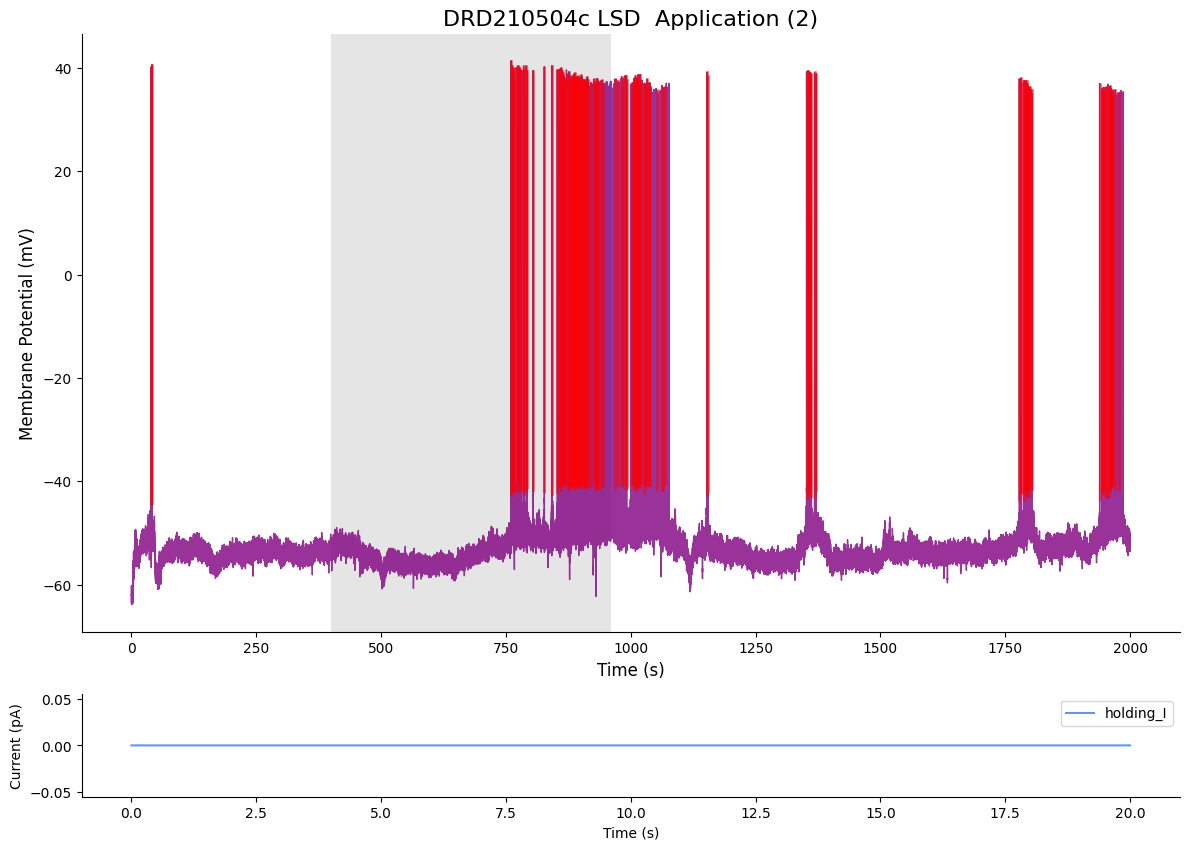

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504c_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210504c_application_2.png
BUILDING "DRD210604a Application 1 Figure"


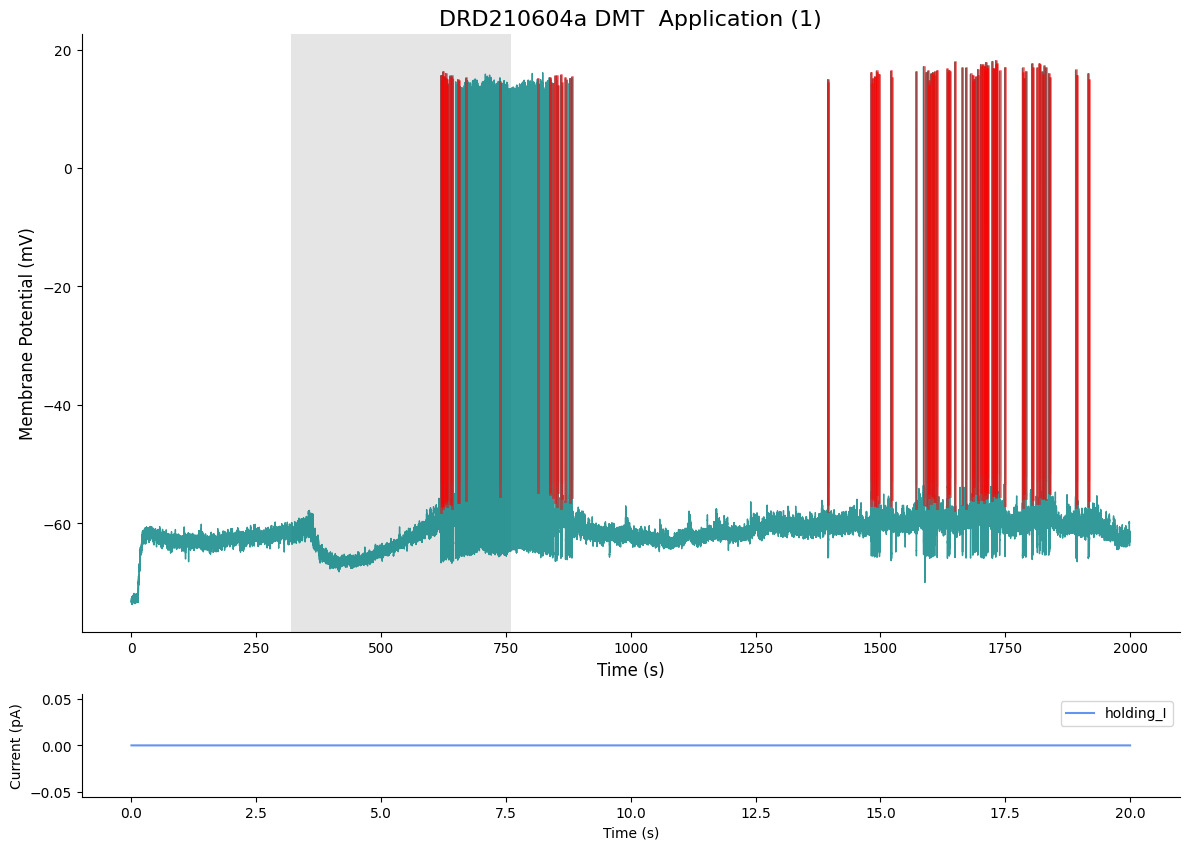

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604a_application_1.png
BUILDING "DRD210604b Application 1 Figure"


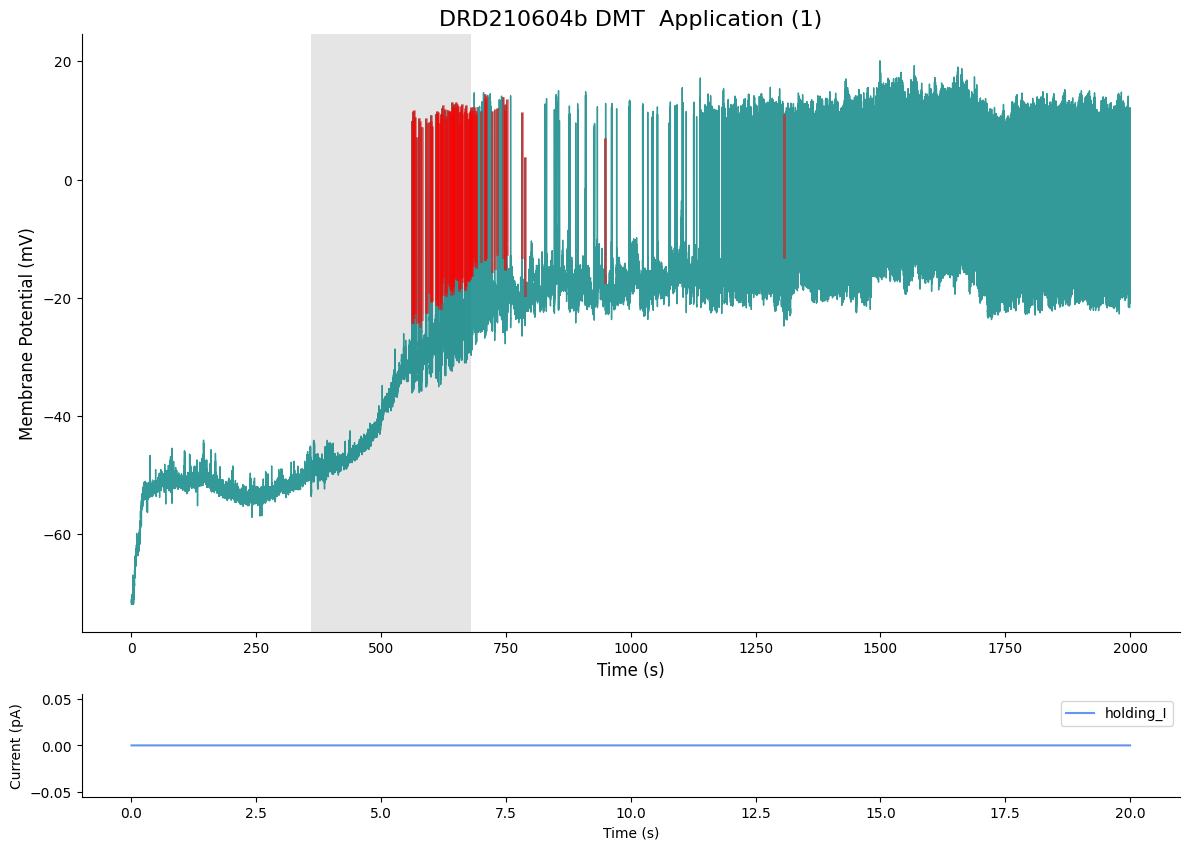

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604b_application_1.png
BUILDING "DRD210604d Application 1 Figure"


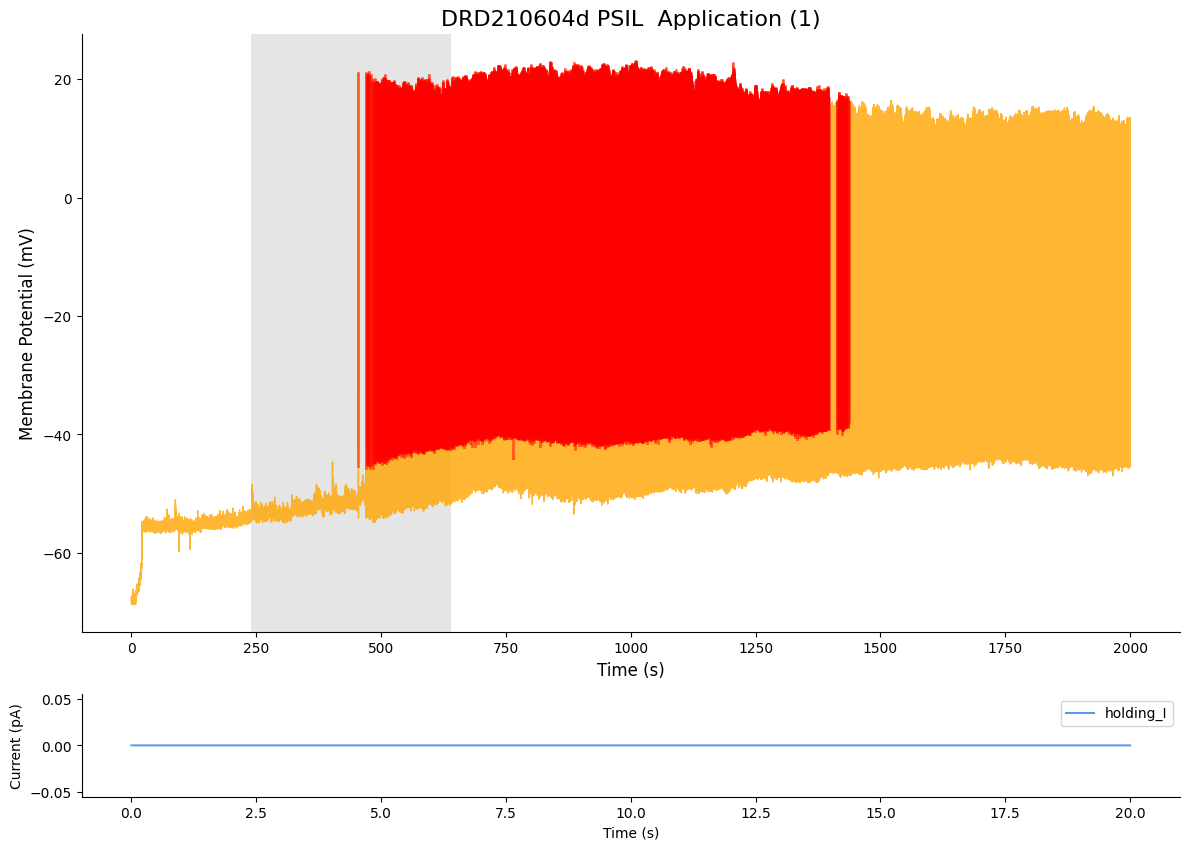

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604d_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210604d_application_1.png
BUILDING "DRD210605a Application 1 Figure"


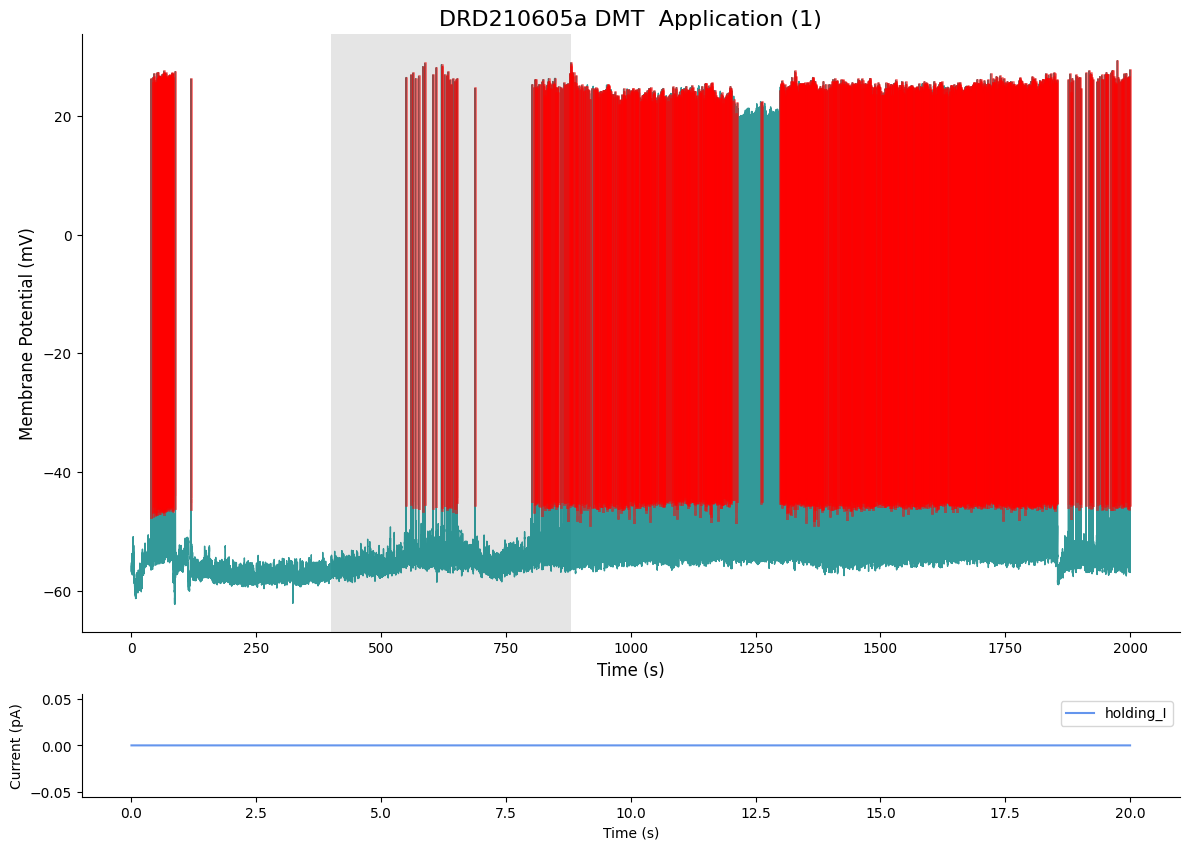

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605a_application_1.png
BUILDING "DRD210605a Application 2 Figure"


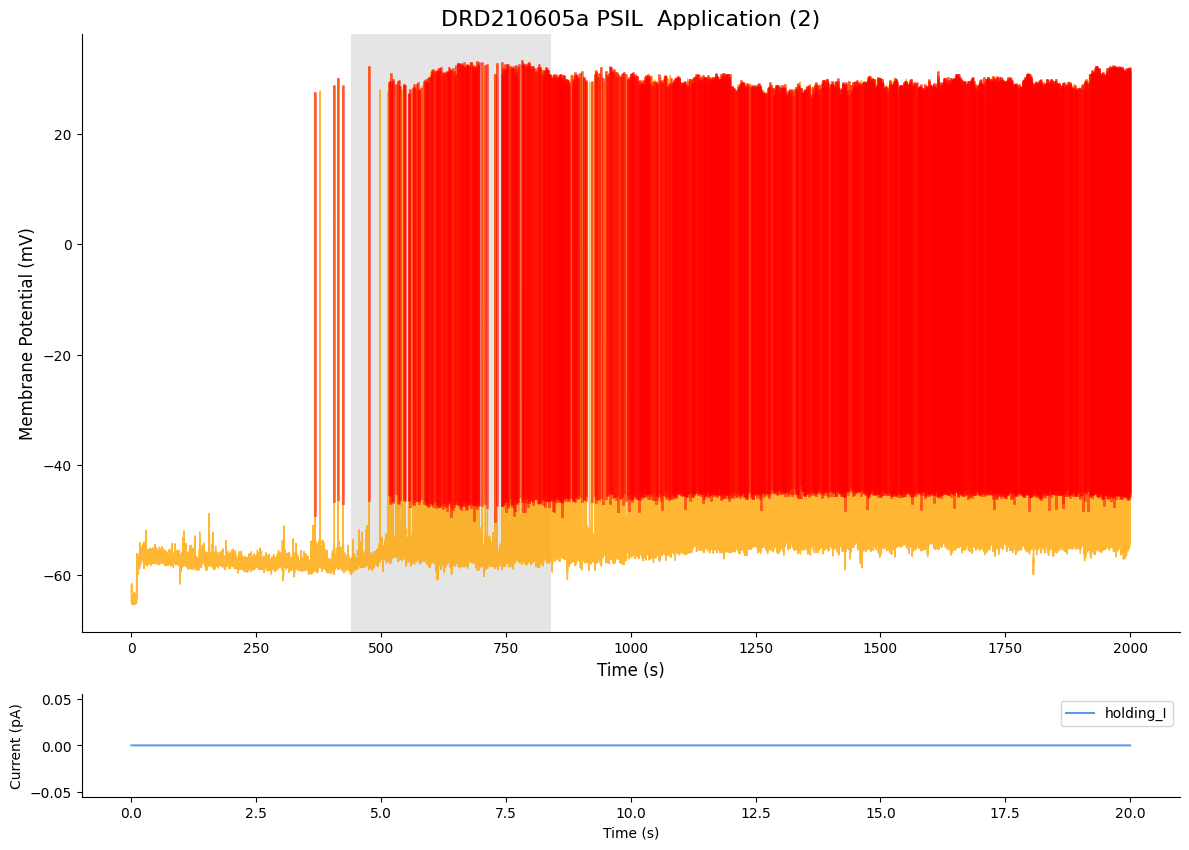

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605a_application_2.png
BUILDING "DRD210605c Application 1 Figure"


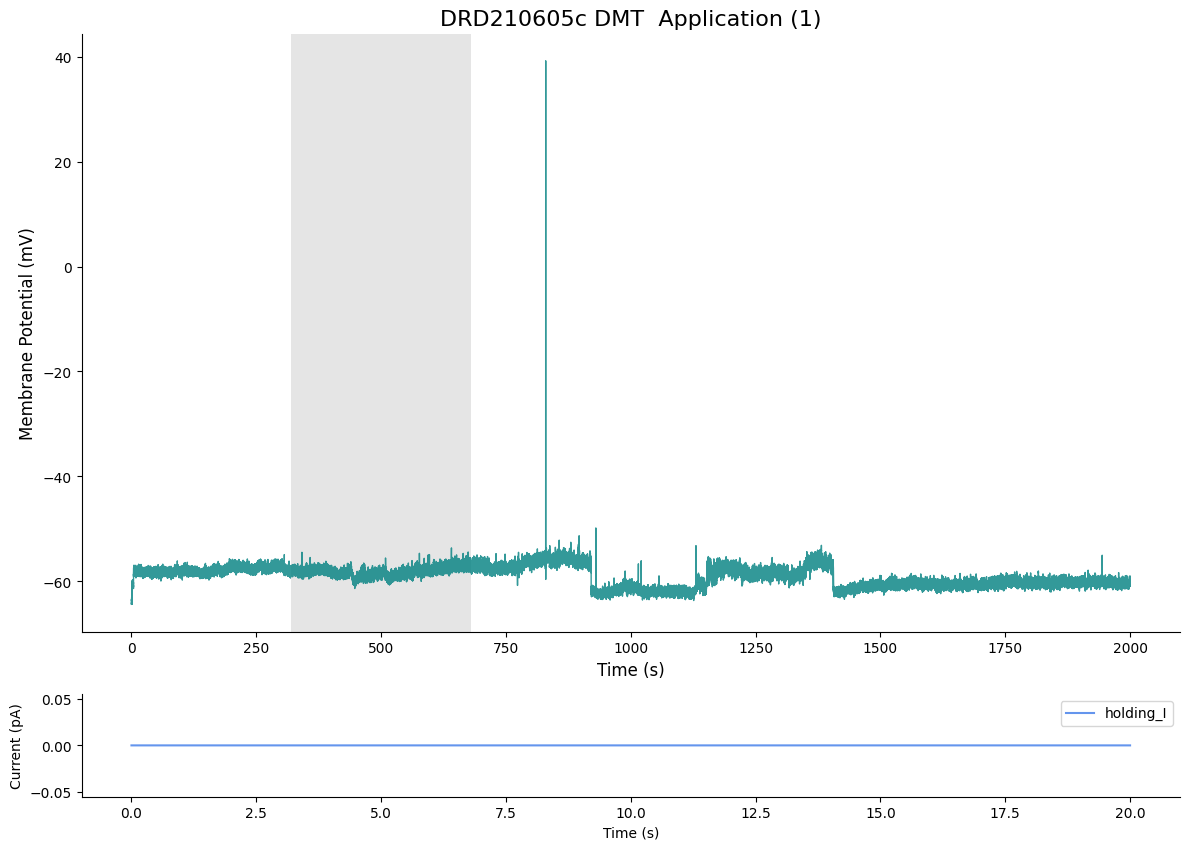

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605c_application_1.png
BUILDING "DRD210605d Application 1 Figure"


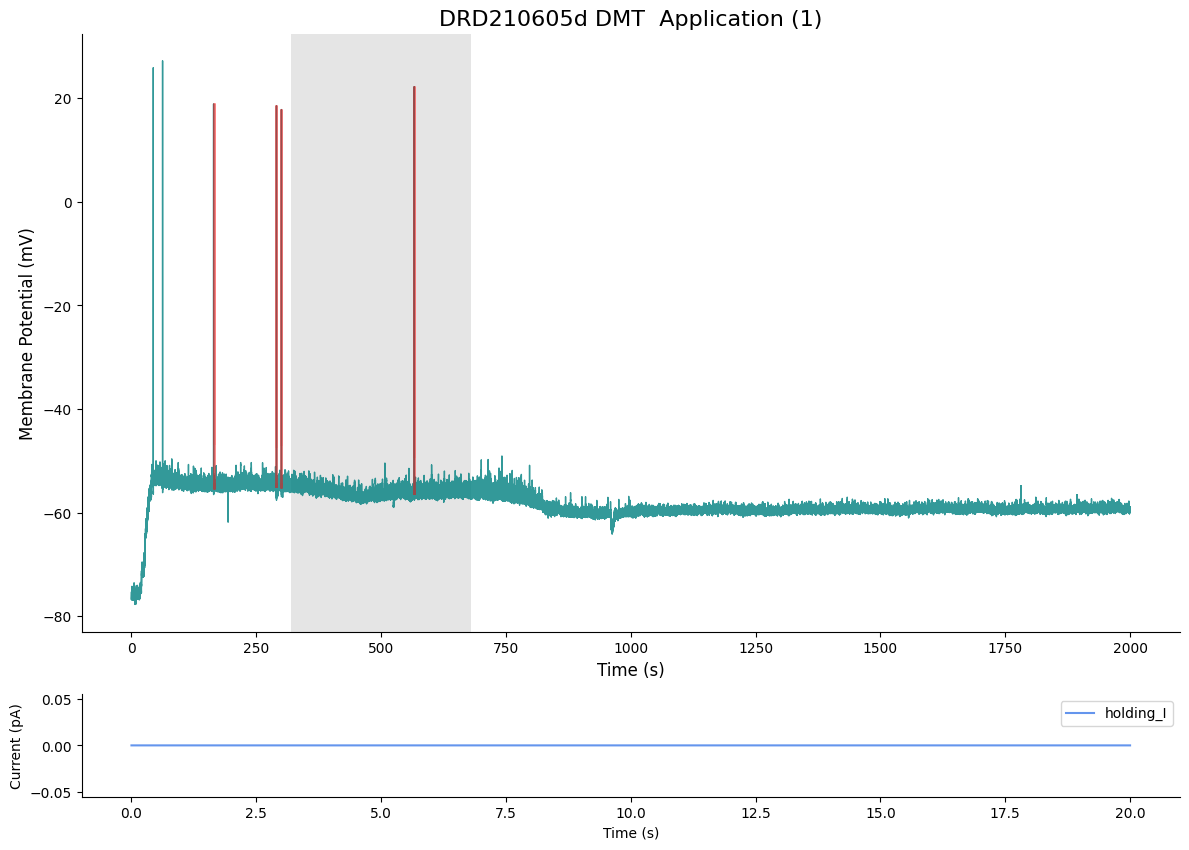

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605d_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605d_application_1.png
BUILDING "DRD210605d Application 2 Figure"


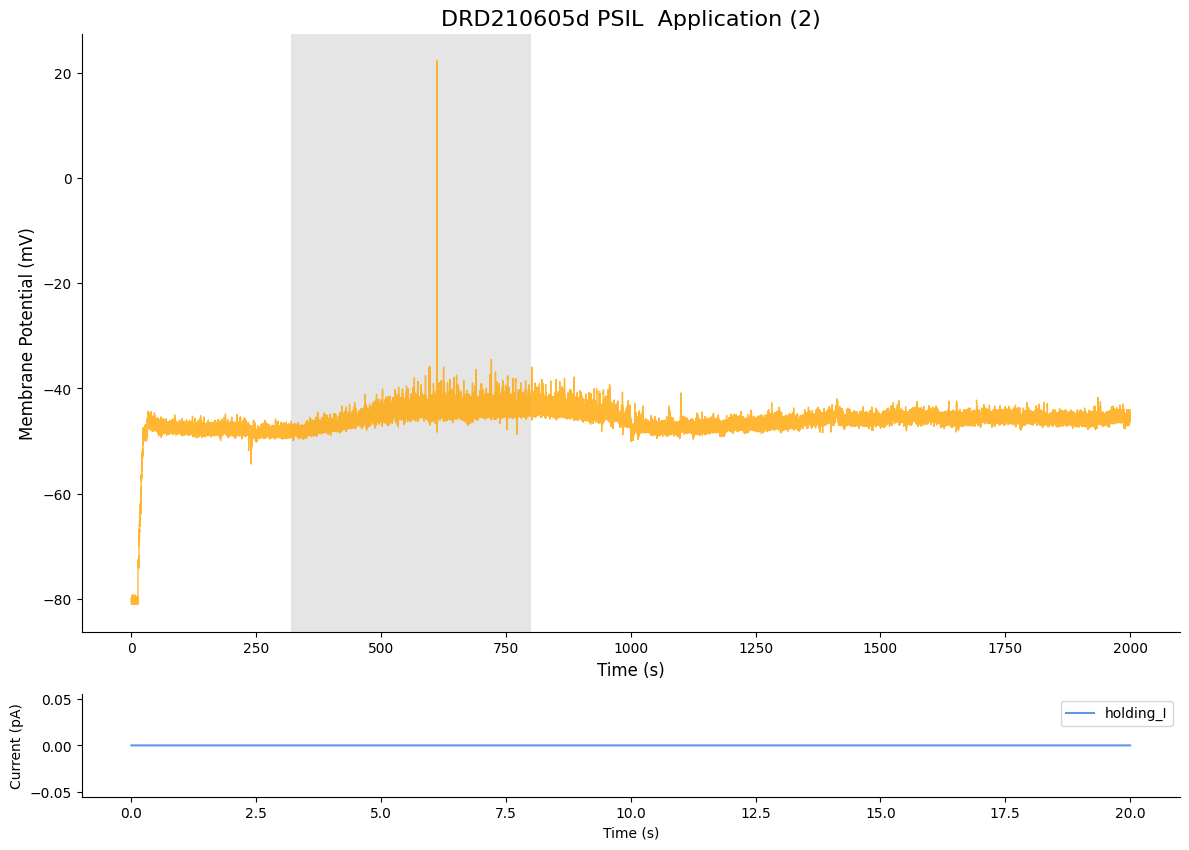

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605d_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD210605d_application_2.png
BUILDING "DRD221219a Application 1 Figure"


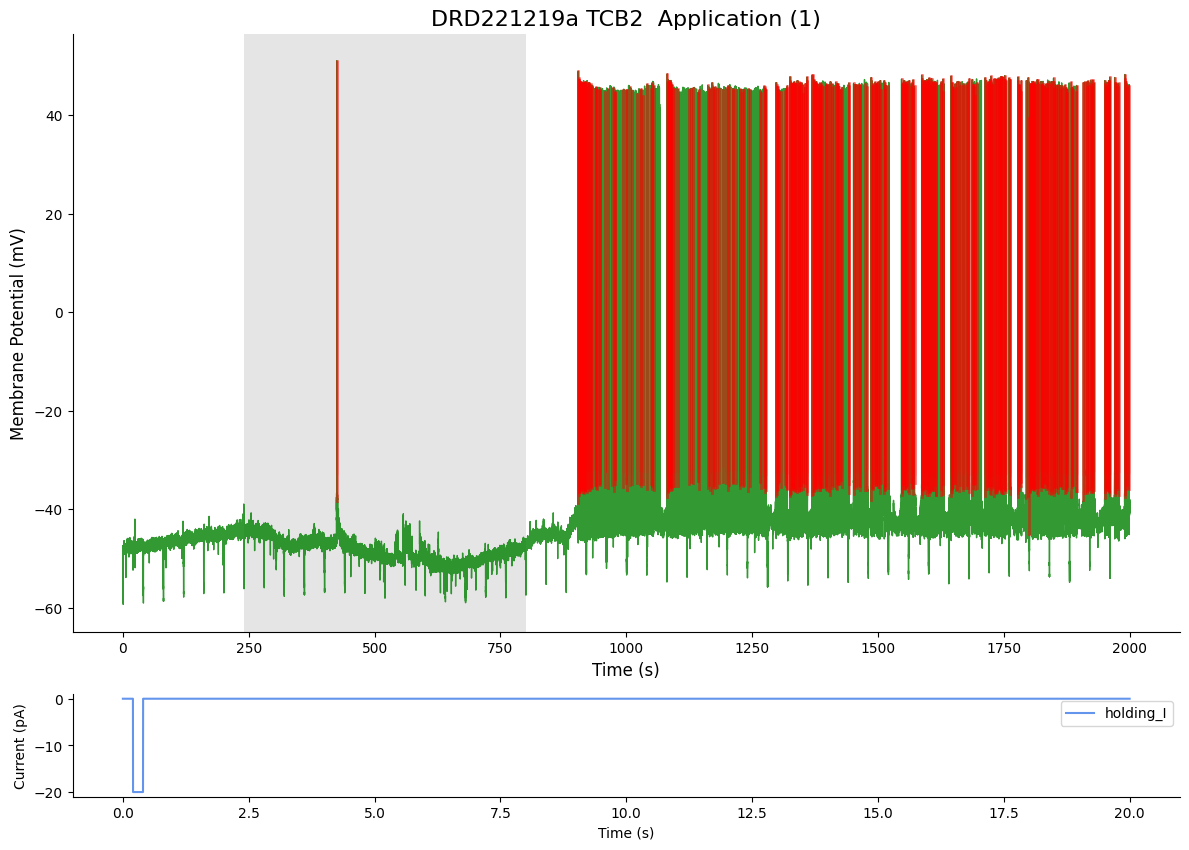

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221219a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221219a_application_1.png
BUILDING "DRD221219b Application 1 Figure"


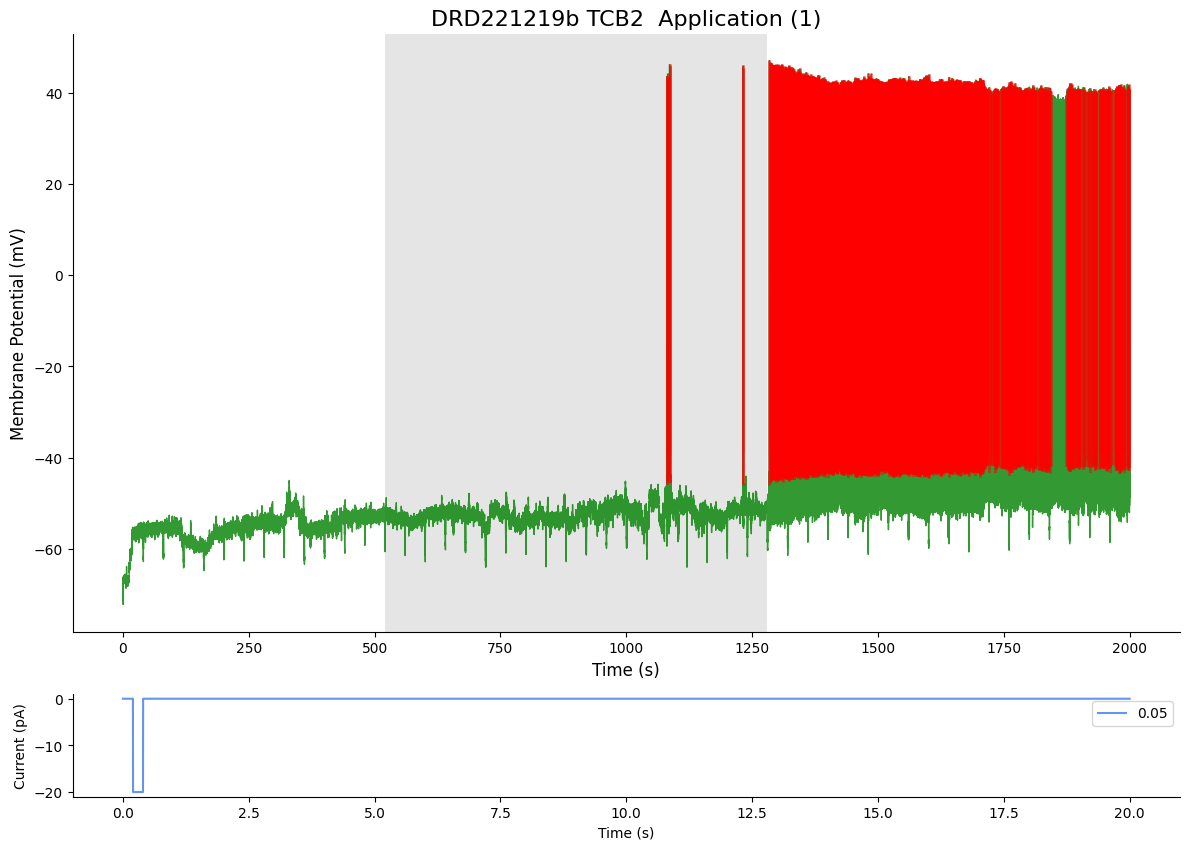

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221219b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221219b_application_1.png
BUILDING "DRD221223a Application 1 Figure"


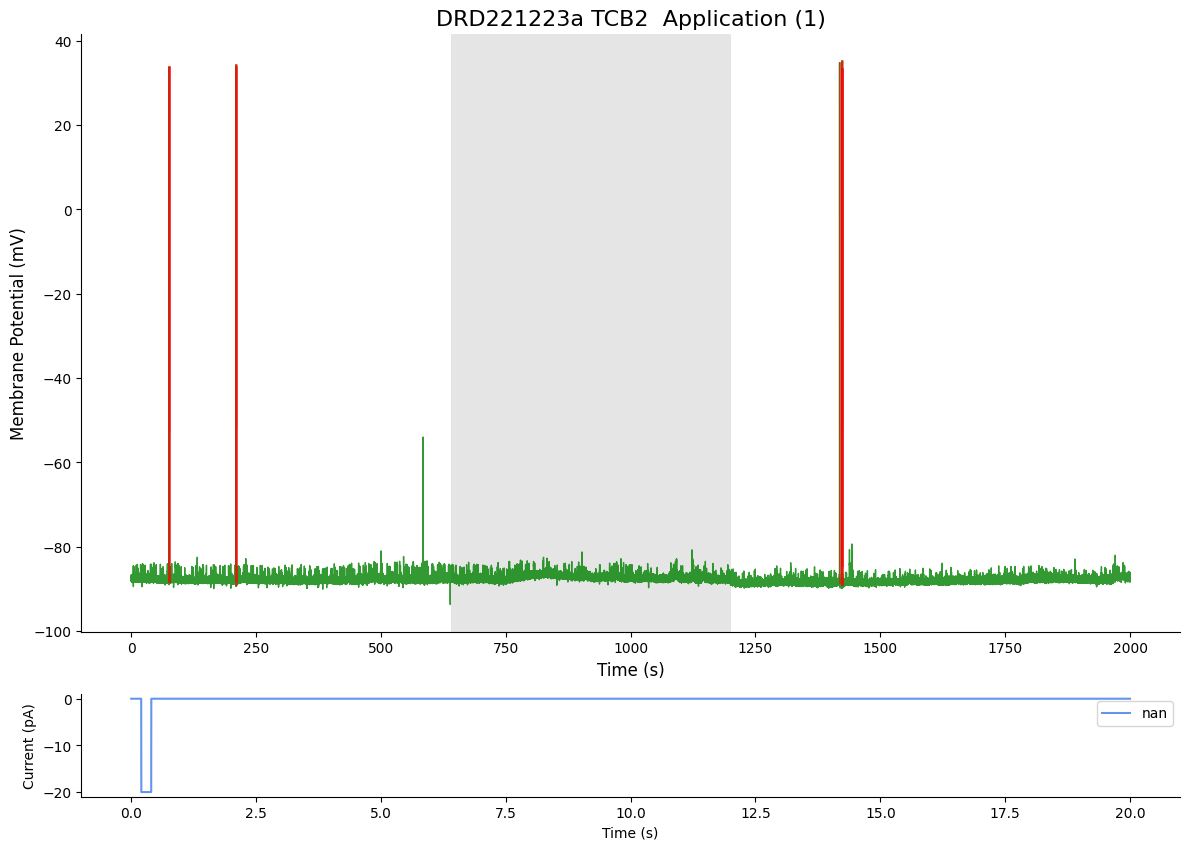

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221223a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD221223a_application_1.png
BUILDING "TLX221229a Application 1 Figure"
no I file found for TLX221229a, I setting used was: 0.2


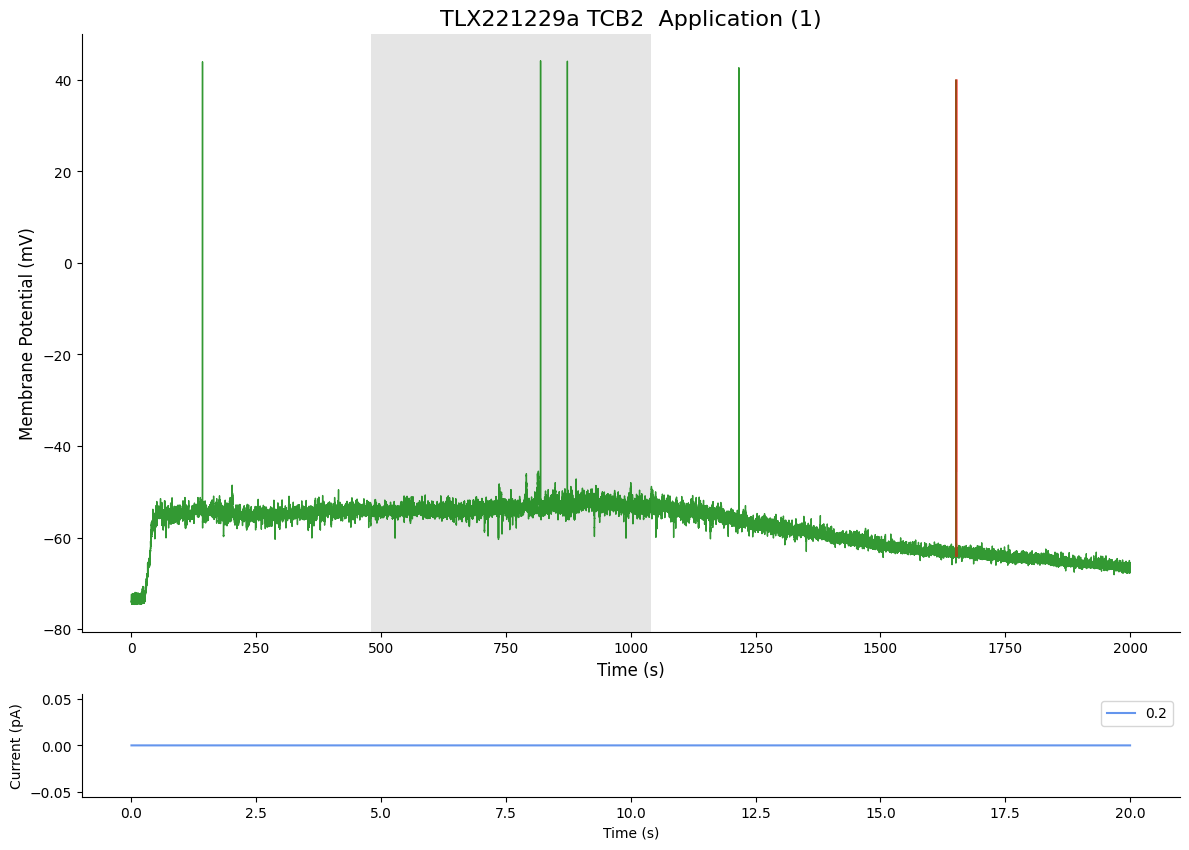

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221229a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221229a_application_1.png
BUILDING "TLX221229a Application 2 Figure"
no I file found for TLX221229a, I setting used was: 0.2


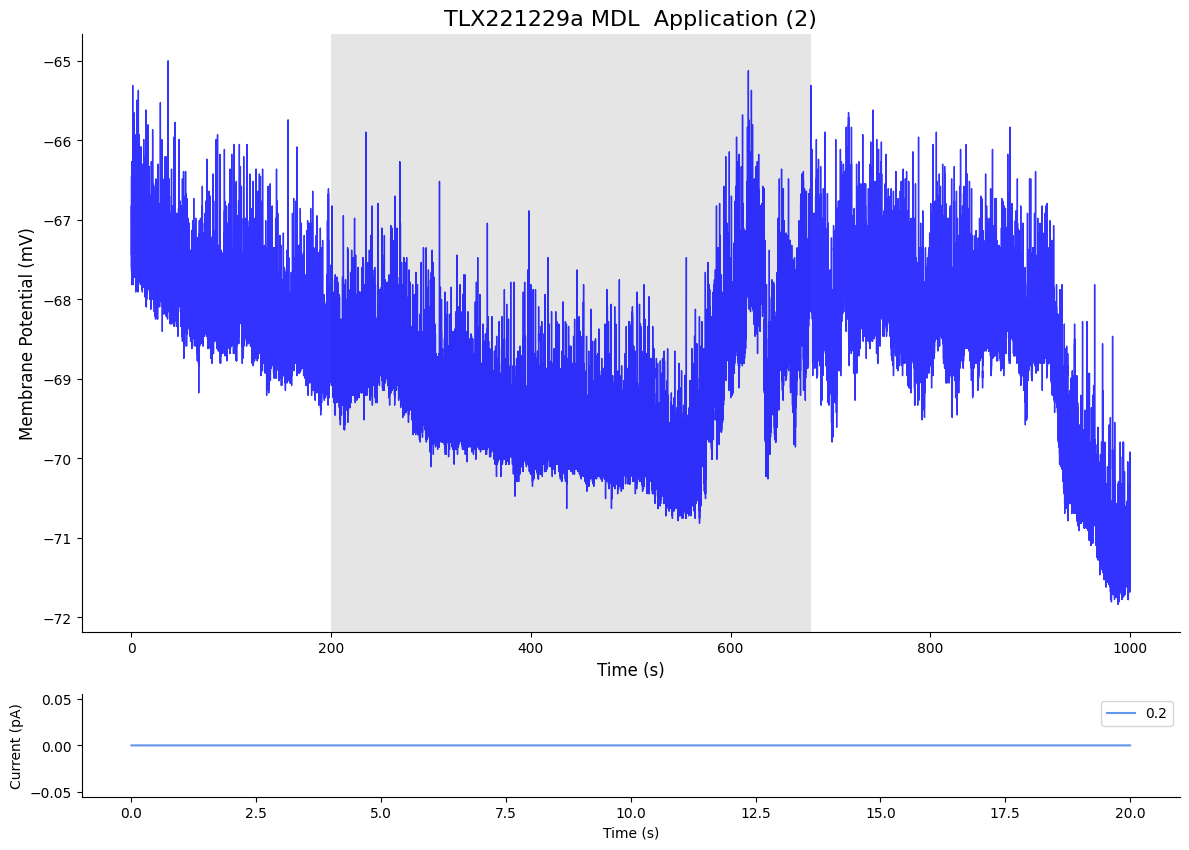

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221229a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221229a_application_2.png
BUILDING "TLX221230a Application 1 Figure"
no I file found for TLX221230a, I setting used was: 0.24


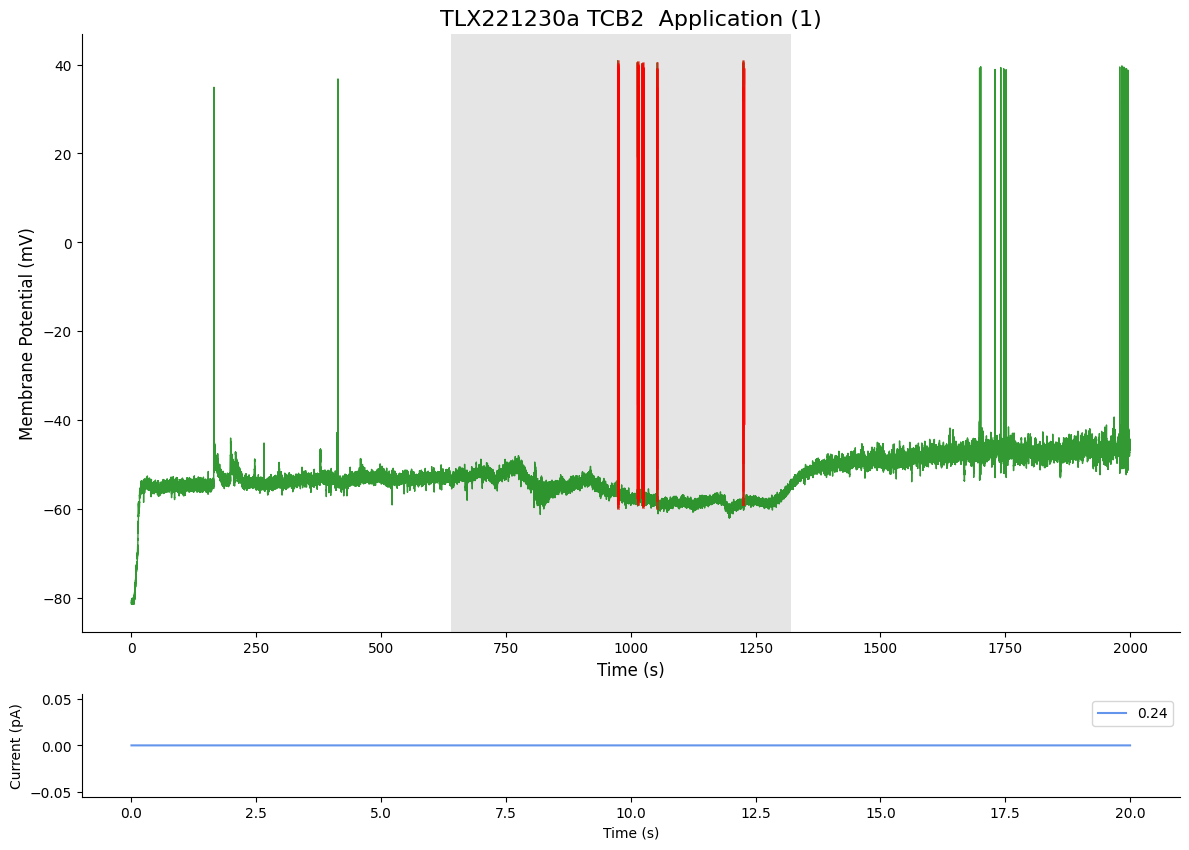

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230a_application_1.png
BUILDING "TLX221230a Application 2 Figure"
no I file found for TLX221230a, I setting used was: 0.24


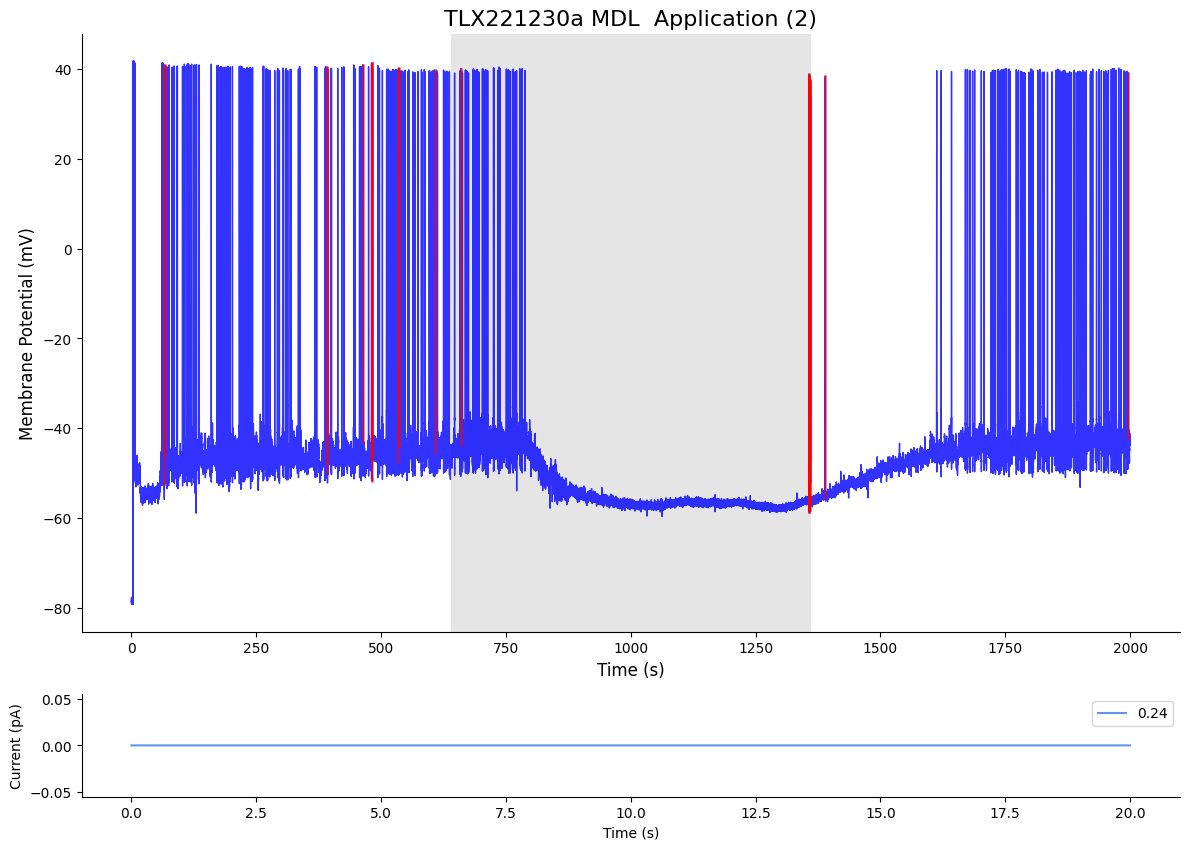

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230a_application_2.png
BUILDING "TLX221230b Application 1 Figure"
no I file found for TLX221230b, I setting used was: 0.2


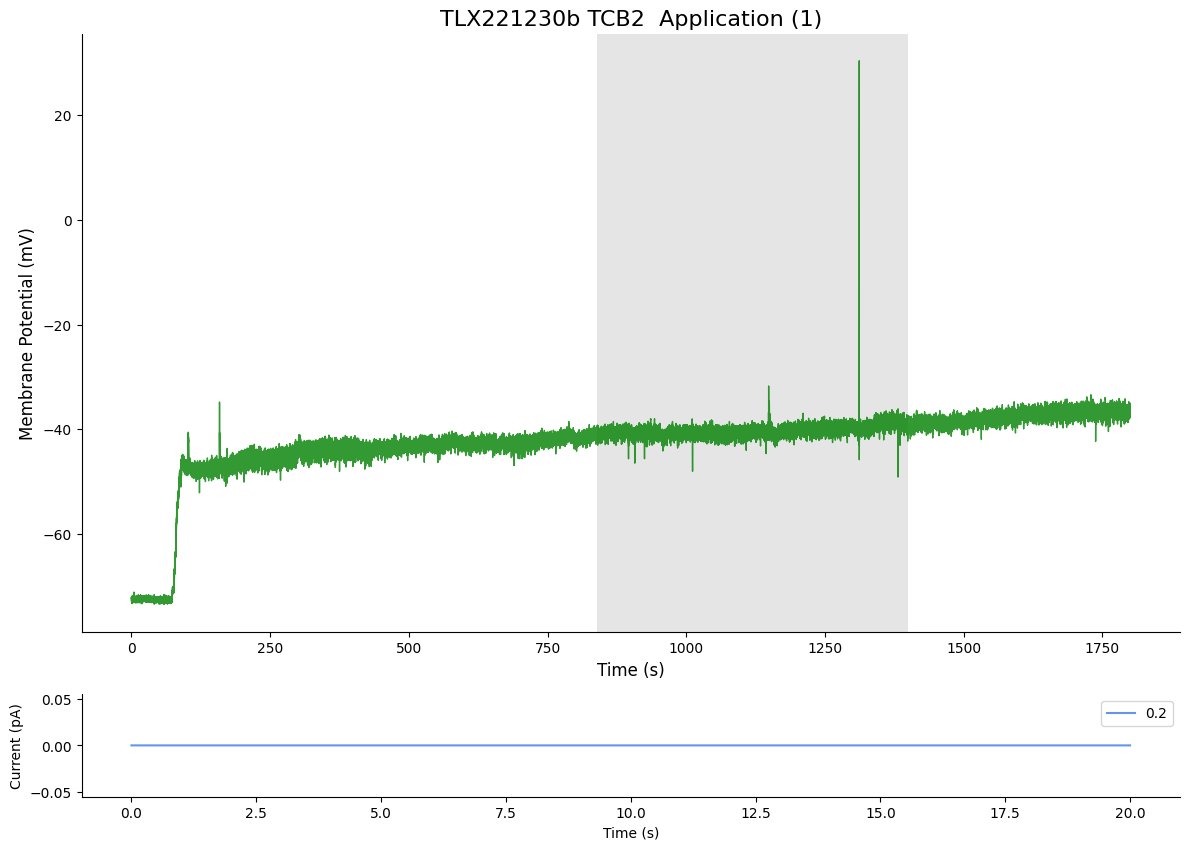

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230b_application_1.png
BUILDING "TLX221230b Application 2 Figure"
no I file found for TLX221230b, I setting used was: 0.2


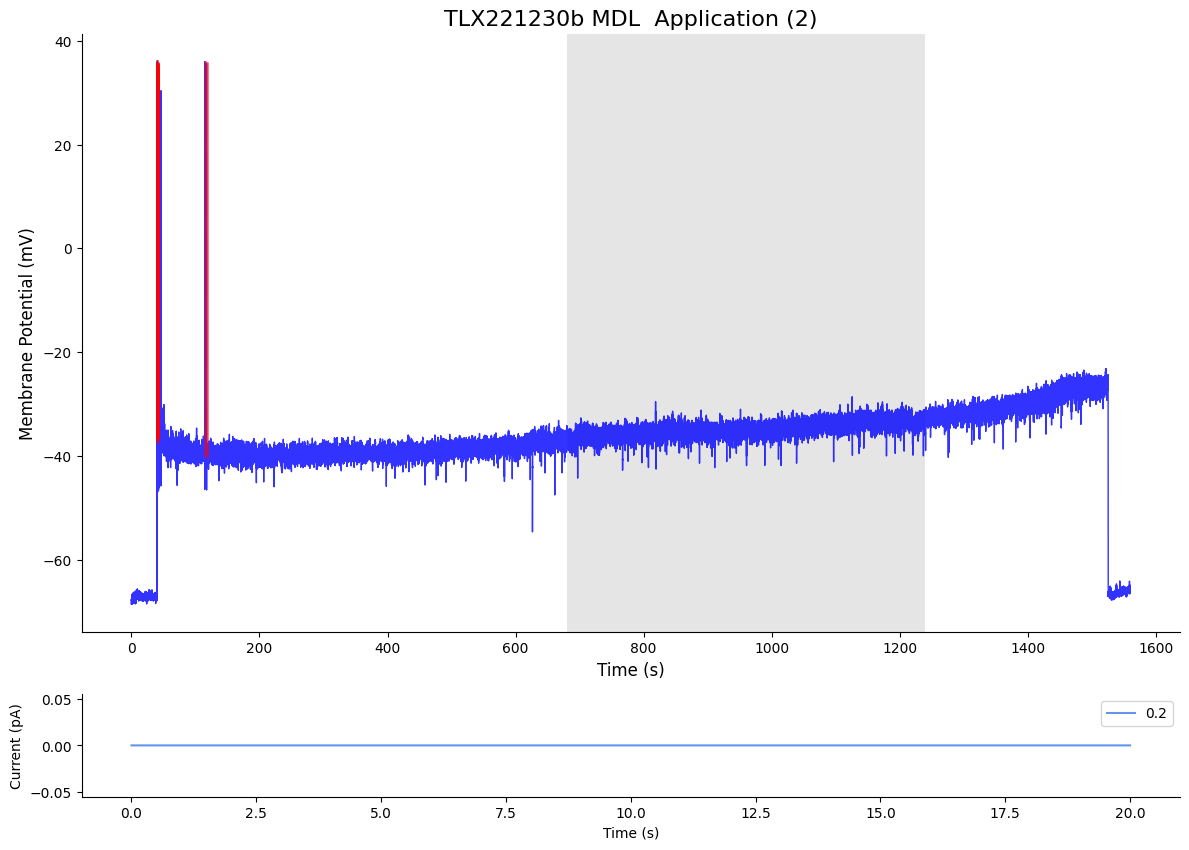

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX221230b_application_2.png
BUILDING "DRD230104a Application 1 Figure"


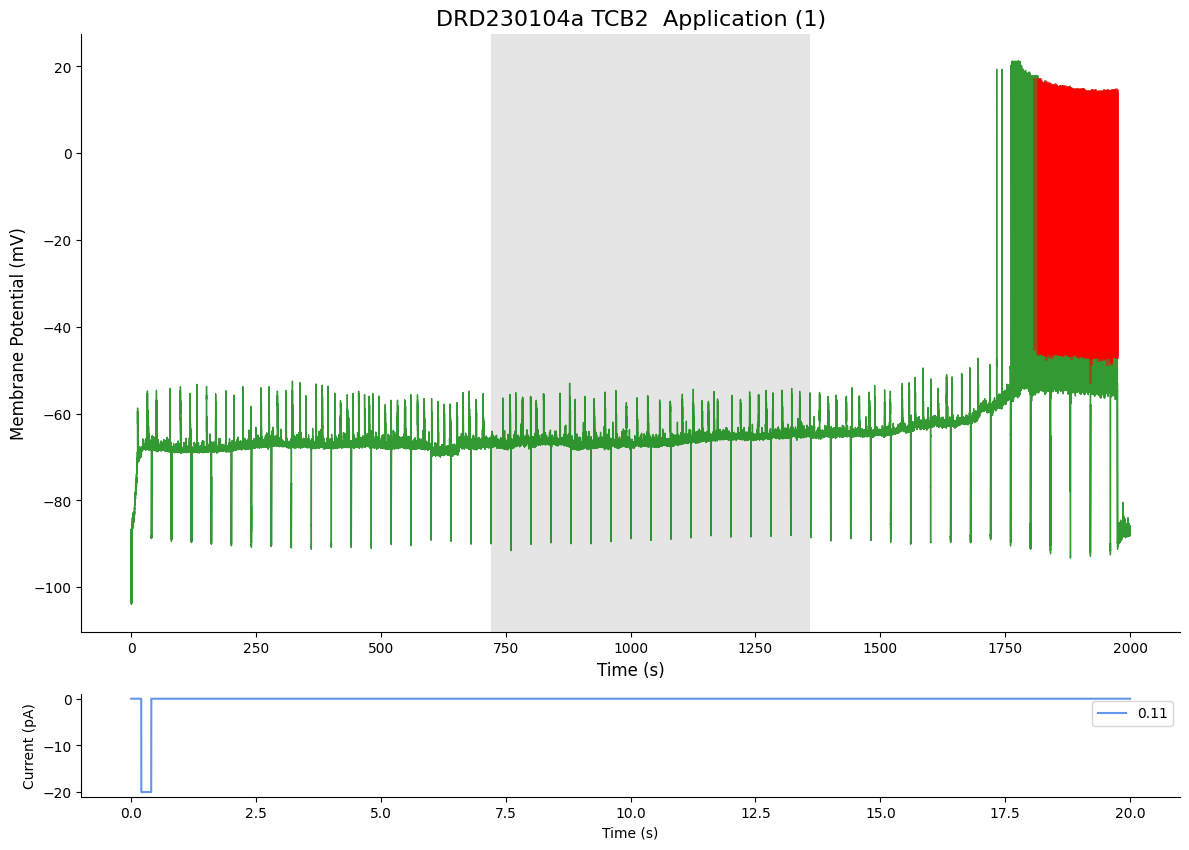

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104a_application_1.png
BUILDING "DRD230104a Application 2 Figure"


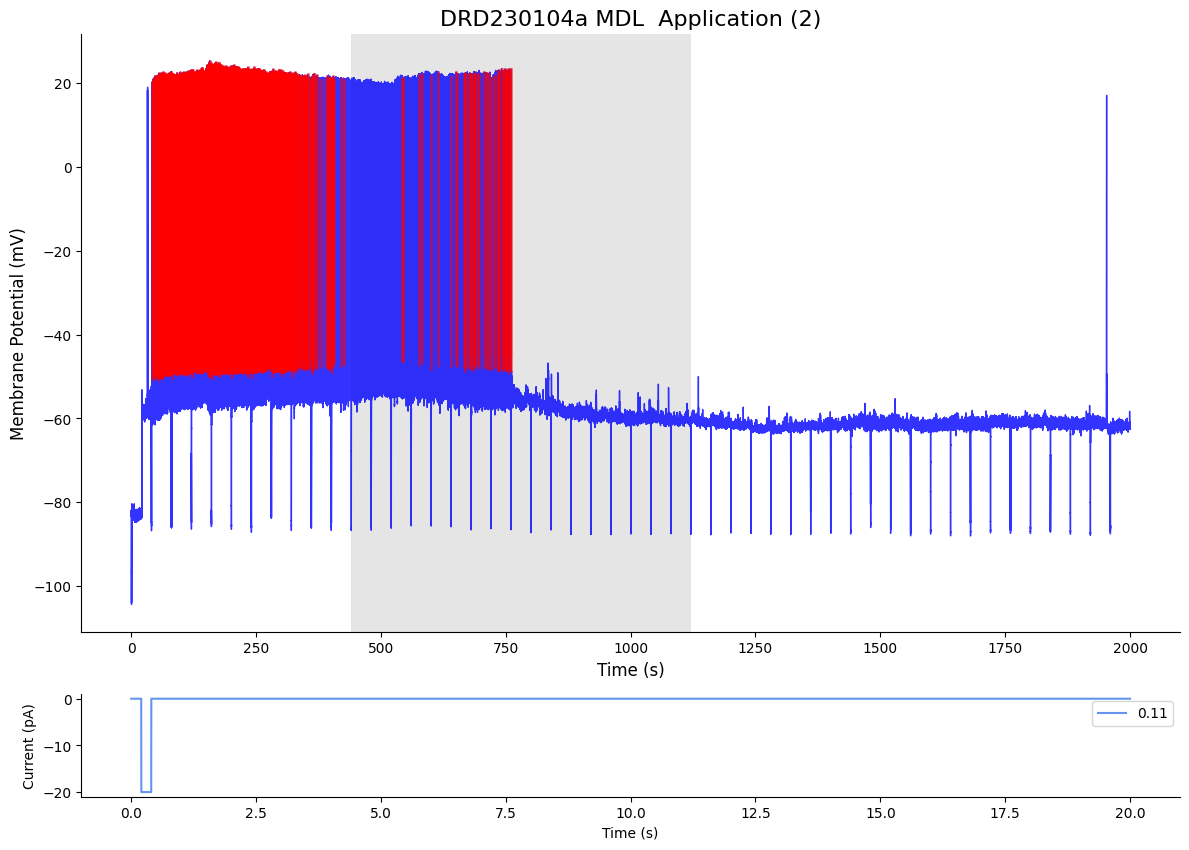

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104a_application_2.png
BUILDING "DRD230104b Application 1 Figure"


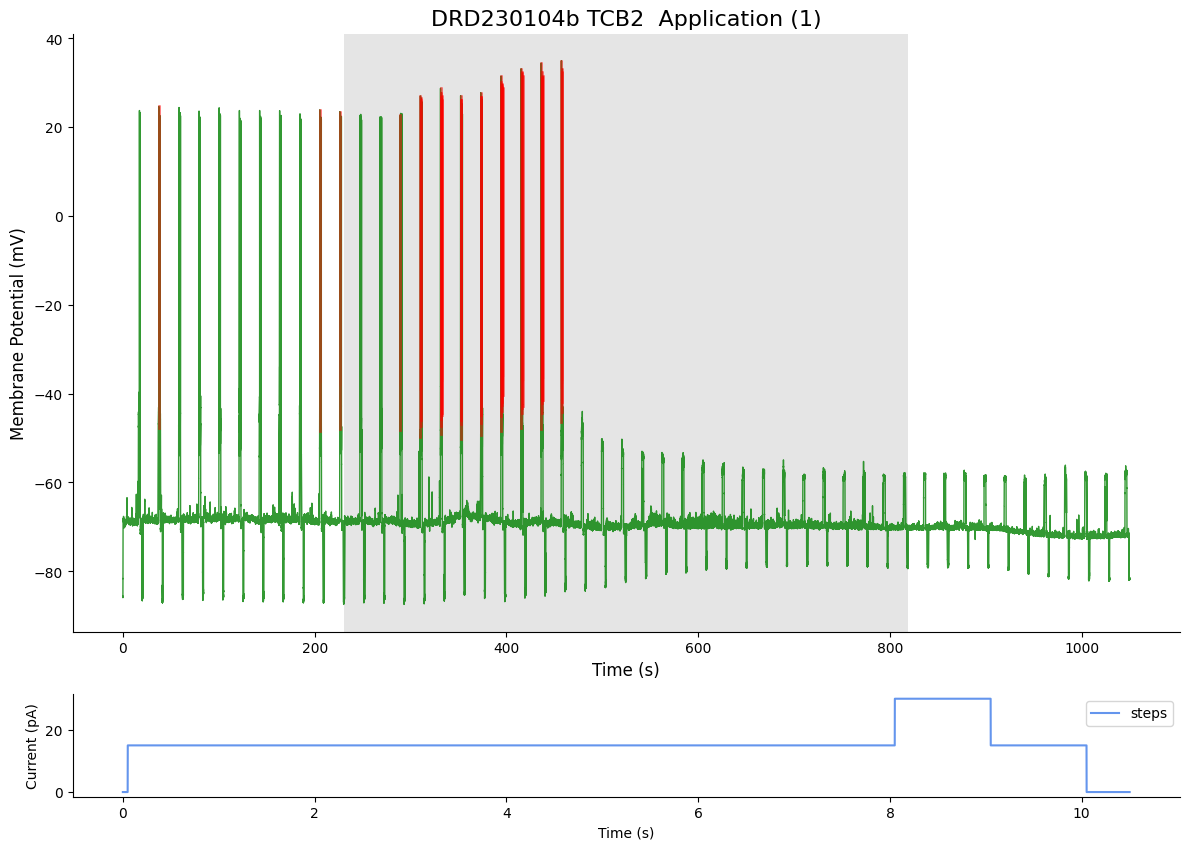

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104b_application_1.png
BUILDING "DRD230104b Application 2 Figure"


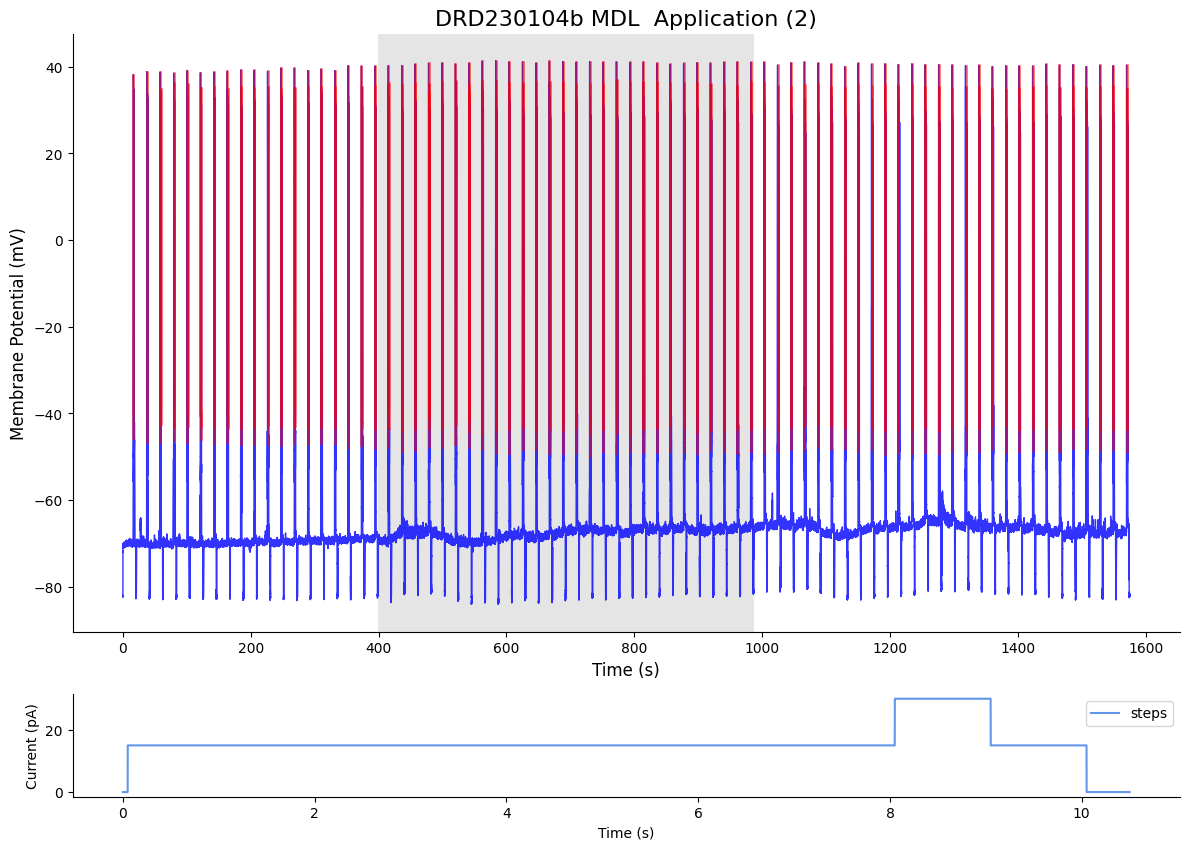

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104b_application_2.png
BUILDING "DRD230104c Application 1 Figure"


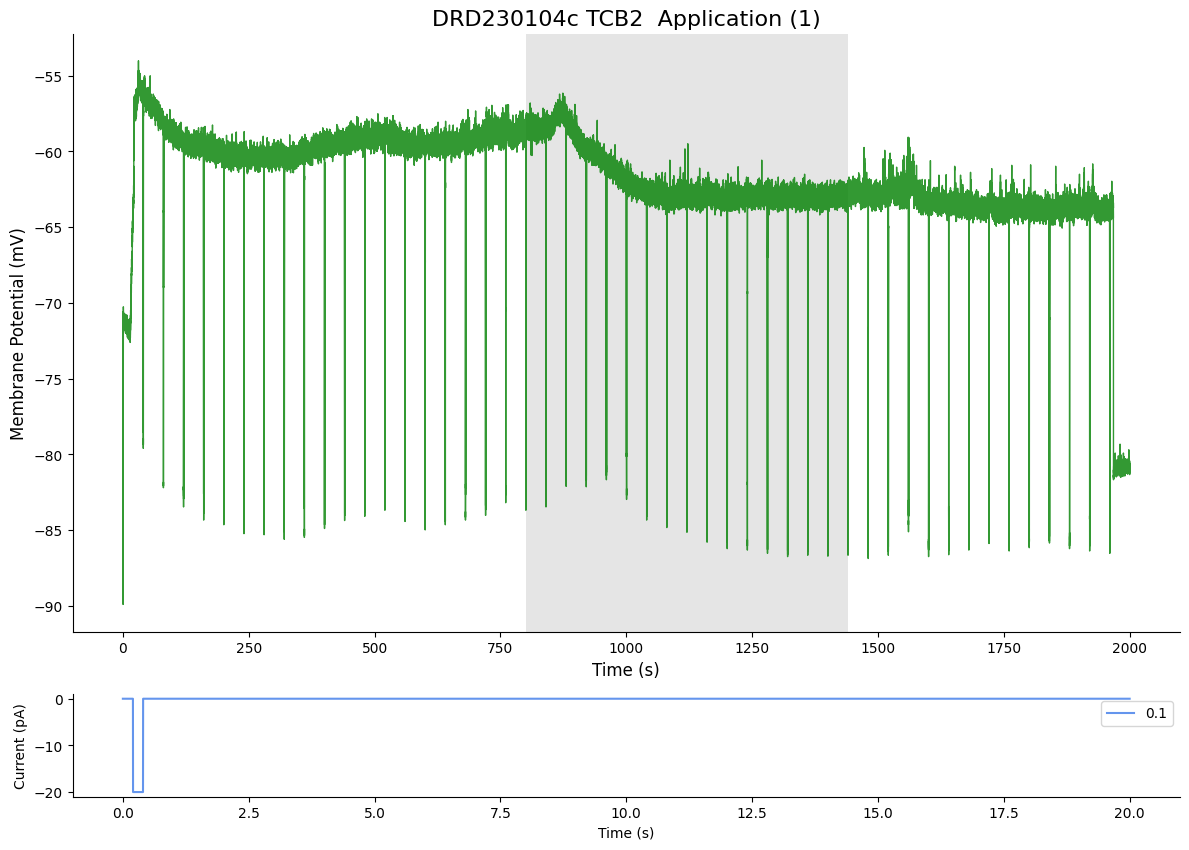

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104c_application_1.png
BUILDING "DRD230104c Application 2 Figure"


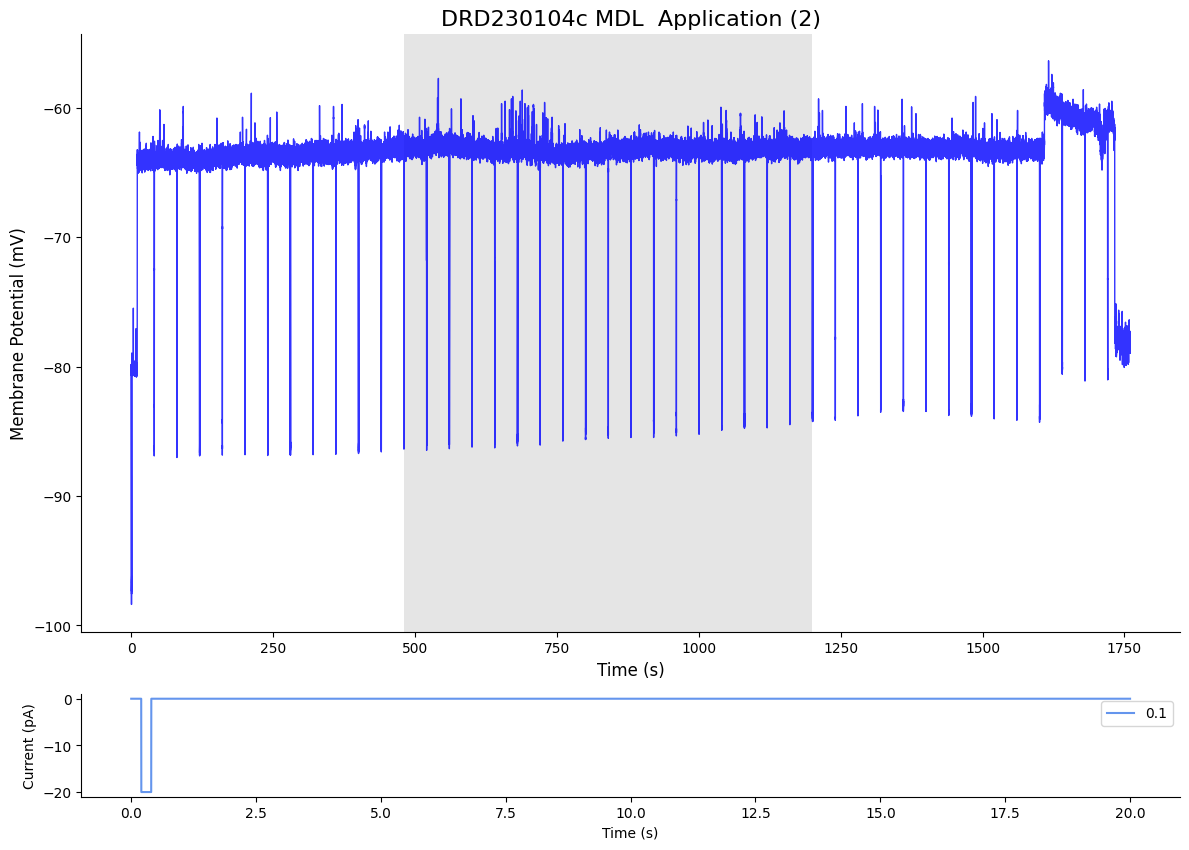

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104c_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230104c_application_2.png
BUILDING "DRD230108a Application 1 Figure"


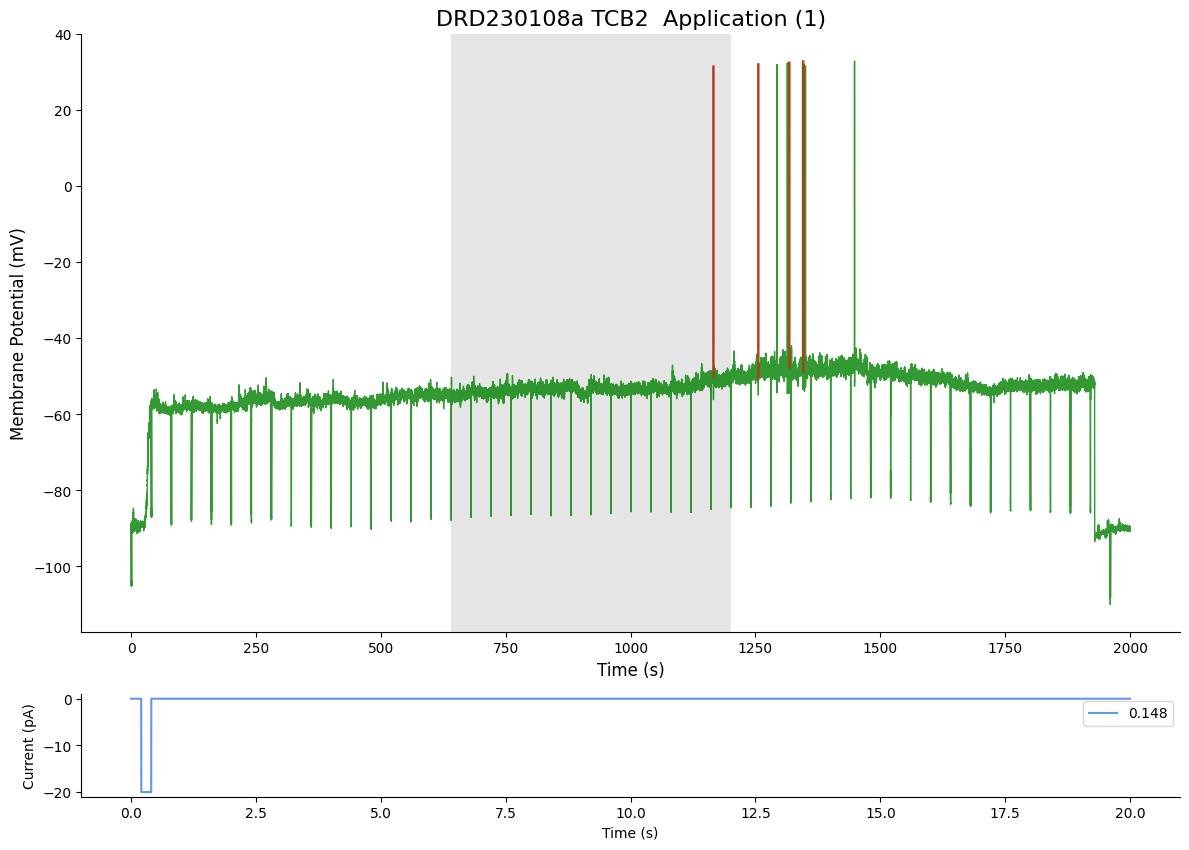

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108a_application_1.png
BUILDING "DRD230108a Application 2 Figure"


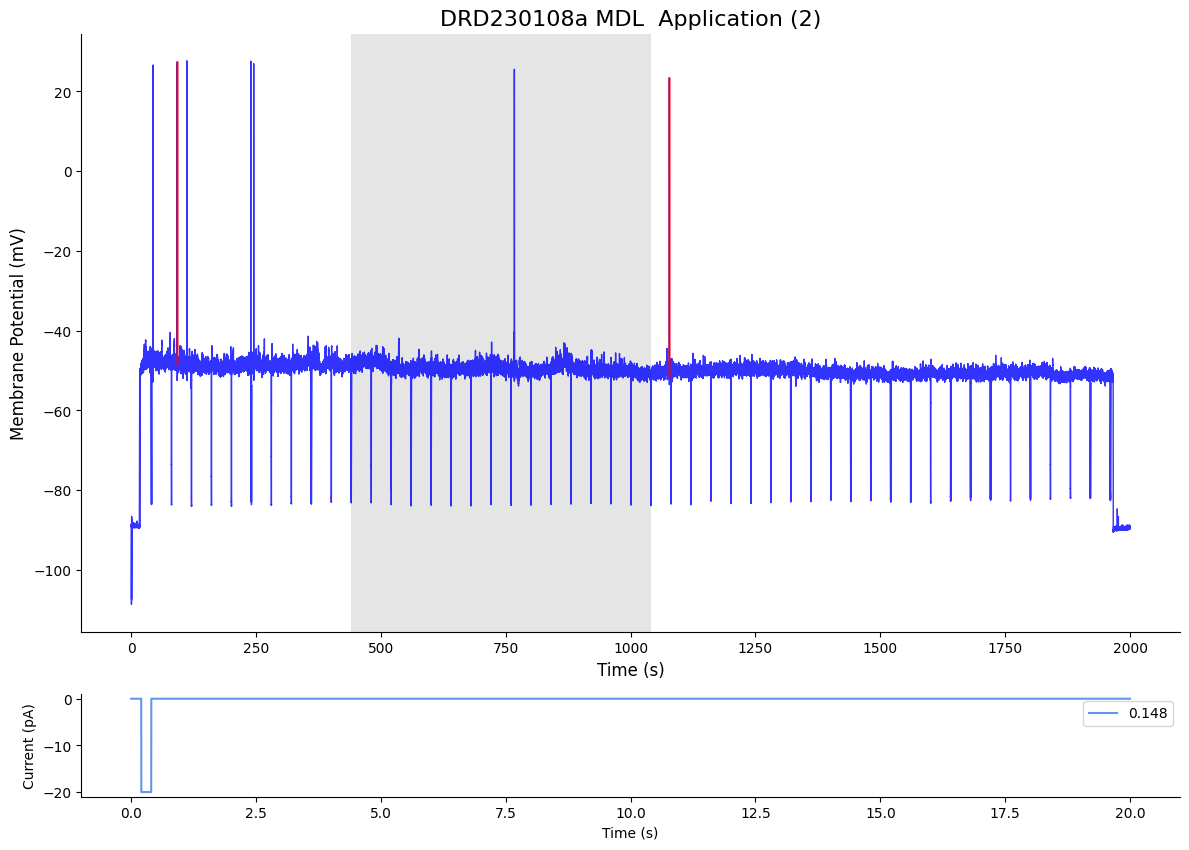

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108a_application_2.png
BUILDING "DRD230108b Application 1 Figure"


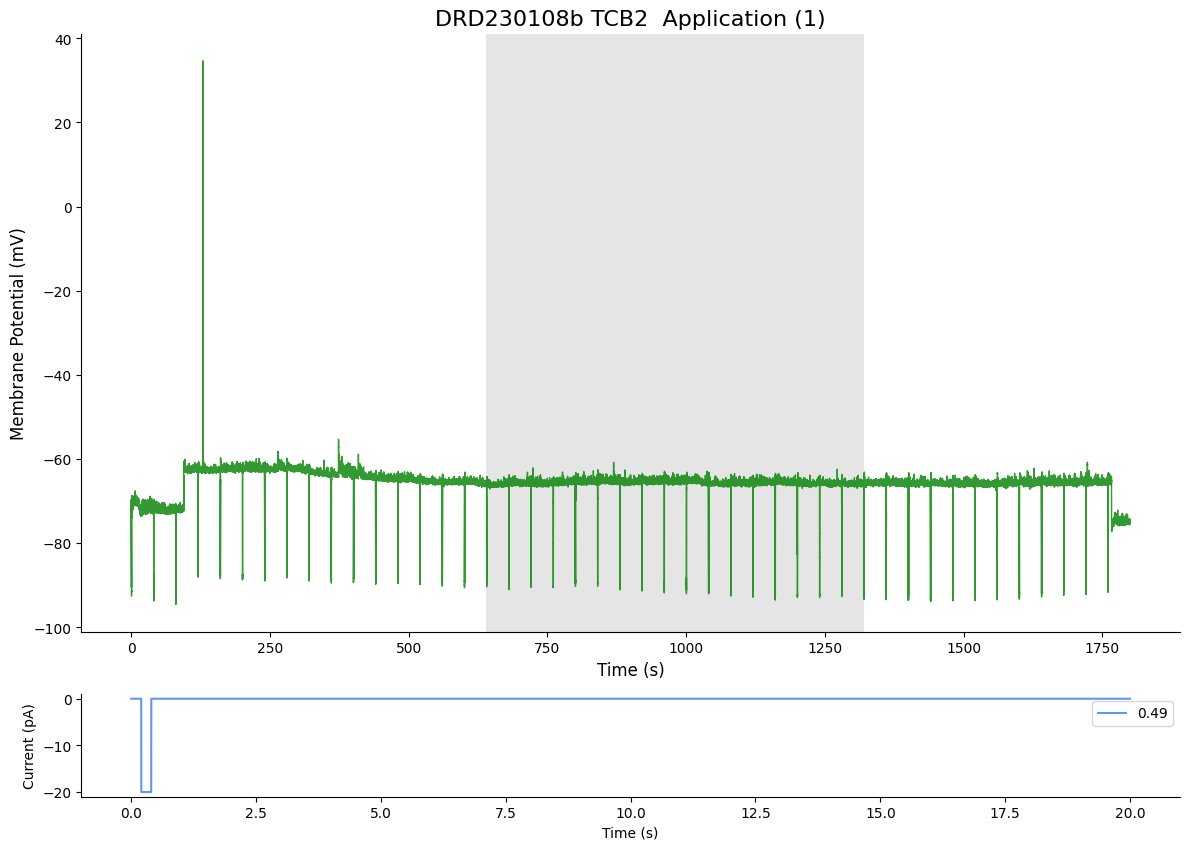

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108b_application_1.png
BUILDING "DRD230108b Application 2 Figure"


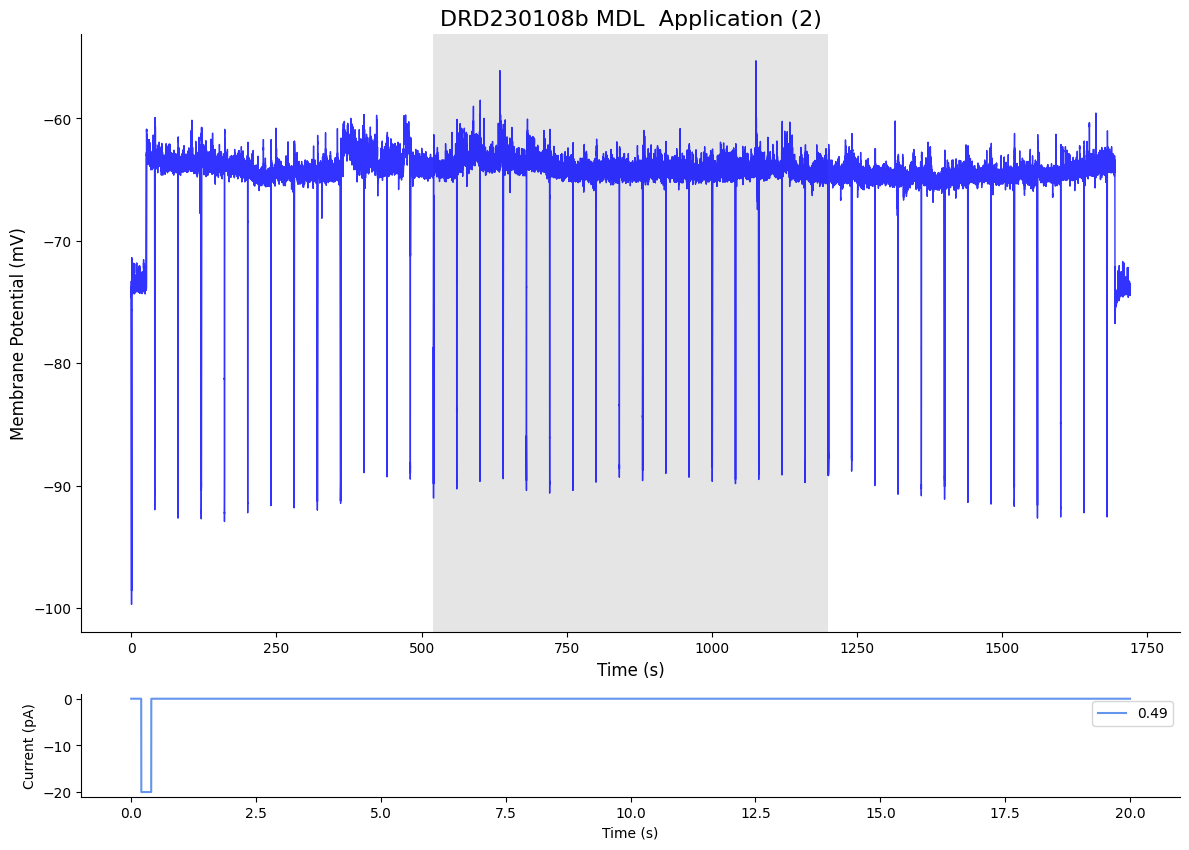

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108b_application_2.png
BUILDING "DRD230108c Application 1 Figure"


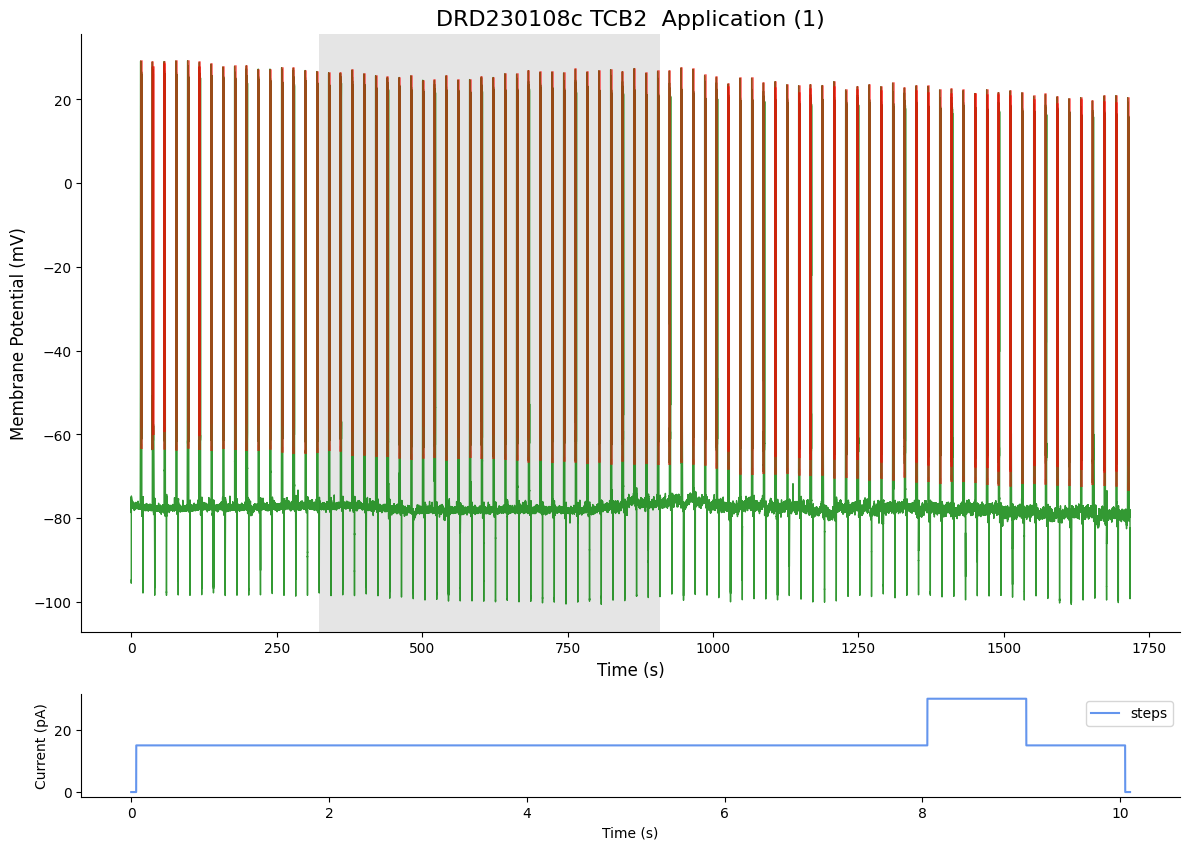

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108c_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108c_application_1.png
BUILDING "DRD230108c Application 2 Figure"


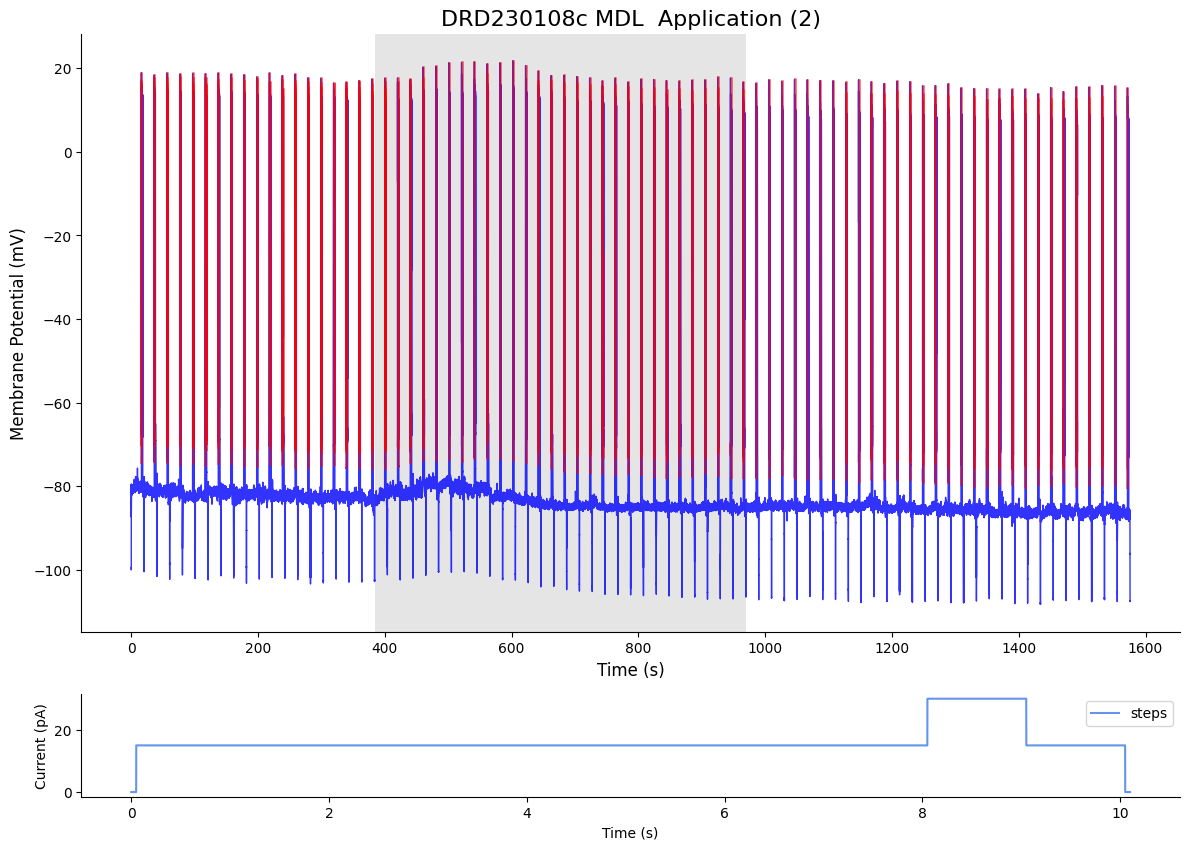

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108c_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230108c_application_2.png
BUILDING "DRD230110a Application 1 Figure"


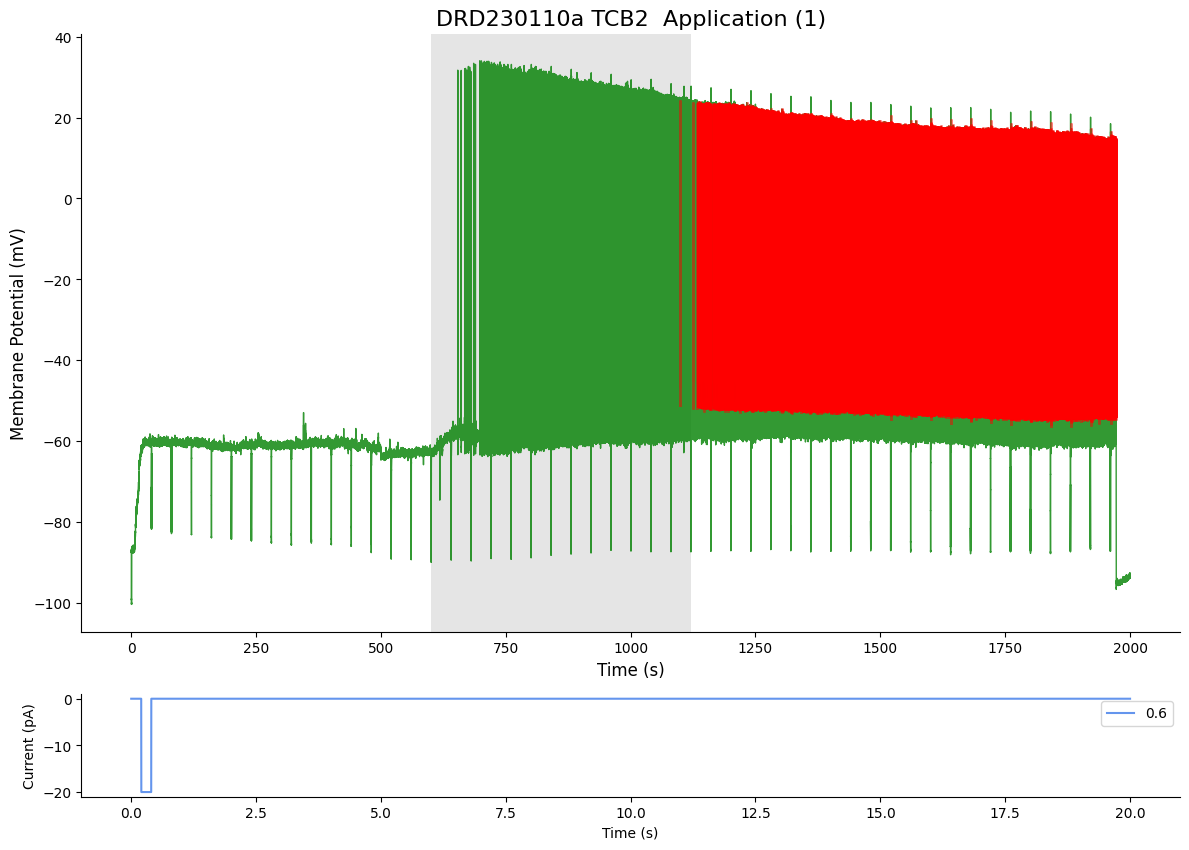

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110a_application_1.png
BUILDING "DRD230110a Application 2 Figure"


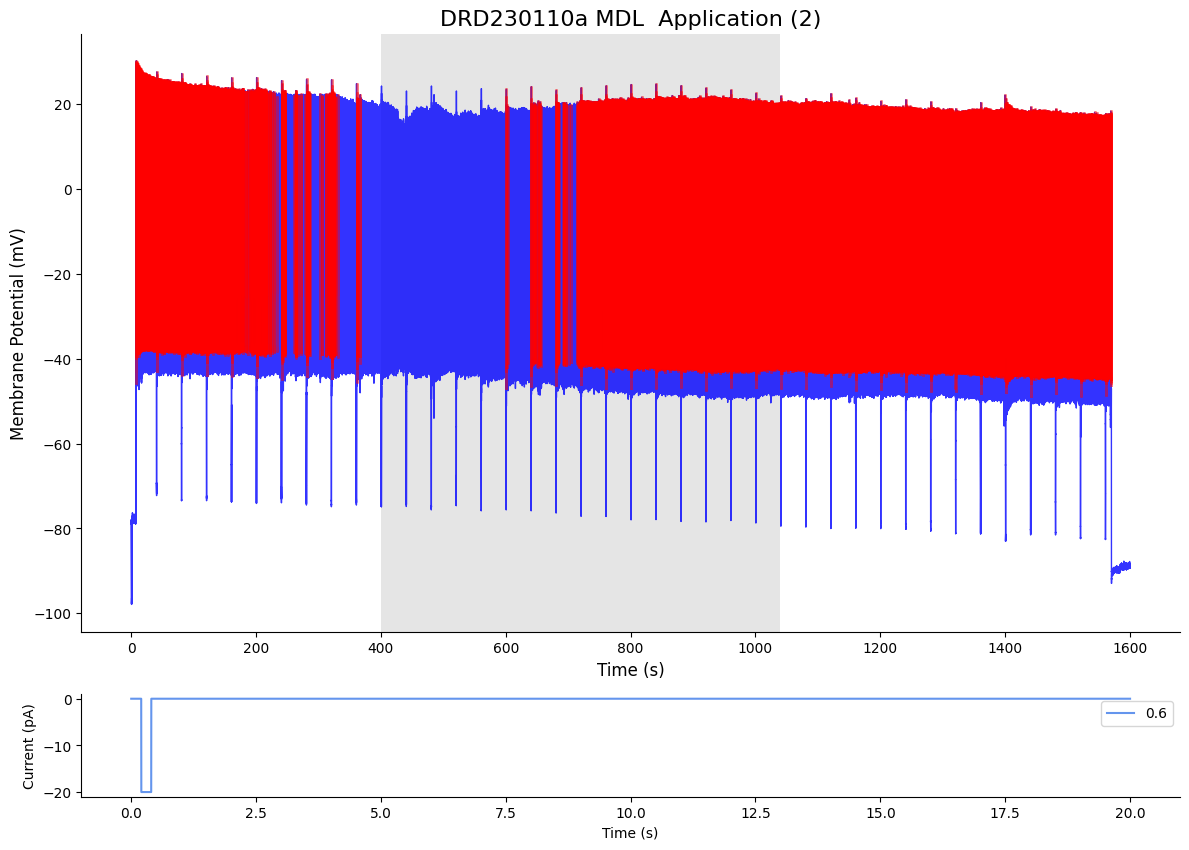

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110a_application_2.png
BUILDING "DRD230110b Application 1 Figure"


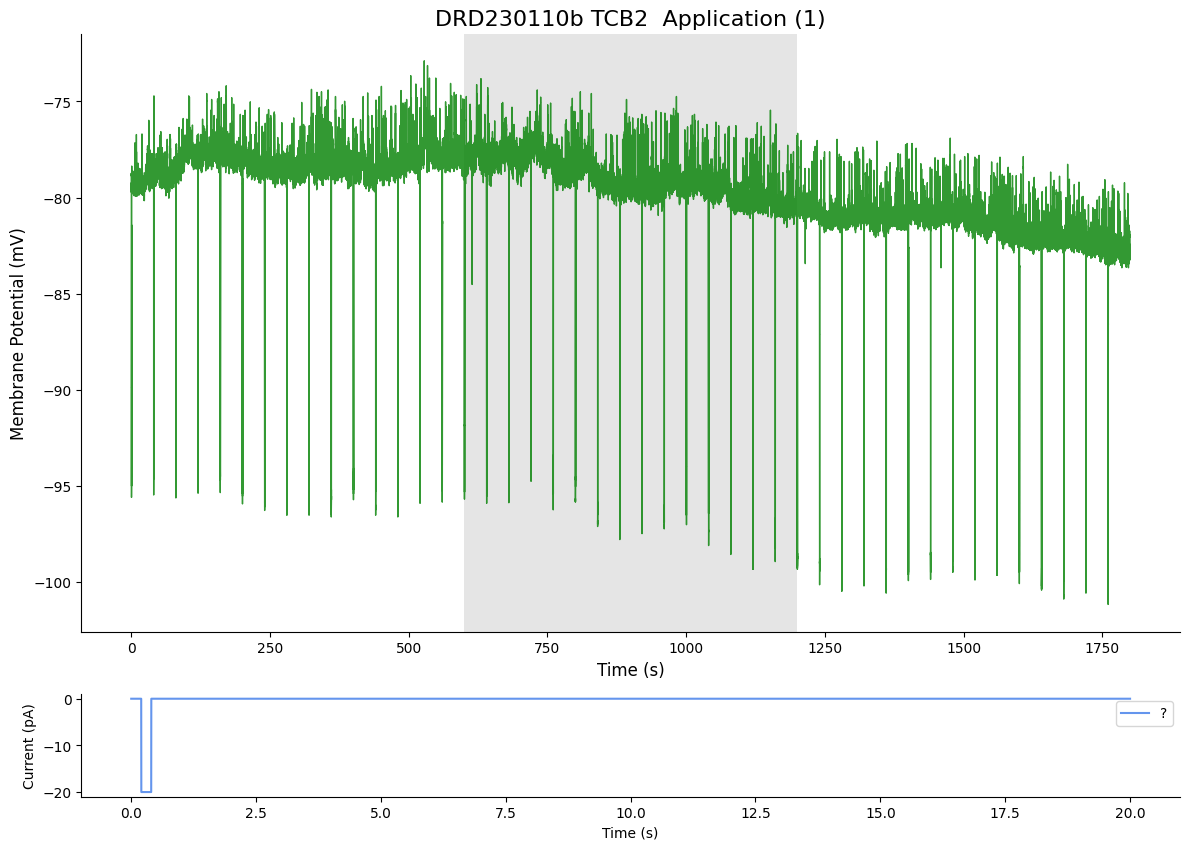

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110b_application_1.png
BUILDING "DRD230110b Application 2 Figure"


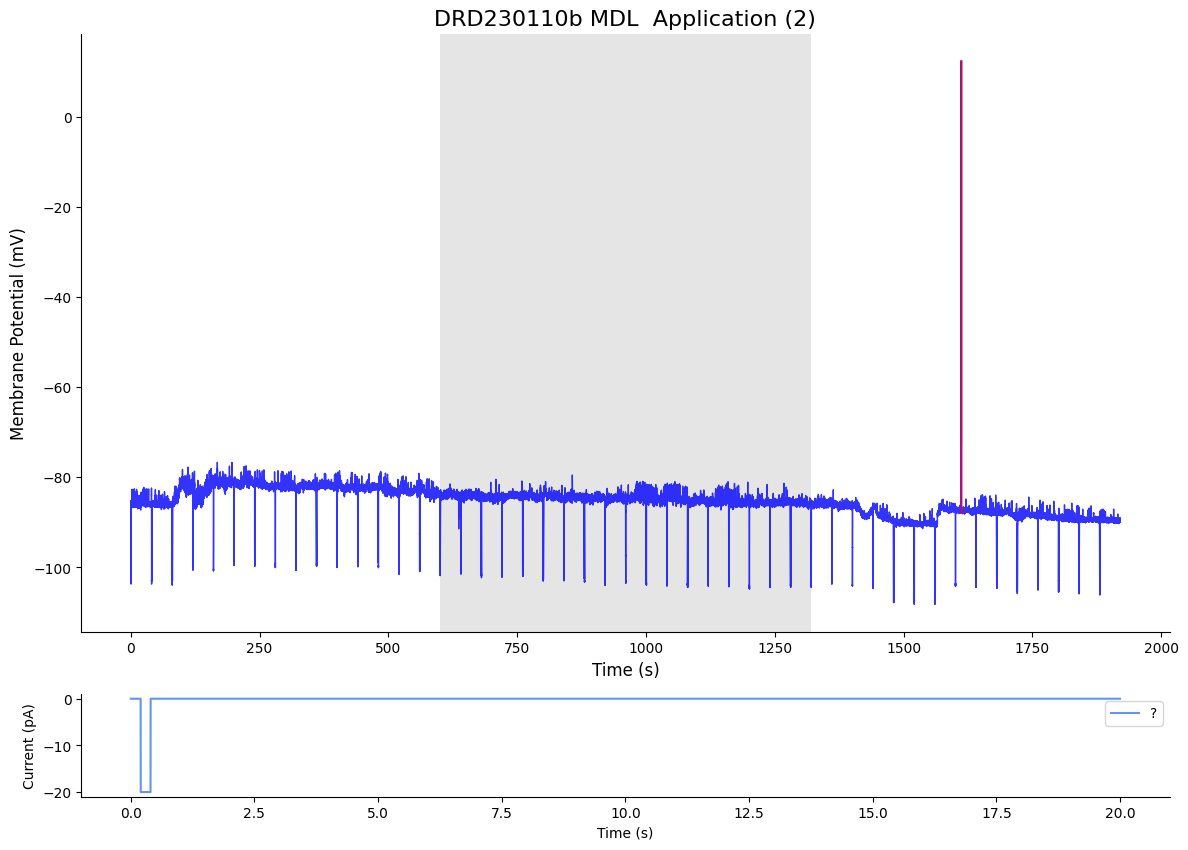

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230110b_application_2.png
BUILDING "DRD230112a Application 1 Figure"


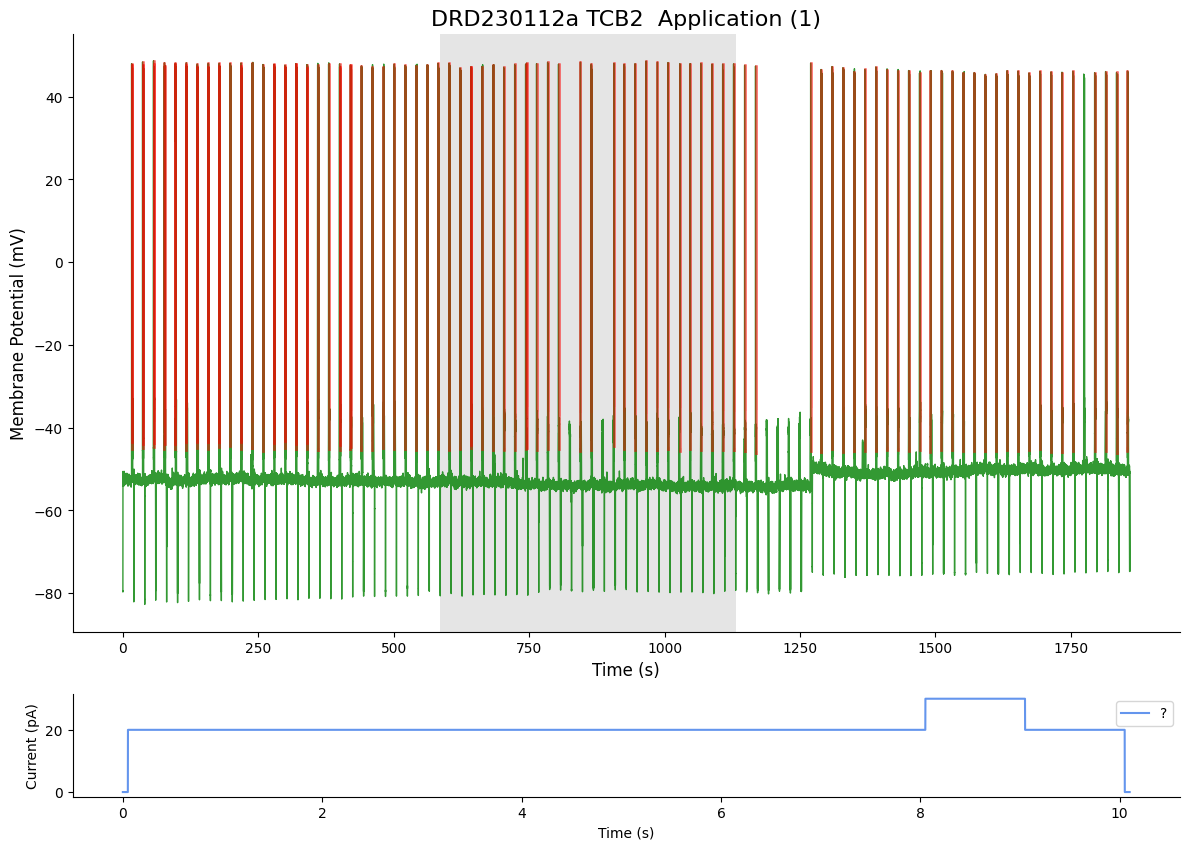

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112a_application_1.png
BUILDING "DRD230112b Application 1 Figure"


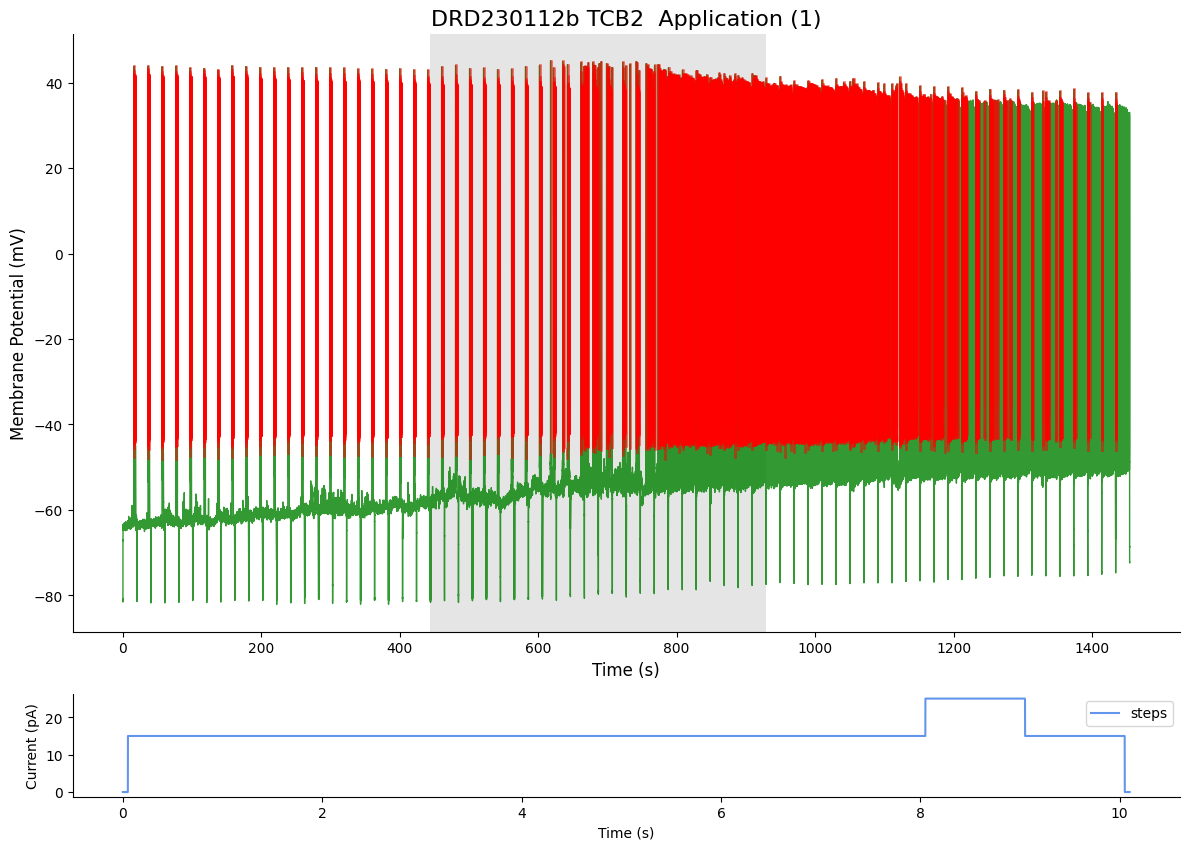

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112b_application_1.png
BUILDING "DRD230112b Application 2 Figure"


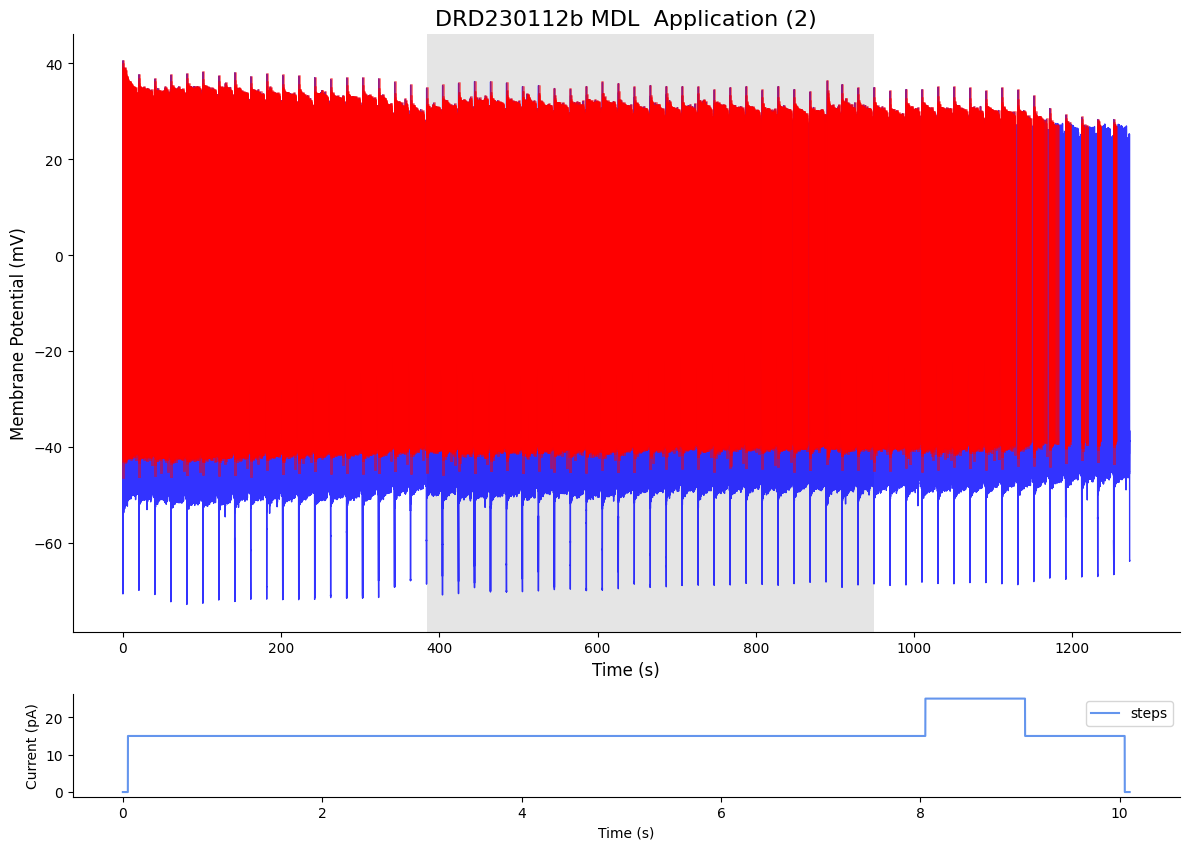

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230112b_application_2.png
BUILDING "DRD230113a Application 1 Figure"
no I file found for DRD230113a, I setting used was: nan


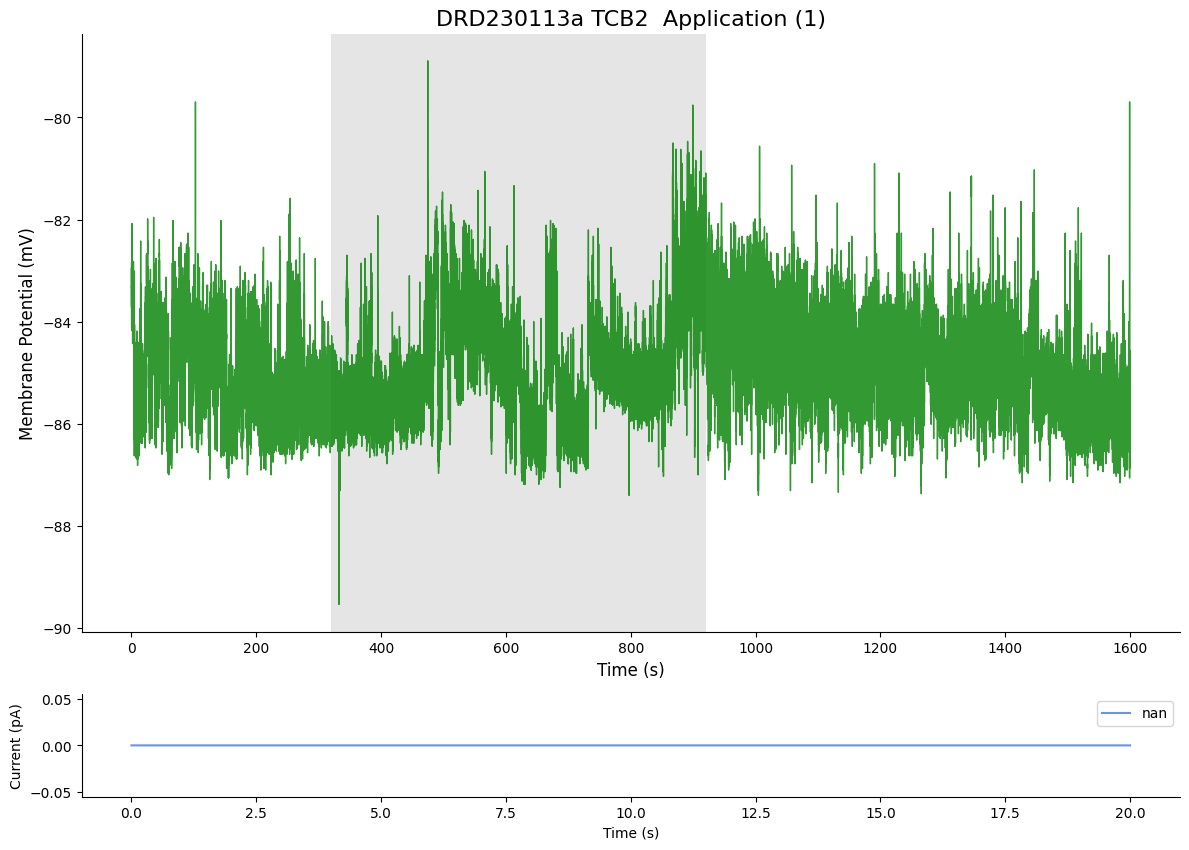

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230113a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230113a_application_1.png
BUILDING "DRD230115a Application 1 Figure"


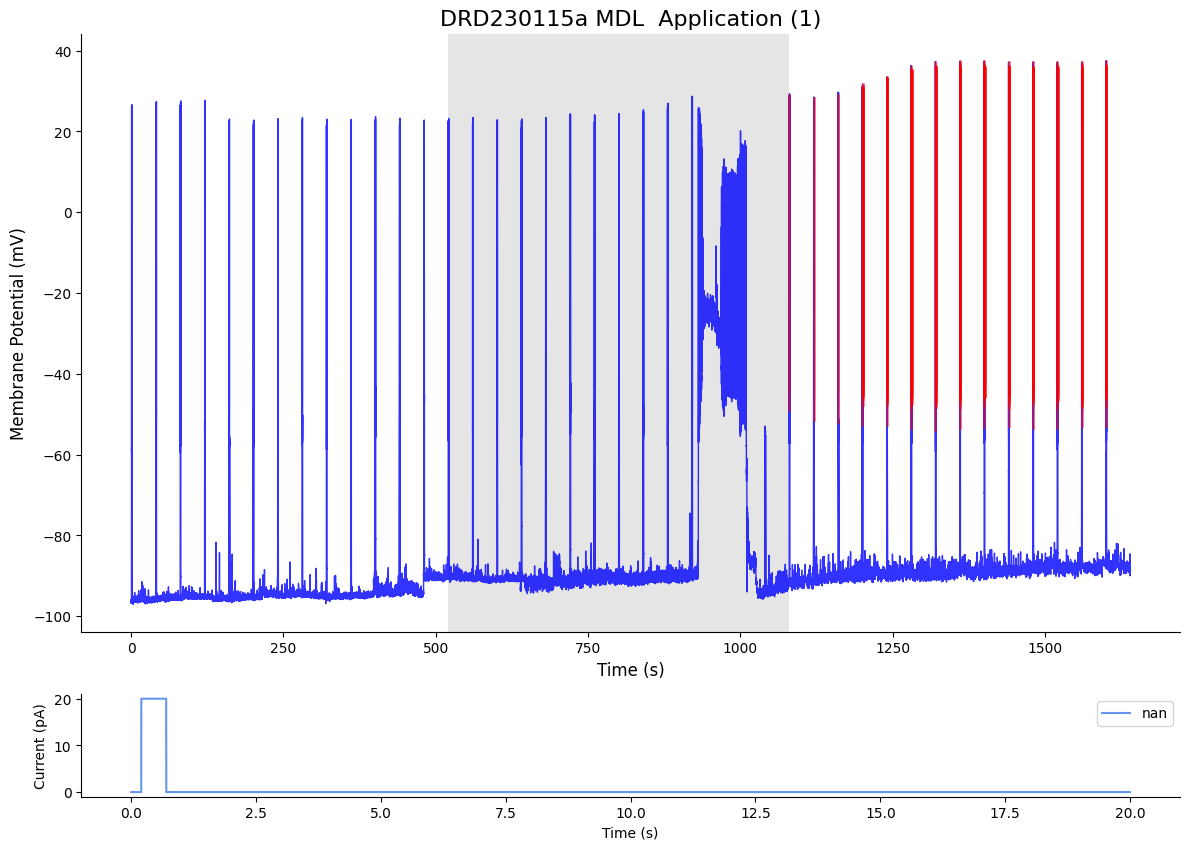

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115a_application_1.png
BUILDING "DRD230115a Application 2 Figure"


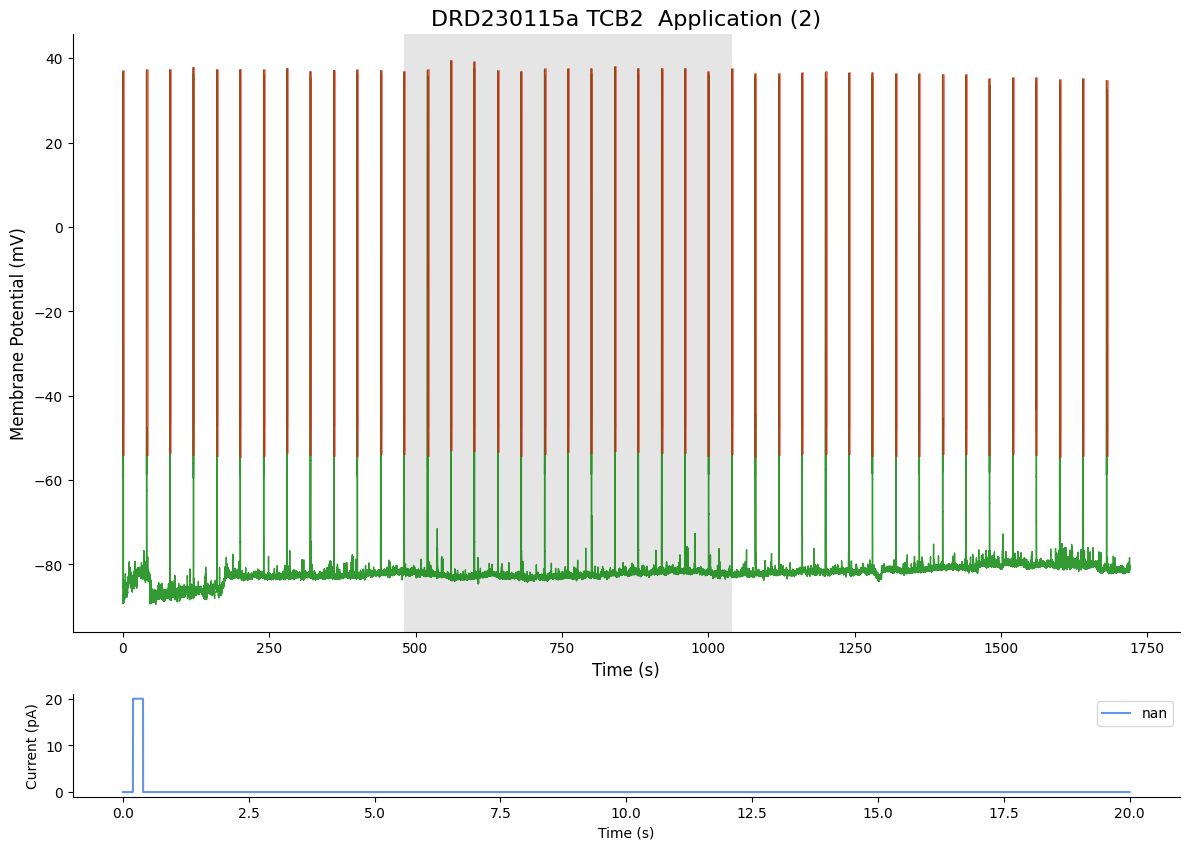

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115a_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115a_application_2.png
BUILDING "DRD230115b Application 1 Figure"


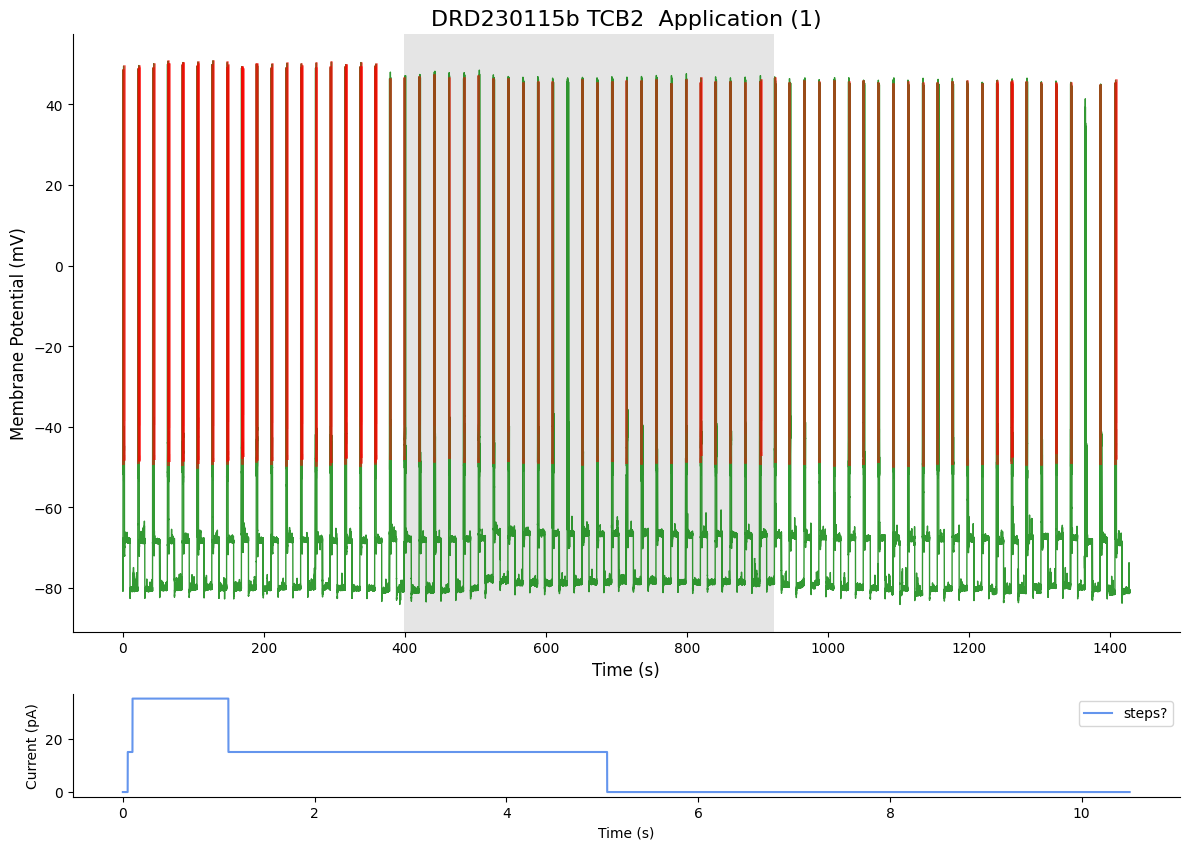

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115b_application_1.png
BUILDING "DRD230115b Application 2 Figure"


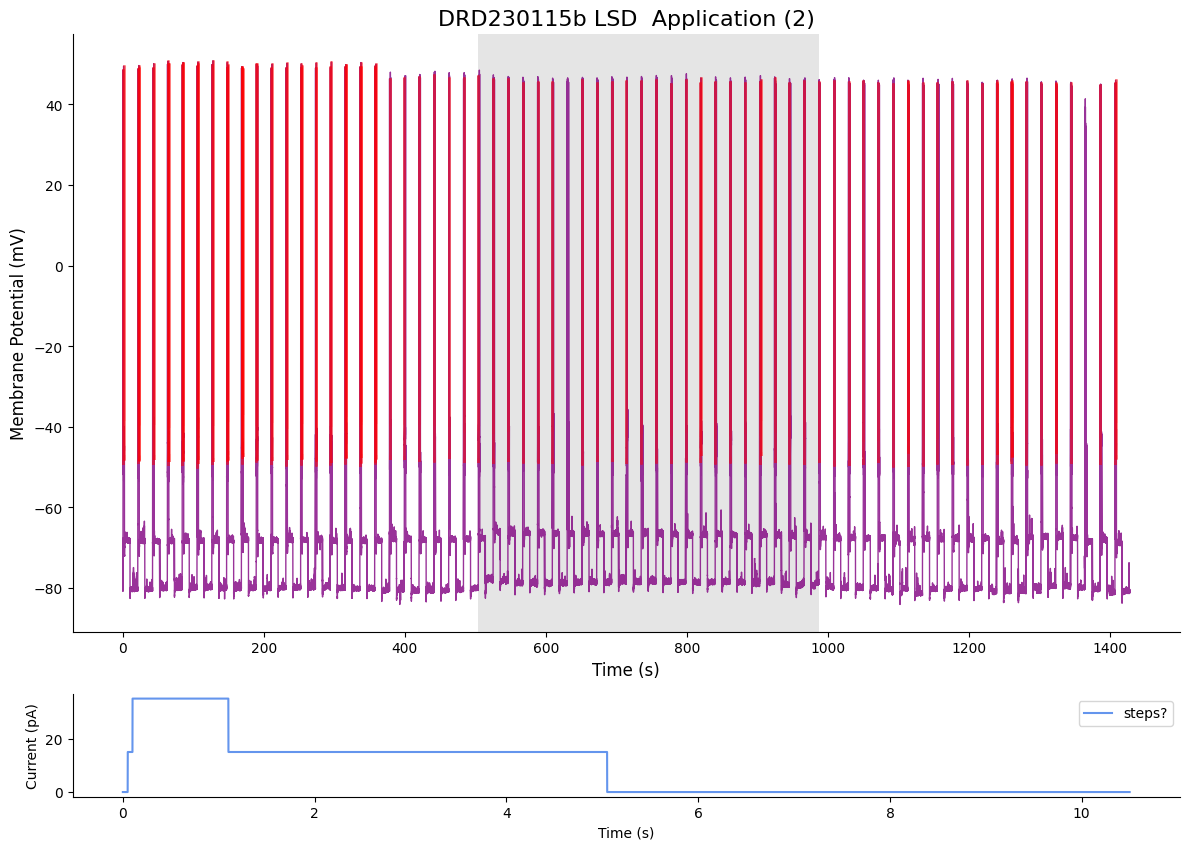

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115b_application_2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230115b_application_2.png
BUILDING "DRD230117a Application 1 Figure"


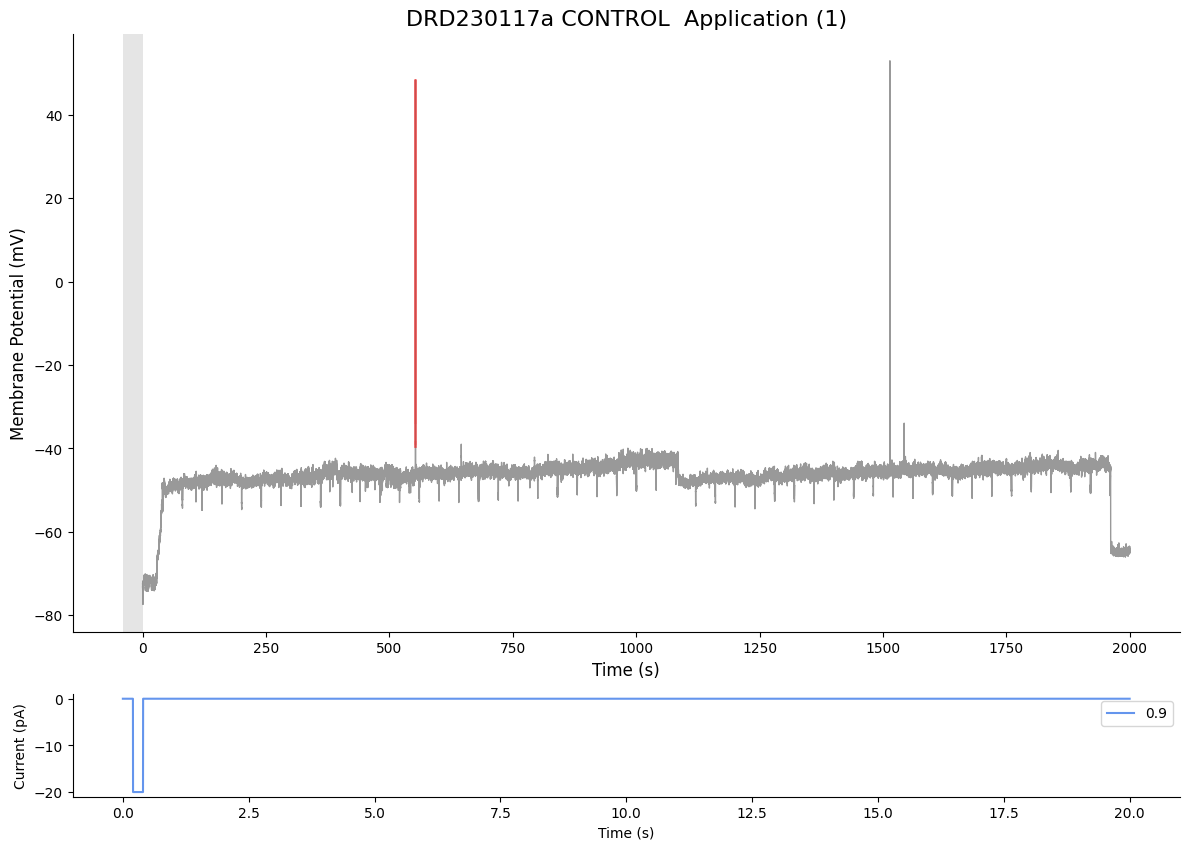

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230117a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230117a_application_1.png
BUILDING "DRD230117b Application 1 Figure"


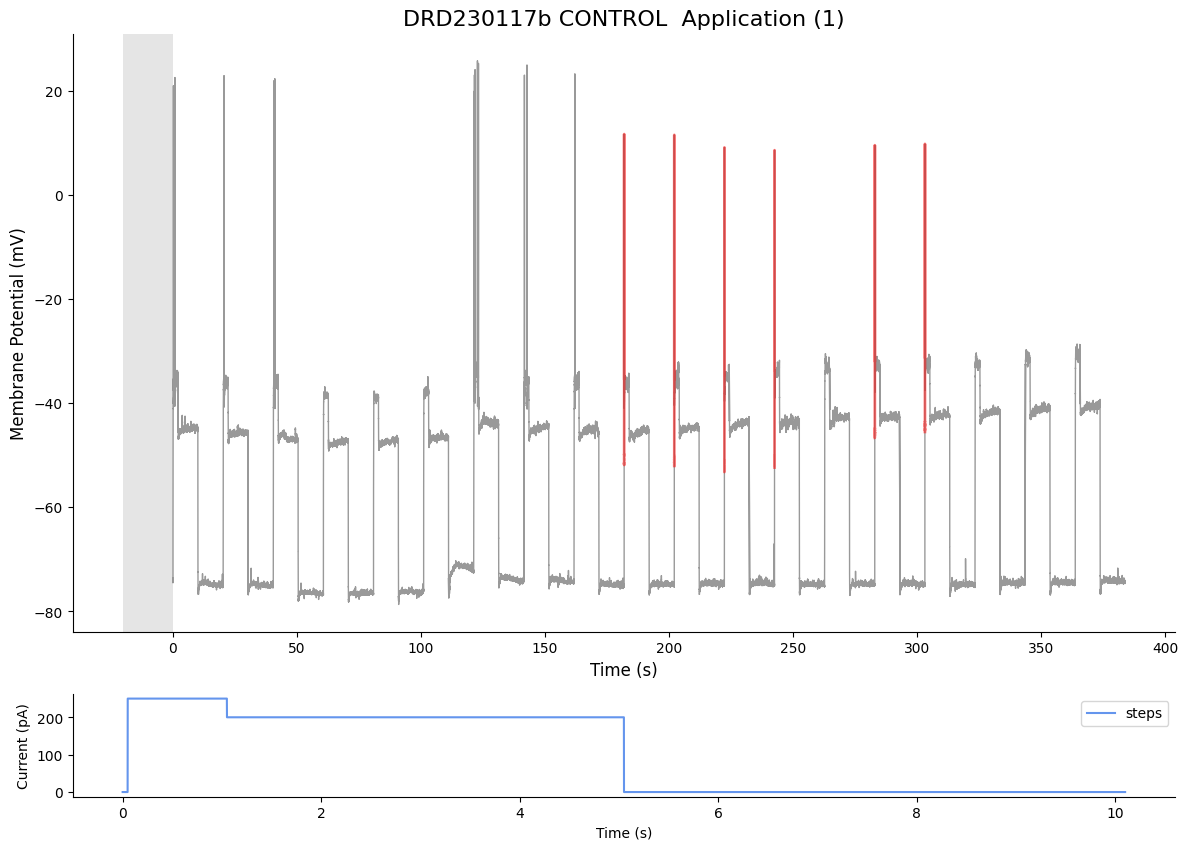

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230117b_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/DRD230117b_application_1.png


IndexError: single positional indexer is out-of-bounds

In [90]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id


#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getorbuildExpandedDF(filename_or_df, 'feature_df_expanded', expandFeatureDF, from_scratch=False) #get df
    else:
        filename_or_df=expanded_df
    
    for cell_ID in expanded_df['cell_ID'].unique(): #loop over all unique cell_IDs 
        cell_df = getCellDF(expanded_df, cell_ID, data_type = 'AP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

In [83]:
#Action Potential Investigation (AP)

#EXAMPLE USE
# getorbuildAP_MeanFig(filename, 'TLX210328a', from_scratch=True) #cell_ID_or_cell_df
# getorbuildAP_HistogramFig(filename, cell_ID_or_cell_df, from_scratch=True)
# getorbuildAP_PhasePlotFig(filename, cell_ID_or_cell_df, from_scratch=True)
# getorbuildAP_PCAFig(filename, cell_ID_or_cell_df, from_scratch=None


cell_df = getCellDF(expanded_df, 'TLX230416a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
getorbuildApplicationFig(filename, 'TLX230416a', from_scratch=True)




BUILDING "TLX230416a Mean APs Figure"
No APs in trace for TLX230416a
BUILDING "TLX230416a AP Histogram Figure"
No APs in trace for TLX230416a
BUILDING "TLX230416a Phase Plot Figure"
No APs in trace for TLX230416a
BUILDING "TLX230416a PCA Figure"
No APs in trace for TLX230416a


In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loopCombinations_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


folder_file     cell_ID data_type  drug  replication_no  \
906  JJB230509/t11  CBL230509b        FP   PRE               1   
907  JJB230509/t12  CBL230509b        FP   PRE               2   
908  JJB230509/t13  CBL230509b        FP   PRE               3   
905   JJB230509/t8  CBL230509a        AP  TCB2               1   
909  JJB230509/t15  CBL230509b        AP  TCB2               1   
..             ...         ...       ...   ...             ...   
442  JJB230126/t42  DRD230126c     FP_AP  WASH              11   
443  JJB230126/t43  DRD230126c     FP_AP  WASH              12   
724  JJB230301/t19  DRD230301a     FP_AP  WASH              14   
725  JJB230301/t20  DRD230301a     FP_AP  WASH              15   
726  JJB230301/t21  DRD230301a     FP_AP  WASH              16   

     application_order  drug_in  drug_out       I_set  R_series  ...  \
906                  0      NaN       NaN         NaN      47.0  ...   
907                  0      NaN       NaN         NaN      44.0  ...   
908                  0      NaN       NaN         NaN      44.0  ...   
905                  1     21.0      35.0  short step      90.0  ...   
909                  1      9.0      22.0  short step       NaN  ...   
..                 ...      ...       ...         ...       ...  ...   
442                  1      8.0       NaN         NaN       NaN  ...   
443                  1     10.0       NaN         NaN       NaN  ...   
724                  1      NaN       NaN         NaN      73.0  ...   
725                  1      NaN       NaN         NaN      73.0  ...   
726                  1      NaN       NaN  *offsetadj      73.0  ...   

     mean_AP_slope_file mean_AP_width_file mean_AP_latency_file  \
906           82.629766         704.375000             0.975000   
907           90.947657         841.000000             0.866667   
908           87.167019         789.828571             0.871429   
905                 NaN                NaN                  NaN   
909                 NaN                NaN                  NaN   
..                  ...                ...                  ...   
442           44.853426         767.400000             1.370000   
443           45.551643         685.200000             1.375000   
724           65.450391         843.366667             1.150000   
725           63.155565         884.650000             1.175000   
726           61.249715         940.025000             1.212500   

    max_firing_cell_drug  voltage_threshold_cell_drug  AP_height_cell_drug  \
906            20.688653                   -35.720416            78.239833   
907            20.688653                   -35.720416            78.239833   
908            20.688653                   -35.720416            78.239833   
905                  NaN                          NaN                  NaN   
909                  NaN                          NaN                  NaN   
..                   ...                          ...                  ...   
442                  NaN                          NaN                  NaN   
443                  NaN                          NaN                  NaN   
724                  NaN                          NaN                  NaN   
725                  NaN                          NaN                  NaN   
726                  NaN                          NaN                  NaN   

     AP_slope_cell_drug AP_width_cell_drug AP_latency_cell_drug first_drug_AP  
906           86.914814          778.40119             0.904365          TCB2  
907           86.914814          778.40119             0.904365          TCB2  
908           86.914814          778.40119             0.904365          TCB2  
905                 NaN                NaN                  NaN           NaN  
909                 NaN                NaN                  NaN           NaN  
..                  ...                ...                  ...           ...  
442                 NaN                NaN     